# Telecom Churn Prediction

#### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, our goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

In [195]:
# Importing required libraries 

#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#!pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, plot_roc_curve, accuracy_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Display all the columns
pd.pandas.set_option('display.max_columns',None)

### Data Understanding

In [196]:
# Read the train dataset

data = pd.read_csv("train.csv")
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

#### Inspecting the train dataset

In [197]:
# Shape of the dataset

data.shape

(69999, 172)

In [198]:
# Info of the data

data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   arpu_6                    float64
 9   arpu_7                    float64
 10  arpu_8                    float64
 11  onnet_mou_6               float64
 12  onnet_mou_7               float64
 13  onnet_mou_8               float64
 14  offnet_mou_6              float64
 15  offnet_mou_7              float64
 16  offnet_mou_8              float64
 17  roam_ic_mou_6             float64
 18  roam_ic_mou_7             float64
 19  roam_ic_mou_8             float64
 20  roam_og_mou_6             f

In [199]:
# Describing the data

data.describe(include="all")

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count                 69266  69999.000000  69999.000000  69999.000000   
unique                    1           NaN           NaN           NaN   
top               8/31/2014           NaN           NaN           NaN   
freq                  69266           NaN           NaN           NaN   
mean                    NaN    283.134365    278.185912    278.858826   
std                     NaN    334.213918    344.366927    351.924315   
min                     NaN  -2258.709000  -1289.715000   -945.808000   
25%                     NaN     93.581000     86.714000     84.095000   
50%                     NaN    197.484000    191.588000    192.234000   
75%                     NaN    370.791000    365.369500    369.909000   
max                     NaN  27731.088000  35145.834000  33543.624000   

         onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count   67231.000000  67312.000000  66296.000000  67231.000000  67312.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      133.153275    133.894438    132.978257    198.874771    197.153383   
std       299.963093    311.277193    311.896596    316.818355    322.482226   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         7.410000      6.675000      6.410000     34.860000     32.240000   
50%        34.110000     32.280000     32.100000     96.480000     91.885000   
75%       119.390000    115.837500    115.060000    232.990000    227.630000   
max      7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   66296.000000   67231.000000   67312.000000   66296.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean      196.543577       9.765435       7.014568       7.004892   
std       324.089234      57.374429      55.960985      53.408135   
min         0.000000       0.000000       0.000000       0.000000   
25%   

In [200]:
# Dropping column circle_id

data.drop(columns="circle_id", axis=1, inplace=True)

**Inspecting the object type columns**

In [201]:
# Storing object type columns 

object_cols = data.select_dtypes("object").columns
object_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [202]:
# Checking the value colunts

for columns in object_cols:
    print(data[columns].value_counts())

6/30/2014    69999
Name: last_date_of_month_6, dtype: int64
7/31/2014    69600
Name: last_date_of_month_7, dtype: int64
8/31/2014    69266
Name: last_date_of_month_8, dtype: int64
6/30/2014    11880
6/29/2014     9049
6/27/2014     7800
6/28/2014     6752
6/26/2014     3918
6/25/2014     3402
6/24/2014     2888
6/17/2014     2887
6/14/2014     2686
6/21/2014     2654
6/23/2014     2060
6/18/2014     1886
6/12/2014     1746
6/22/2014     1624
6/13/2014     1468
6/19/2014     1387
6/20/2014     1252
6/16/2014      783
6/15/2014      605
6/11/2014      398
6/8/2014       368
6/5/2014       229
6/7/2014       223
6/10/2014      200
6/3/2014       172
6/1/2014       155
6/9/2014       135
6/6/2014       123
6/4/2014        90
6/2/2014        78
Name: date_of_last_rech_6, dtype: int64
7/31/2014    12206
7/30/2014     9716
7/25/2014     6577
7/29/2014     6320
7/28/2014     5370
7/27/2014     4136
7/26/2014     3765
7/24/2014     2750
7/19/2014     2144
7/22/2014     2061
7/20/2014     1999
7

***From the above we can see that columns `last_date_of_month_6`, `last_date_of_month_7` and `last_date_of_month_8` have only one value (month end date) in them so we will be dropping these columns.***

In [203]:
# Dropping columns last_date_of_month_6, last_date_of_month_7 and last_date_of_month_8

data.drop(columns=["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8"], axis=1, inplace = True)

In [204]:
data.shape

(69999, 168)

#### Inspecting the Null values

In [205]:
data.isnull().sum().head(50)

id                     0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6         2768
onnet_mou_7         2687
onnet_mou_8         3703
offnet_mou_6        2768
offnet_mou_7        2687
offnet_mou_8        3703
roam_ic_mou_6       2768
roam_ic_mou_7       2687
roam_ic_mou_8       3703
roam_og_mou_6       2768
roam_og_mou_7       2687
roam_og_mou_8       3703
loc_og_t2t_mou_6    2768
loc_og_t2t_mou_7    2687
loc_og_t2t_mou_8    3703
loc_og_t2m_mou_6    2768
loc_og_t2m_mou_7    2687
loc_og_t2m_mou_8    3703
loc_og_t2f_mou_6    2768
loc_og_t2f_mou_7    2687
loc_og_t2f_mou_8    3703
loc_og_t2c_mou_6    2768
loc_og_t2c_mou_7    2687
loc_og_t2c_mou_8    3703
loc_og_mou_6        2768
loc_og_mou_7        2687
loc_og_mou_8        3703
std_og_t2t_mou_6    2768
std_og_t2t_mou_7    2687
std_og_t2t_mou_8    3703
std_og_t2m_mou_6    2768
std_og_t2m_mou_7    2687
std_og_t2m_mou_8    3703


***As the number of columns is high we will be using missigno library for visualizing various plots for missing values present in the dataset.***

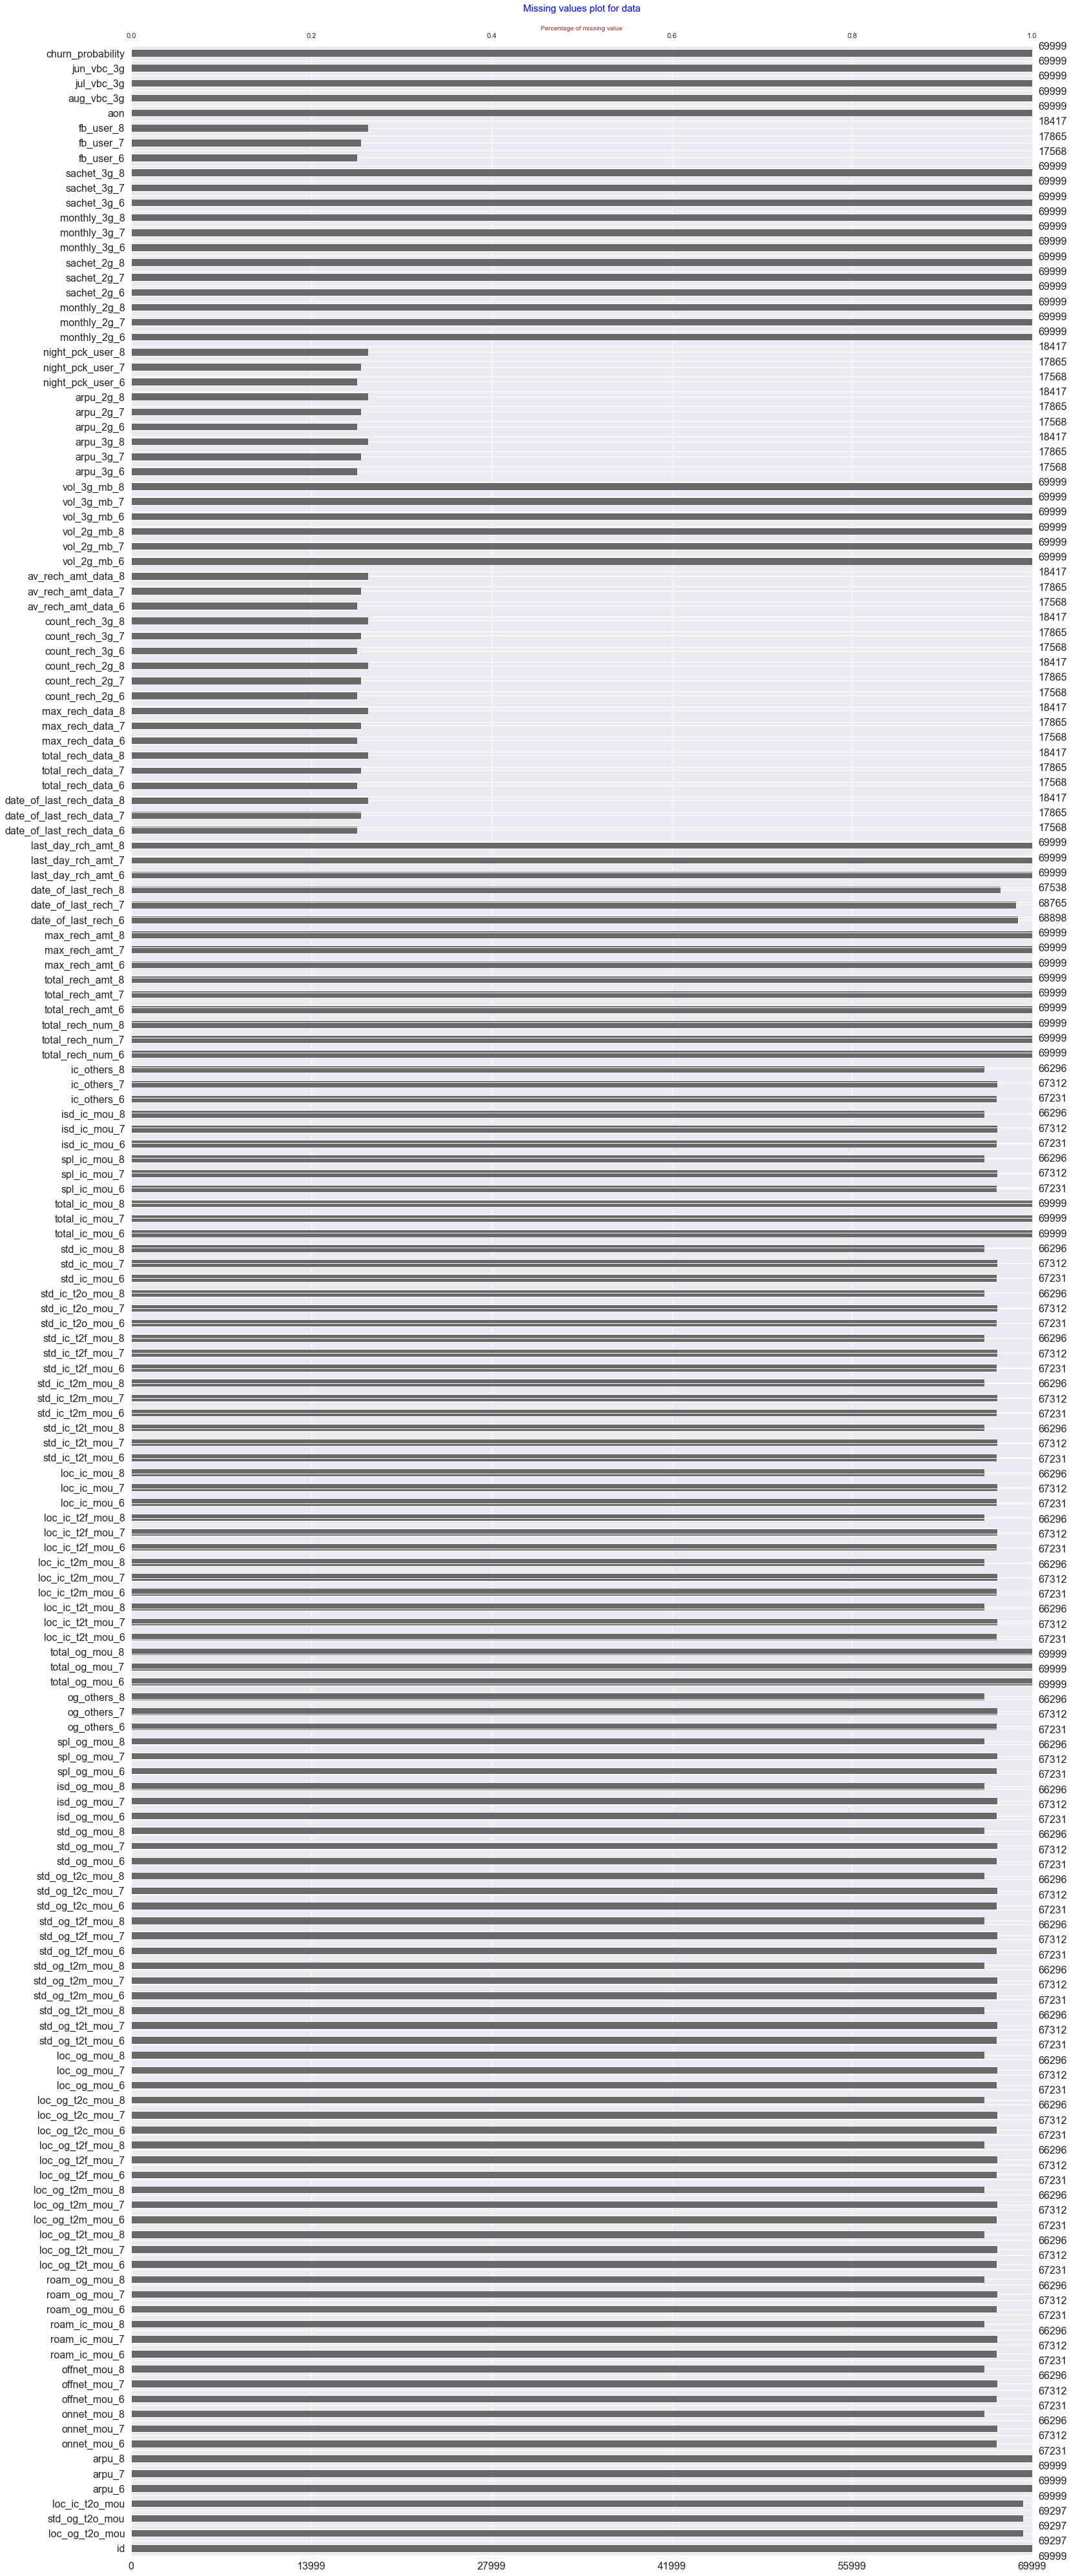

In [206]:
# Plotting the missing values using msno.bar

msno.bar(data)
plt.title("Missing values plot for data\n", fontdict={"fontsize":15, "fontweight":5, "color":"blue"})
plt.xlabel("Percentage of missing value", fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
plt.ylabel("Columns", fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
plt.show()

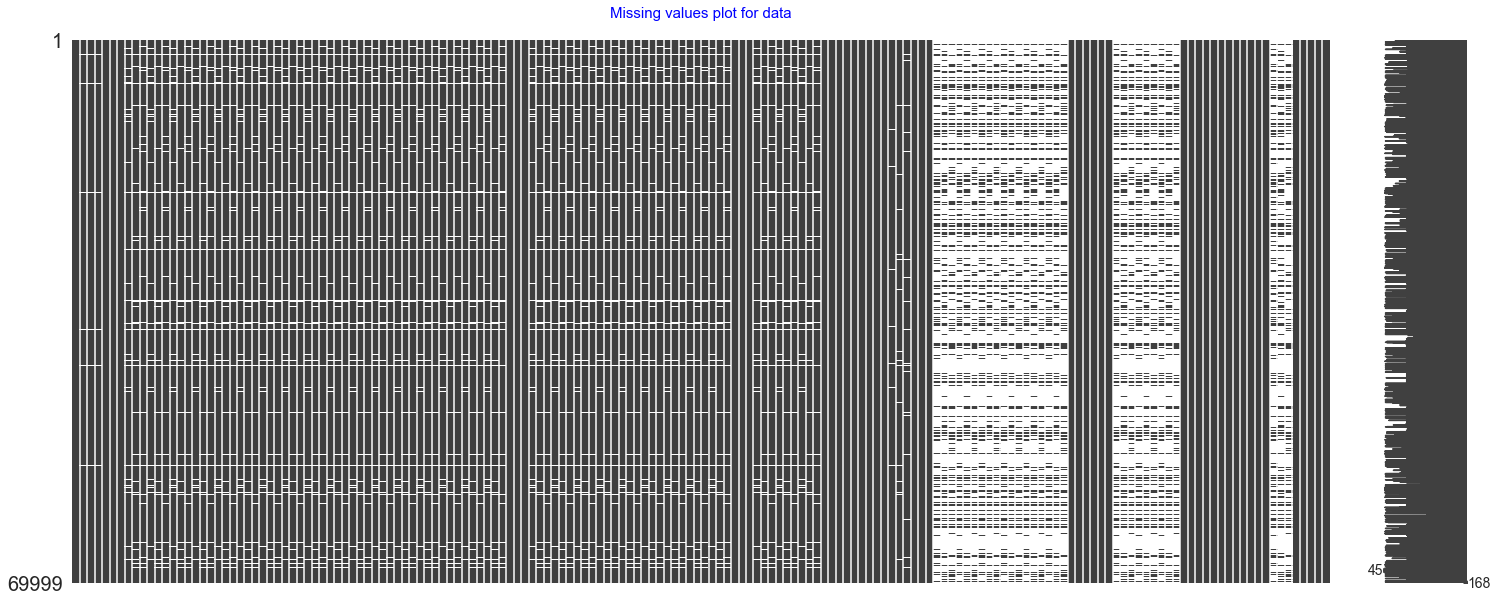

In [207]:
# Plotting the missing values using msno.matrix

msno.matrix(data)
plt.title("Missing values plot for data\n", fontdict={"fontsize":15, "fontweight":5, "color":"blue"})
plt.show()

In [208]:
# Inspecting the percentage of missing data

missing_data_percent = 100*data.isnull().sum()/len(data.index)
missing_data_percent.sort_values(ascending=False).head(40)

av_rech_amt_data_6          74.902499
fb_user_6                   74.902499
total_rech_data_6           74.902499
arpu_2g_6                   74.902499
arpu_3g_6                   74.902499
date_of_last_rech_data_6    74.902499
night_pck_user_6            74.902499
count_rech_3g_6             74.902499
count_rech_2g_6             74.902499
max_rech_data_6             74.902499
count_rech_3g_7             74.478207
night_pck_user_7            74.478207
av_rech_amt_data_7          74.478207
date_of_last_rech_data_7    74.478207
count_rech_2g_7             74.478207
arpu_3g_7                   74.478207
max_rech_data_7             74.478207
total_rech_data_7           74.478207
arpu_2g_7                   74.478207
fb_user_7                   74.478207
date_of_last_rech_data_8    73.689624
arpu_3g_8                   73.689624
night_pck_user_8            73.689624
count_rech_3g_8             73.689624
count_rech_2g_8             73.689624
fb_user_8                   73.689624
av_rech_amt_

***Looking at the above plots and the percentage of missing values we can see that few columns have more than 70% of Null values in them and after which rest of them have Null values less than 10%. So, it would be better to the columns having more than 70% Null values.***


### Data Cleaning

In [209]:
# Dropping the columns having more than 30% Null values

new_vars = missing_data_percent[missing_data_percent.lt(30)].index
filtered_data = data[new_vars]

In [210]:
# Shape of dataset having columns with missing values less than 10% 

filtered_data.shape

(69999, 138)

In [211]:
# Re-checking the Null value percentage

missing_data_percent_new = 100*filtered_data.isnull().sum()/len(filtered_data.index)
missing_data_percent_new.sort_values(ascending=False).head(40)

std_og_t2f_mou_8    5.290076
loc_og_t2t_mou_8    5.290076
loc_og_t2m_mou_8    5.290076
og_others_8         5.290076
loc_og_t2f_mou_8    5.290076
loc_og_t2c_mou_8    5.290076
loc_og_mou_8        5.290076
ic_others_8         5.290076
isd_ic_mou_8        5.290076
spl_ic_mou_8        5.290076
loc_ic_t2t_mou_8    5.290076
std_og_t2t_mou_8    5.290076
std_ic_mou_8        5.290076
std_ic_t2o_mou_8    5.290076
loc_ic_t2m_mou_8    5.290076
std_ic_t2f_mou_8    5.290076
std_ic_t2m_mou_8    5.290076
std_ic_t2t_mou_8    5.290076
loc_ic_t2f_mou_8    5.290076
spl_og_mou_8        5.290076
std_og_t2m_mou_8    5.290076
loc_ic_mou_8        5.290076
std_og_t2c_mou_8    5.290076
offnet_mou_8        5.290076
std_og_mou_8        5.290076
isd_og_mou_8        5.290076
roam_ic_mou_8       5.290076
onnet_mou_8         5.290076
roam_og_mou_8       5.290076
std_og_t2m_mou_6    3.954342
std_ic_t2f_mou_6    3.954342
loc_ic_t2f_mou_6    3.954342
std_ic_t2m_mou_6    3.954342
offnet_mou_6        3.954342
std_ic_t2o_mou

***Now we can see that Null values are less than 10% in all the columns. So, we can proceed with Null value imputation.***

In [212]:
#Filtering columns having Null values for further analysis

impute_cols = missing_data_percent_new[missing_data_percent_new.ne(0)].index
impute_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [213]:
# Separating the columns with Null values in different dataset for visualisation and imputation

impute_data = filtered_data[impute_cols]  # columns with missing values
filtered_data = filtered_data.loc[:, ~filtered_data.columns.isin(impute_cols)]  # columns without missing values
 
print(impute_data.shape)
print(filtered_data.shape)

(69999, 93)
(69999, 45)


### Null Value imputation

***We will be imputing categorical and numrical missing values separately.***

In [214]:
# Storing the categorical columns 

cat_col = impute_data.select_dtypes("object").columns
cat_col

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [215]:
# Storing the numerical columns 

num_col = impute_data.select_dtypes("float64").columns
num_col

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [216]:
# Separating the categorical and numerical data columns in different datasets

cat_impute_data = impute_data[cat_col]
num_impute_data = impute_data[num_col]

***We will be imputing Categorical columns first.***

Plot 1


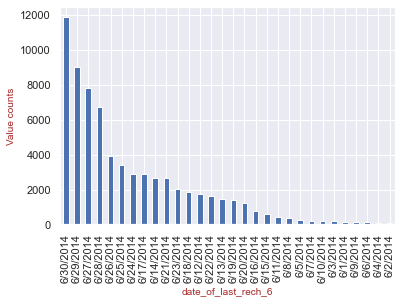

Plot 2


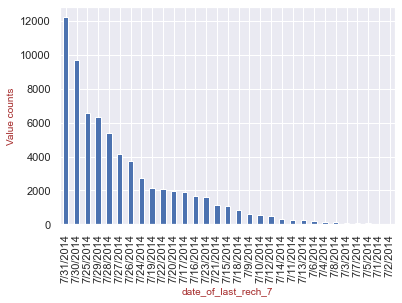

Plot 3


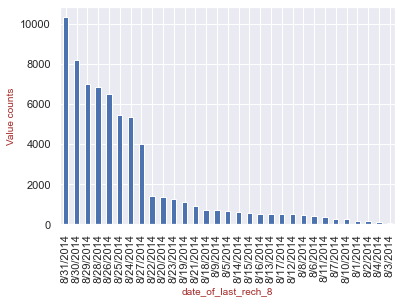

In [217]:
# Plotting bar plot of values counts of categorical variables
n=0
for cols in cat_col:
    n+=1
    cat_impute_data[cols].value_counts().plot.bar()
    print("Plot "+str(n))
    plt.xlabel(cols, fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.ylabel("Value counts", fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.show()
    

***As we can see the rest categorical columns have date values so we will be converting them to datetime format.***

### Creating new variables

***We will be using to_datetime to extract the day from the date.***

In [218]:
# Convert date to day for columns date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8

for col in cat_impute_data.columns:
    cat_impute_data[col] = pd.to_datetime(cat_impute_data[col]).dt.day
    
cat_impute_data.head()

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8
0                 22.0                 10.0                 24.0
1                 12.0                 10.0                 26.0
2                 11.0                 22.0                 24.0
3                 15.0                 21.0                 25.0
4                 25.0                 26.0                 30.0

***Also as these columns had Null values in them we will be imputing those with mode.*** 

In [219]:
# Impute categorical columns by mode value

for cols in cat_impute_data.columns:
    cat_impute_data[cols] = cat_impute_data[cols].fillna(cat_impute_data[cols].mode().iloc[0])   

In [220]:
# Rechecking the missing value counts

cat_impute_data.isnull().sum()

date_of_last_rech_6    0
date_of_last_rech_7    0
date_of_last_rech_8    0
dtype: int64

***Now we will be imputing the numerical columns.***

Plot 1


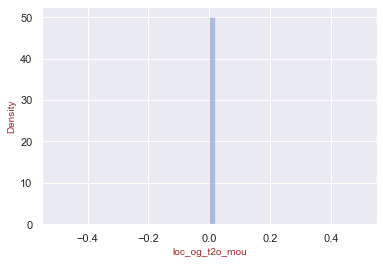

Plot 2


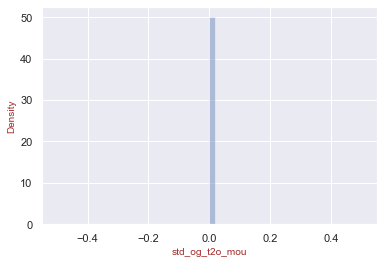

Plot 3


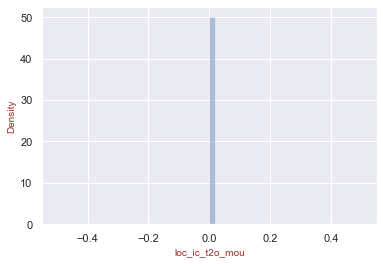

Plot 4


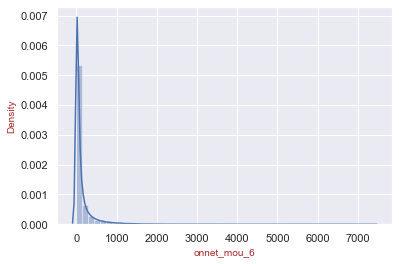

Plot 5


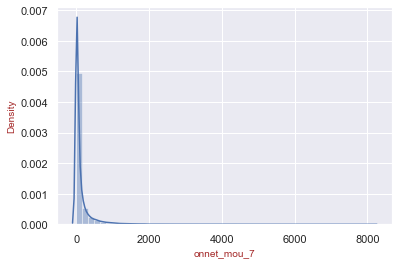

Plot 6


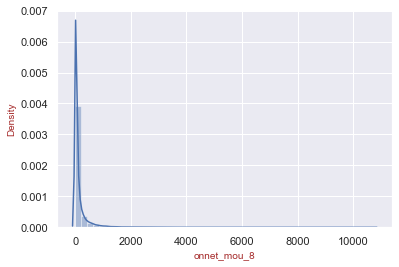

Plot 7


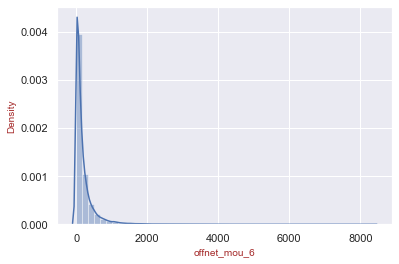

Plot 8


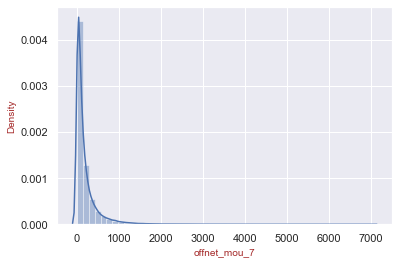

Plot 9


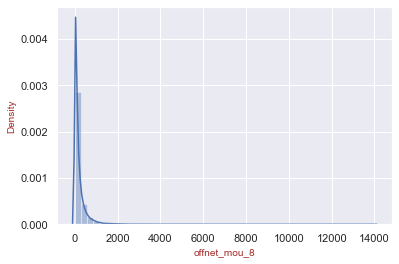

Plot 10


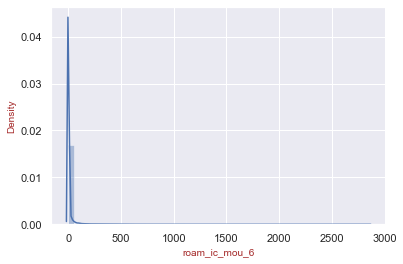

Plot 11


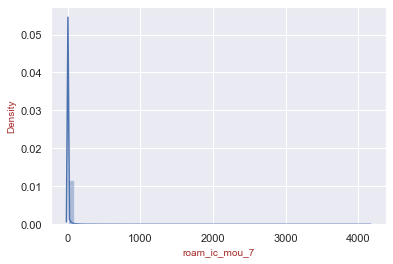

Plot 12


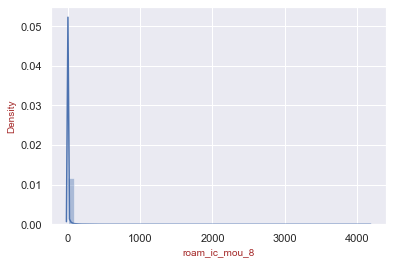

Plot 13


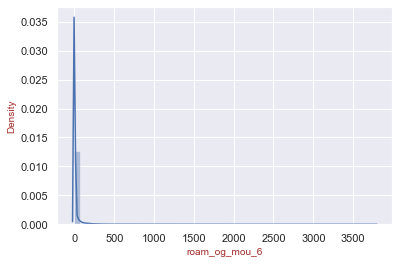

Plot 14


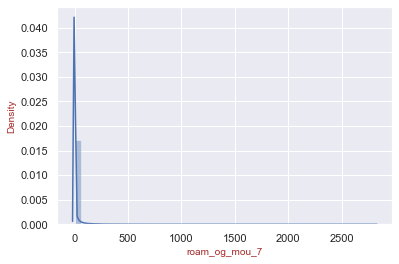

Plot 15


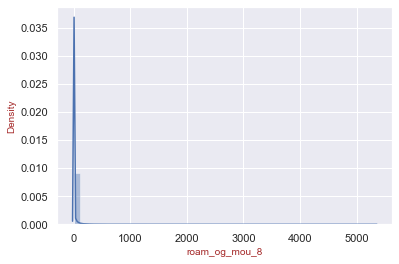

Plot 16


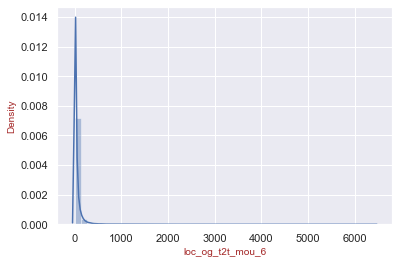

Plot 17


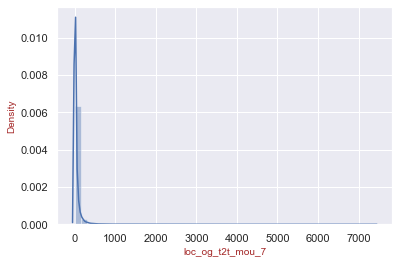

Plot 18


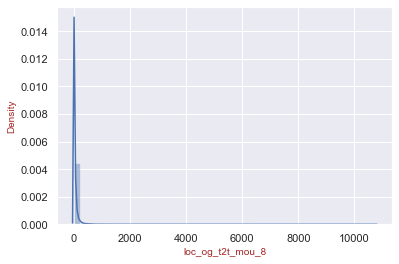

Plot 19


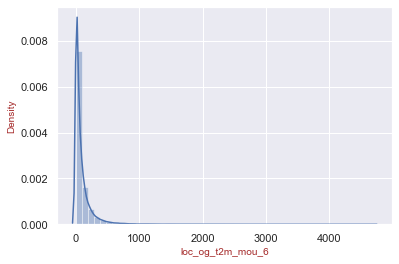

Plot 20


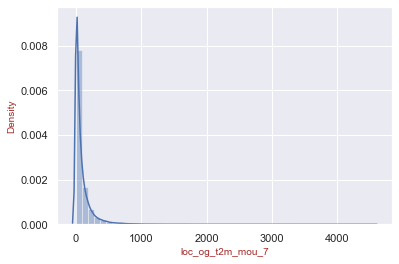

Plot 21


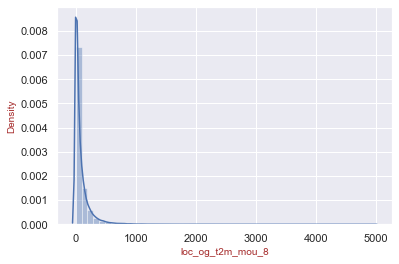

Plot 22


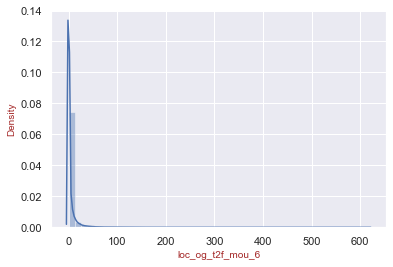

Plot 23


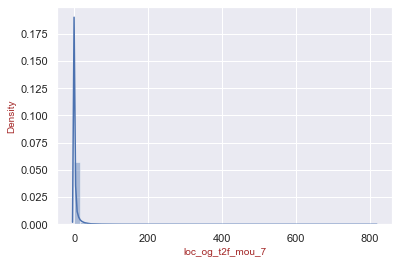

Plot 24


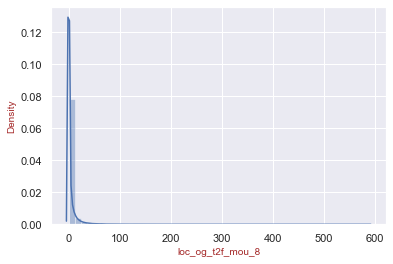

Plot 25


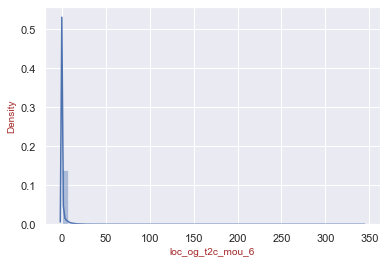

Plot 26


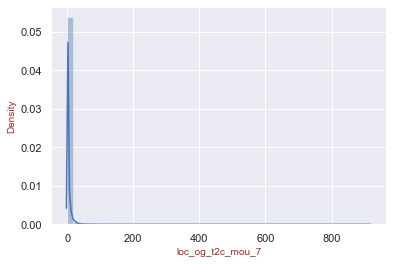

Plot 27


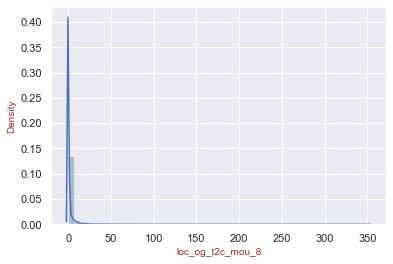

Plot 28


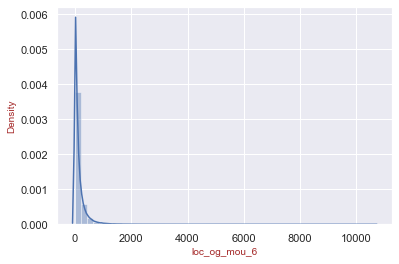

Plot 29


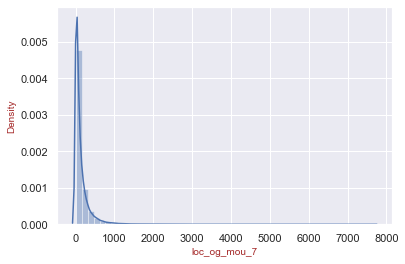

Plot 30


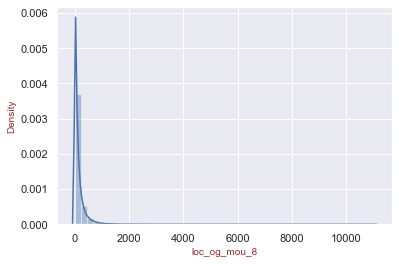

Plot 31


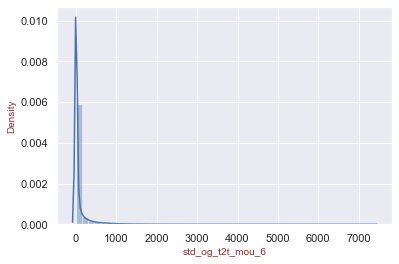

Plot 32


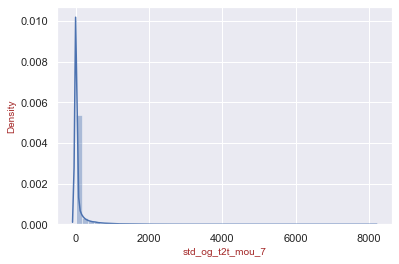

Plot 33


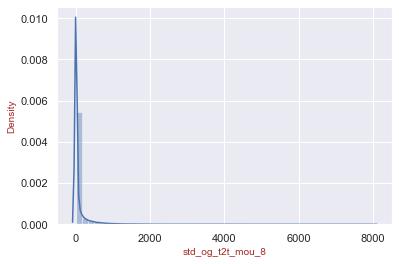

Plot 34


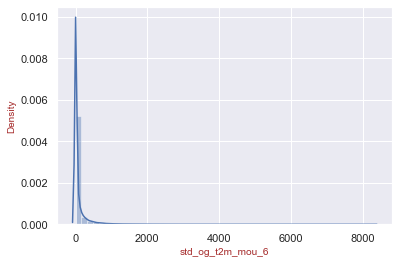

Plot 35


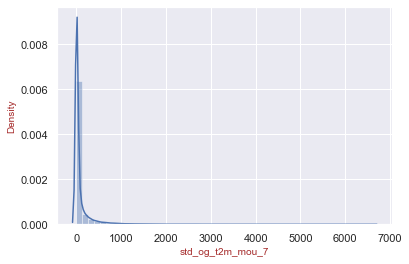

Plot 36


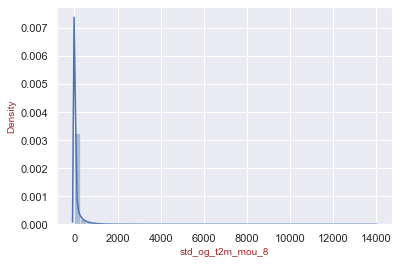

Plot 37


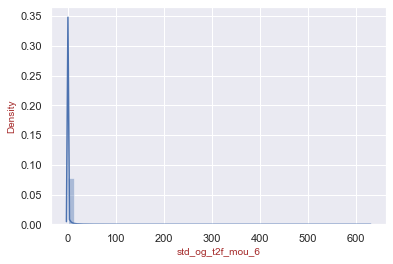

Plot 38


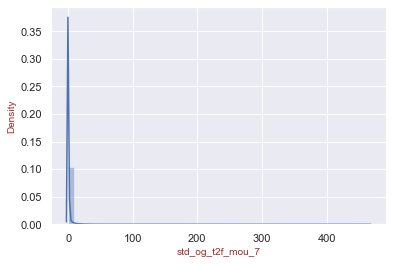

Plot 39


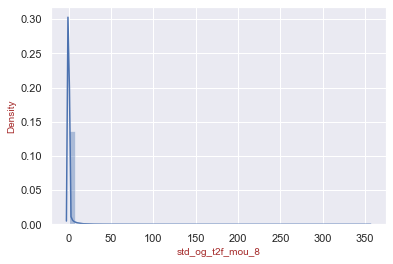

Plot 40


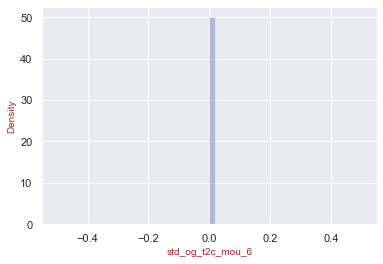

Plot 41


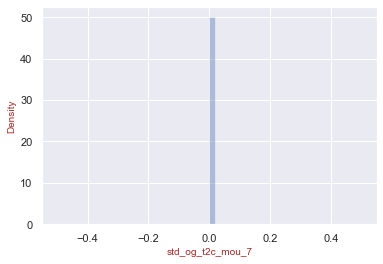

Plot 42


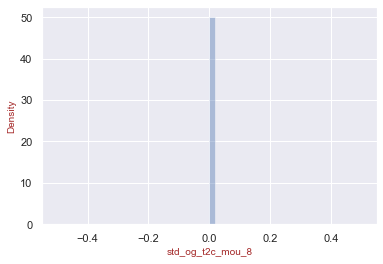

Plot 43


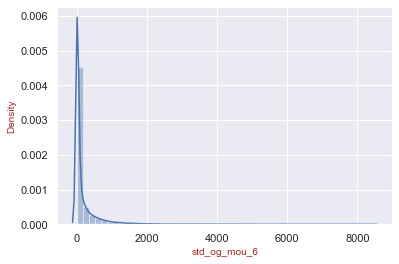

Plot 44


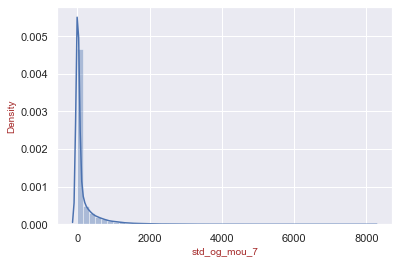

Plot 45


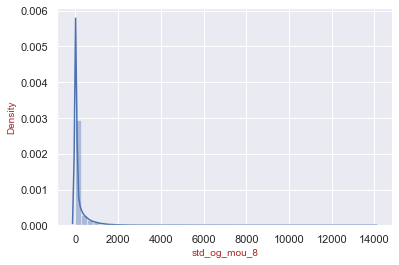

Plot 46


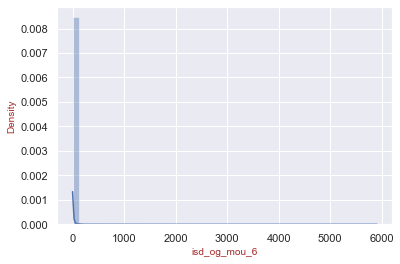

Plot 47


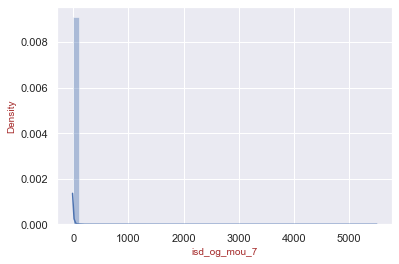

Plot 48


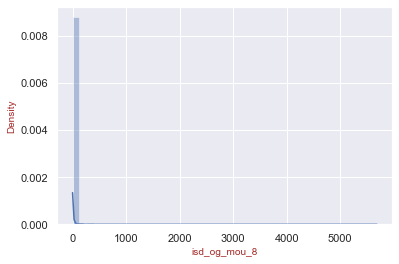

Plot 49


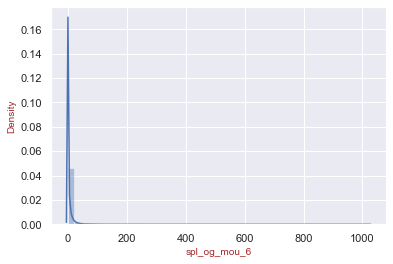

Plot 50


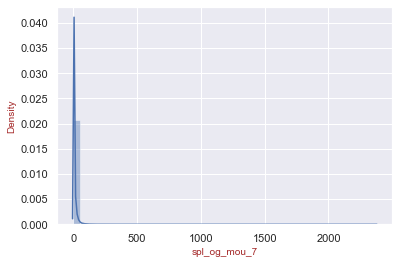

Plot 51


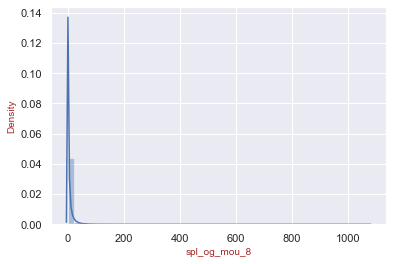

Plot 52


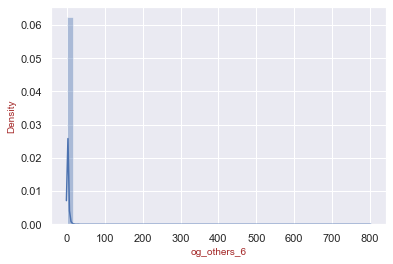

Plot 53


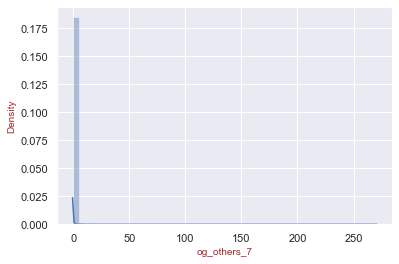

Plot 54


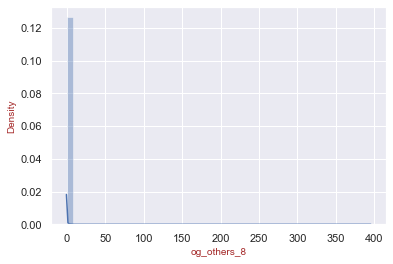

Plot 55


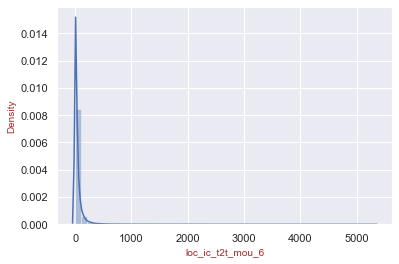

Plot 56


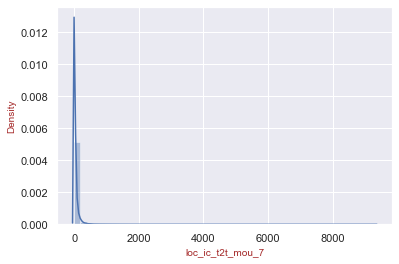

Plot 57


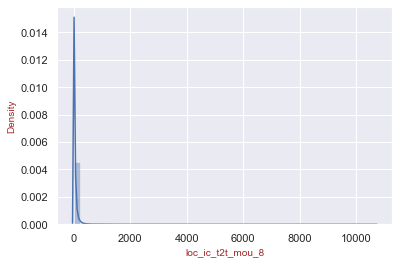

Plot 58


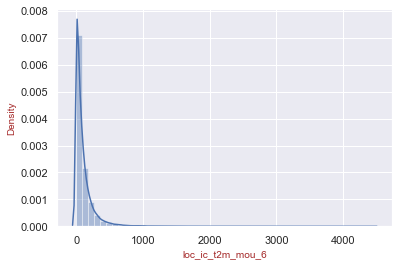

Plot 59


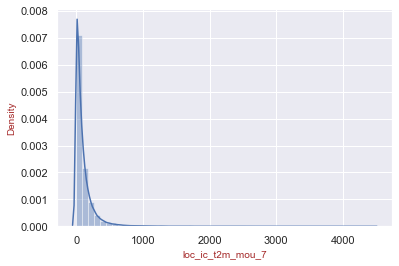

Plot 60


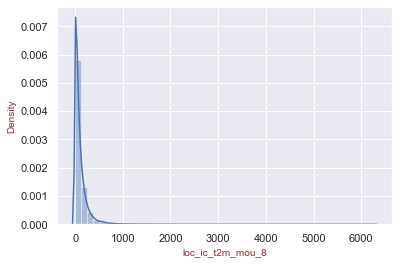

Plot 61


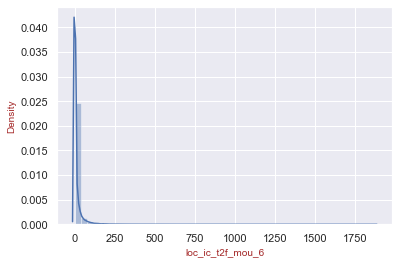

Plot 62


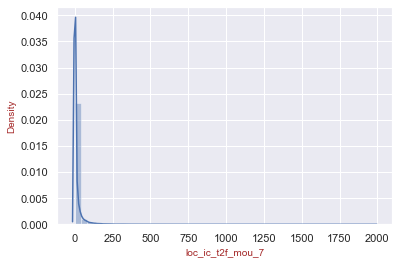

Plot 63


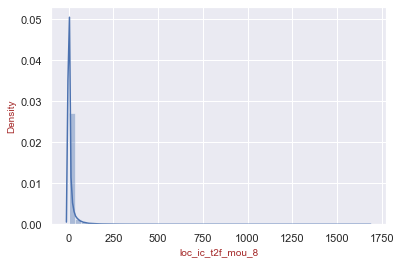

Plot 64


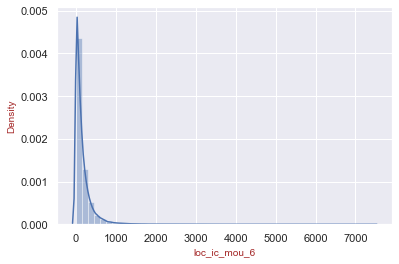

Plot 65


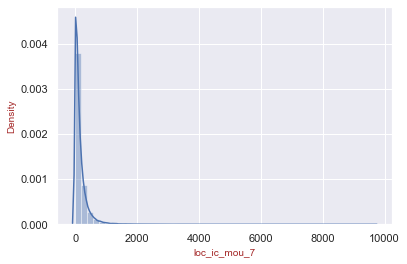

Plot 66


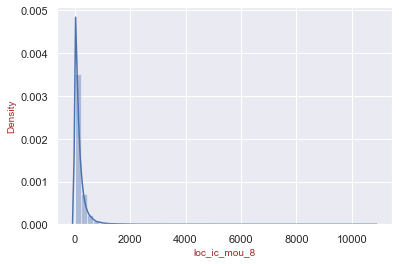

Plot 67


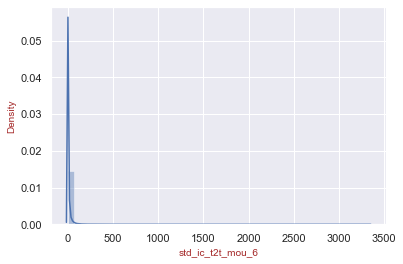

Plot 68


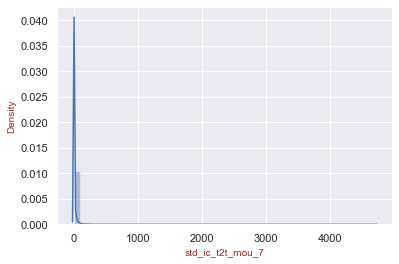

Plot 69


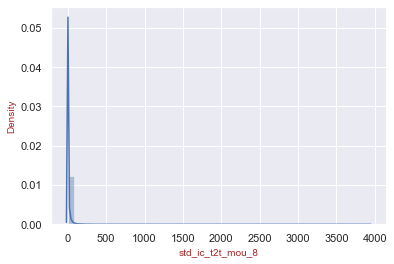

Plot 70


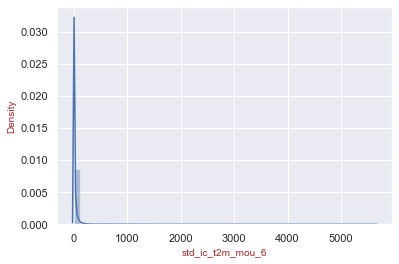

Plot 71


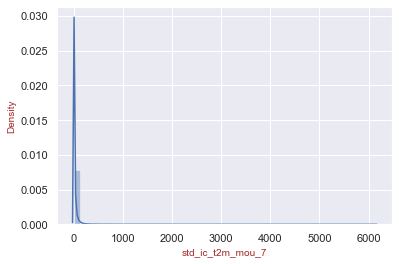

Plot 72


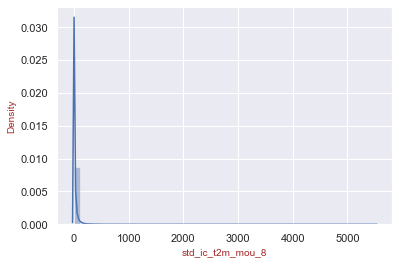

Plot 73


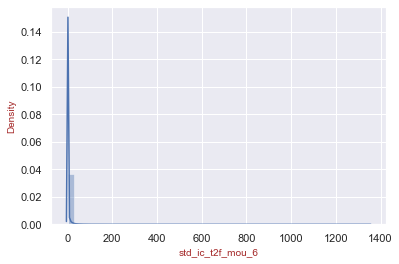

Plot 74


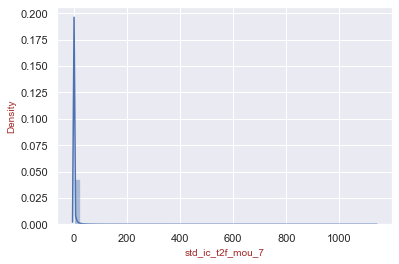

Plot 75


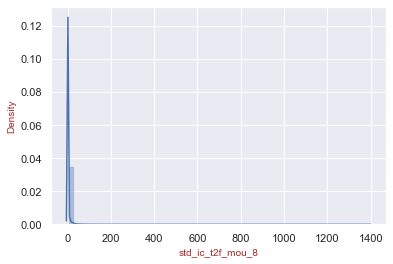

Plot 76


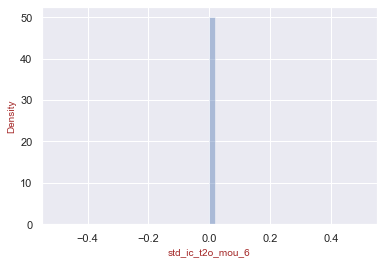

Plot 77


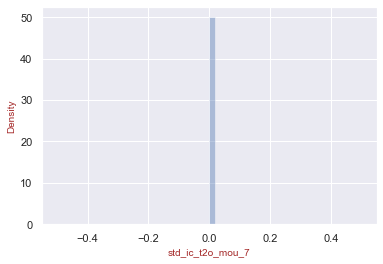

Plot 78


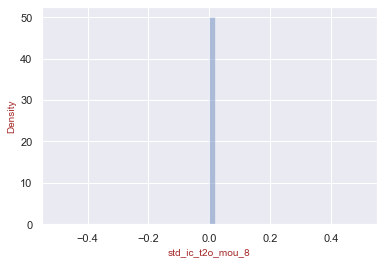

Plot 79


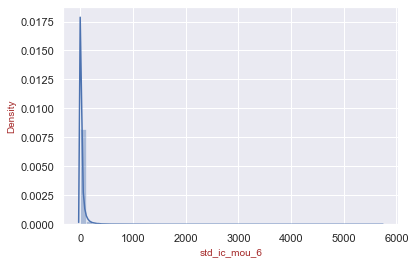

Plot 80


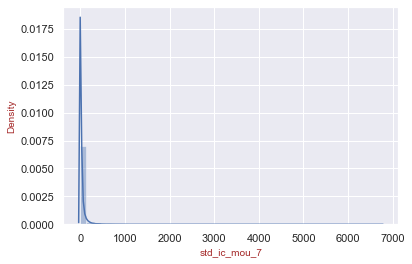

Plot 81


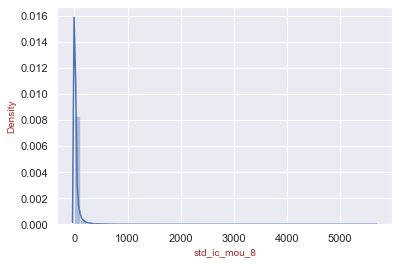

Plot 82


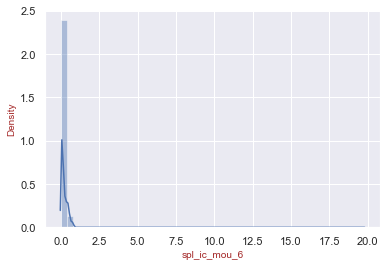

Plot 83


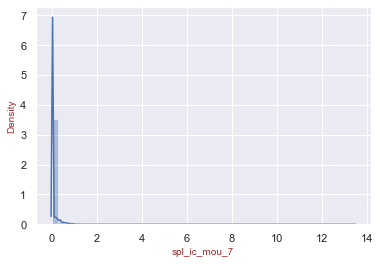

Plot 84


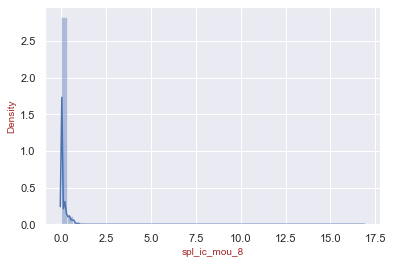

Plot 85


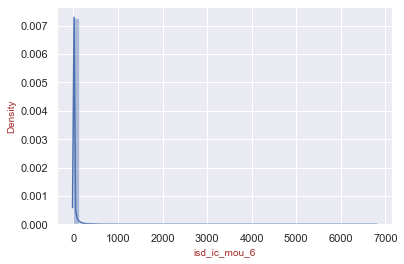

Plot 86


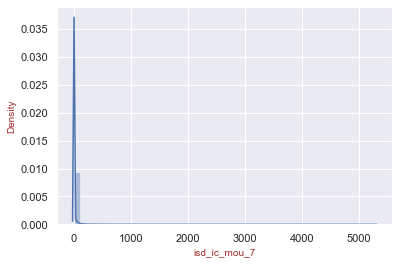

Plot 87


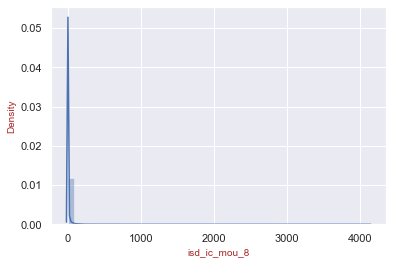

Plot 88


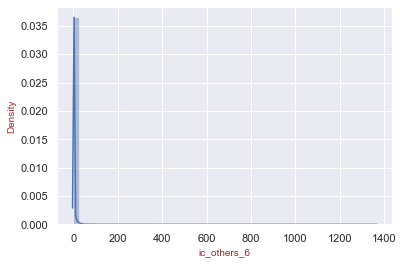

Plot 89


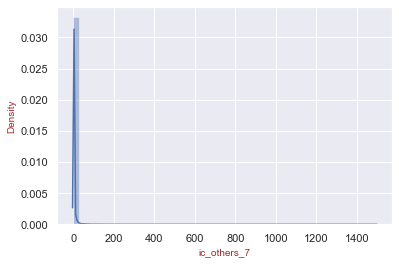

Plot 90


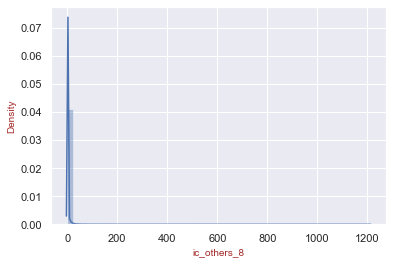

In [221]:
# Plotting distplot of numerical variables
    
n=0
for cols in num_col:
    n+=1
    print("Plot "+str(n))
    sns.distplot(num_impute_data[cols])
    plt.xlabel(cols, fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.ylabel("Density", fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.show()

In [222]:
# Inspecting columns as per above plots

print(num_impute_data.loc_og_t2o_mou.value_counts())
print(num_impute_data.std_og_t2o_mou.value_counts())
print(num_impute_data.loc_ic_t2o_mou.value_counts())

print(num_impute_data.std_og_t2c_mou_6.value_counts())
print(num_impute_data.std_og_t2c_mou_7.value_counts())
print(num_impute_data.std_og_t2c_mou_8.value_counts())

print(num_impute_data.std_ic_t2o_mou_6.value_counts())
print(num_impute_data.std_ic_t2o_mou_7.value_counts())
print(num_impute_data.std_ic_t2o_mou_8.value_counts())

0.0    69297
Name: loc_og_t2o_mou, dtype: int64
0.0    69297
Name: std_og_t2o_mou, dtype: int64
0.0    69297
Name: loc_ic_t2o_mou, dtype: int64
0.0    67231
Name: std_og_t2c_mou_6, dtype: int64
0.0    67312
Name: std_og_t2c_mou_7, dtype: int64
0.0    66296
Name: std_og_t2c_mou_8, dtype: int64
0.0    67231
Name: std_ic_t2o_mou_6, dtype: int64
0.0    67312
Name: std_ic_t2o_mou_7, dtype: int64
0.0    66296
Name: std_ic_t2o_mou_8, dtype: int64


***As we can see the columns `loc_og_t2o_mou`, `std_og_t2o_mou`, `loc_ic_t2o_mou`, `std_og_t2c_mou_6`, `std_og_t2c_mou_7`, `std_og_t2c_mou_8`, `std_ic_t2o_mou_6`, `std_ic_t2o_mou_7` and `std_ic_t2o_mou_8` have 0 as value which is irrelevant so we will be droping these columns.***

In [223]:
# Dropping the above irrelevant columns

num_impute_data = num_impute_data.loc[:, ~num_impute_data.columns.isin(["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8"])] 

In [224]:
num_impute_data.shape

(69999, 81)

In [225]:
# Storing the numeric column names

num_cols = num_impute_data.columns
num_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

***From the box plots of numerical columns we can see that all the columns seems to have outliers present in them so we will be using median for imputation.***

***And the imputation will be done using Simple Imputer.***

In [226]:
# Imputing the missing values by replacing them with median 

imputer = SimpleImputer(strategy='median')
num_impute_data = imputer.fit_transform(num_impute_data)

In [227]:
# Checking the missing value count

sum(np.isnan(num_impute_data).flatten())

0

In [228]:
# Converting the array to Dataframe

num_impute_data = pd.DataFrame(num_impute_data)
num_impute_data.head()

0       1     2      3      4      5      6    7    8      9    10  \
0  48.58  124.38  1.29  32.24  96.68   2.33   0.00  0.0  0.0   0.00  0.0   
1   0.00    0.00  0.00   0.00  25.99  30.89   0.00  0.0  0.0   0.00  0.0   
2   0.53   15.93  0.00  53.99  82.05   0.00   0.00  0.0  0.0   0.00  0.0   
3   7.26   16.01  0.00  68.76  78.48  50.23   0.00  0.0  0.0   0.00  0.0   
4  21.28    4.83  6.13  56.99  38.11   9.63  53.64  0.0  0.0  15.73  0.0   

     11     12     13    14     15     16     17     18    19    20    21  \
0  0.00   2.23   0.00  0.28   5.29  16.04   2.33   0.00  0.00  0.00  0.00   
1  0.00   0.00   0.00  0.00   0.00   0.00   0.00   0.00  0.00  0.00  0.00   
2  0.00   0.53  12.98  0.00  24.11   0.00   0.00   0.00  0.00  0.00  2.14   
3  1.63   6.99   3.94  0.00  37.91  44.89  23.63   0.00  0.00  0.00  0.00   
4  0.00  10.16   4.83  6.13  36.74  19.88   4.61  11.99  1.23  5.01  0.00   

      22     23     24     25     26     27      28    29     30     31   32  \
0   0.00   0.00   7.53  16.04   2.61  46.34  124.38  1.01  18.75  80.61  0.0   
1  22.01  29.79   0.00   0.00   0.00   0.00    0.00  0.00   0.00   0.00  0.0   
2   0.00   0.00  24.64  12.98   0.00   0.00    2.94  0.00  28.94  82.05  0.0   
3   0.00   8.03  44.91  48.84  23.63   0.26   12.06  0.00  15.33  25.93  4.6   
4   9.85   0.00  58.91  25.94  15.76   0.00    0.00  0.00   4.35   0.00  0.0   

     33   34   35     36      37    38   39   40   41     42     43     44  \
0  0.00  0.0  0.0  65.09  204.99  1.01  0.0  0.0  0.0   8.20   0.63   0.00   
1  0.00  0.0  0.0   0.00    0.00  0.00  0.0  0.0  0.0   0.00  30.73  31.66   
2  0.00  0.0  0.0  28.94   84.99  0.00  0.0  0.0  0.0   2.89   1.38   0.00   
3  0.56  0.0  0.0  16.16   37.99  4.60  0.0  0.0  0.0  14.95   9.13  25.61   
4  0.00  0.0  0.0   4.35    0.00  0.00  0.0  0.0  0.0   0.00  17.00   0.00   

     45   46   47     48     49     50     51     52     53    54    55    56  \
0  0.38  0.0  0.0   2.43   3.68   7.79   0.83  21.08  16.91  0.00  0.00  0.00   
1  0.00  0.0  0.0   1.68  19.09  10.53   1.41  18.68  11.09  0.35  1.66  3.40   
2  0.00  0.0  0.0   4.51   6.16   6.49  89.86  25.18  23.51  0.00  0.00  0.00   
3  0.00  0.0  0.0  24.98   4.84  23.88  53.99  44.23  57.14  7.23  0.81  0.00   
4  0.00  0.0  0.0   5.44   1.39   2.66  10.58   4.33  19.49  5.51  3.63  6.14   

      57     58     59     60    61    62     63     64     65   66   67   68  \
0   3.26  24.76  24.71   0.00  7.61  0.21   7.46  19.96  14.96  0.0  0.0  0.0   
1   3.44  39.44  25.03   0.00  0.00  0.00   0.00   0.00   0.00  0.0  0.0  0.0   
2  94.38  31.34  30.01  11.69  0.00  0.00  18.21   2.48   6.38  0.0  0.0  0.0   
3  86.21  49.89  81.03   0.00  0.00  0.00   8.89   0.28   2.81  0.0  0.0  0.0   
4  21.54   9.36  28.31   0.00  0.00  0.00   0.00   0.00   0.00  0.0  0.0  0.0   

      69     70     71   72   73    74   75   76   77    78    79    80  
0   7.46  27.58  15.18  0.0  0.0  0.66  0.0  0.0  0.0  1.11  0.69  0.00  
1   0.00   0.00   0.00  0.0  0.0  0.01  0.0  0.0  0.0  0.00  0.00  0.00  
2  29.91   2.48   6.38  0.0  0.0  0.00  0.0  0.0  0.0  0.00  0.00  0.25  
3   8.89   0.28   2.81  0.0  0.0  0.00  0.0  0.0  0.0  0.00  0.00  0.00  
4   0.00   0.00   0.00  0.0  0.0  0.00  0.0  0.0  0.0  0.00  0.00  0.00

In [229]:
# Adding column name to the dataset

num_impute_data.columns = num_cols

In [230]:
# Checking the head of dataset
num_impute_data.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        48.58       124.38         1.29         32.24         96.68   
1         0.00         0.00         0.00          0.00         25.99   
2         0.53        15.93         0.00         53.99         82.05   
3         7.26        16.01         0.00         68.76         78.48   
4        21.28         4.83         6.13         56.99         38.11   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          2.33           0.00            0.0            0.0           0.00   
1         30.89           0.00            0.0            0.0           0.00   
2          0.00           0.00            0.0            0.0           0.00   
3         50.23           0.00            0.0            0.0           0.00   
4          9.63          53.64            0.0            0.0          15.73   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.0           0.00              2.23              0.00   
1            0.0           0.00              0.00              0.00   
2            0.0           0.00              0.53             12.98   
3            0.0           1.63              6.99              3.94   
4            0.0           0.00             10.16              4.83   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.28              5.29             16.04              2.33   
1              0.00              0.00              0.00              0.00   
2              0.00             24.11              0.00              0.00   
3              0.00             37.91             44.89             23.63   
4              6.13             36.74             19.88              4.61   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              2.14   
3              0.00              0.00              0.00              0.00   
4             11.99              1.23              5.01              0.00   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00          7.53         16.04   
1             22.01             29.79          0.00          0.00   
2              0.00              0.00         24.64         12.98   
3              0.00              8.03         44.91         48.84   
4              9.85              0.00         58.91         25.94   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          2.61             46.34            124.38              1.01   
1          0.00              0.00              0.00              0.00   
2          0.00              0.00              2.94              0.00   
3         23.63              0.26             12.06              0.00   
4         15.76              0.00              0.00              0.00   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0             18.75             80.61               0.0              0.00   
1              0.00              0.00               0.0              0.00   
2             28.94             82.05               0.0              0.00   
3             15.33             25.93               4.6              0.56   
4              4.35              0.00               0.0              0.00   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0               0.0               0.0         65.09        204.99   
1               0.0               0.0          0.00          0.00   
2               0.0               0.0         28.94         84.99   
3               0.0               0.0         16.16         37.99   
4               0.0               0.0          4.35          0.00   

   std_og_

In [231]:
# Concatenating the datasets filtered_data, cat_impute_data and num_impute_data

data_1 = pd.concat([filtered_data, cat_impute_data, num_impute_data], axis=1)
data_1.head()

id   arpu_6   arpu_7   arpu_8  total_og_mou_6  total_og_mou_7  \
0   0   31.277   87.009    7.527           81.21          221.68   
1   1    0.000  122.787   42.953            0.00           30.73   
2   2   60.806  103.176    0.000           56.49           99.36   
3   3  156.362  205.260  111.095           76.03           95.98   
4   4  240.708  128.191  101.565           63.26           42.94   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0            3.63           11.84           53.04           40.56   
1           31.66            3.44           39.44           25.04   
2            0.00          124.29           33.83           36.64   
3           53.84           95.11           50.18           83.84   
4           15.76           21.54            9.36           28.31   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0                 3                 2                 2                77   
1                 3                 4                 5                 0   
2                 2                 4                 2                70   
3                 2                 4                 3               160   
4                13                10                 8               290   

   total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
0                65                10              65              65   
1               145                50               0             145   
2               120                 0              70              70   
3               240               130             110             110   
4               136               122              50              41   

   max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
0              10                  65                  65                   0   
1              50                   0                   0                   0   
2               0                  70                  50                   0   
3              50                 110                 110                  50   
4              30                  25                  10                  30   

   vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  \
0          0.0         0.00         0.00          0.0         0.00   
1          0.0       352.91         0.00          0.0         3.96   
2          0.0         0.00         0.00          0.0         0.00   
3          0.0         0.00         0.00          0.0         0.00   
4        390.8       308.89       213.47          0.0         0.00   

   vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
0          0.0             0             0             0            0   
1          0.0             0             0             0            0   
2          0.0             0             0             0            0   
3          0.0             0             0             0            0   
4          0.0             0             0             0            7   

   sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
0            0            0             0             0             0   
1            0            0             0             1             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            6            6             0             0             0   

   sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  \
0            0            0            0  1958         0.0         0.0   
1            0            0            0   710         0.0         0.0   
2            0            0            0   882         0.0         0.0   
3            0            0            0   982         0.0         0.0   
4            0            1            0   647         0.0         0.0   

   jun_vbc_3g  churn_probability  date_of_last

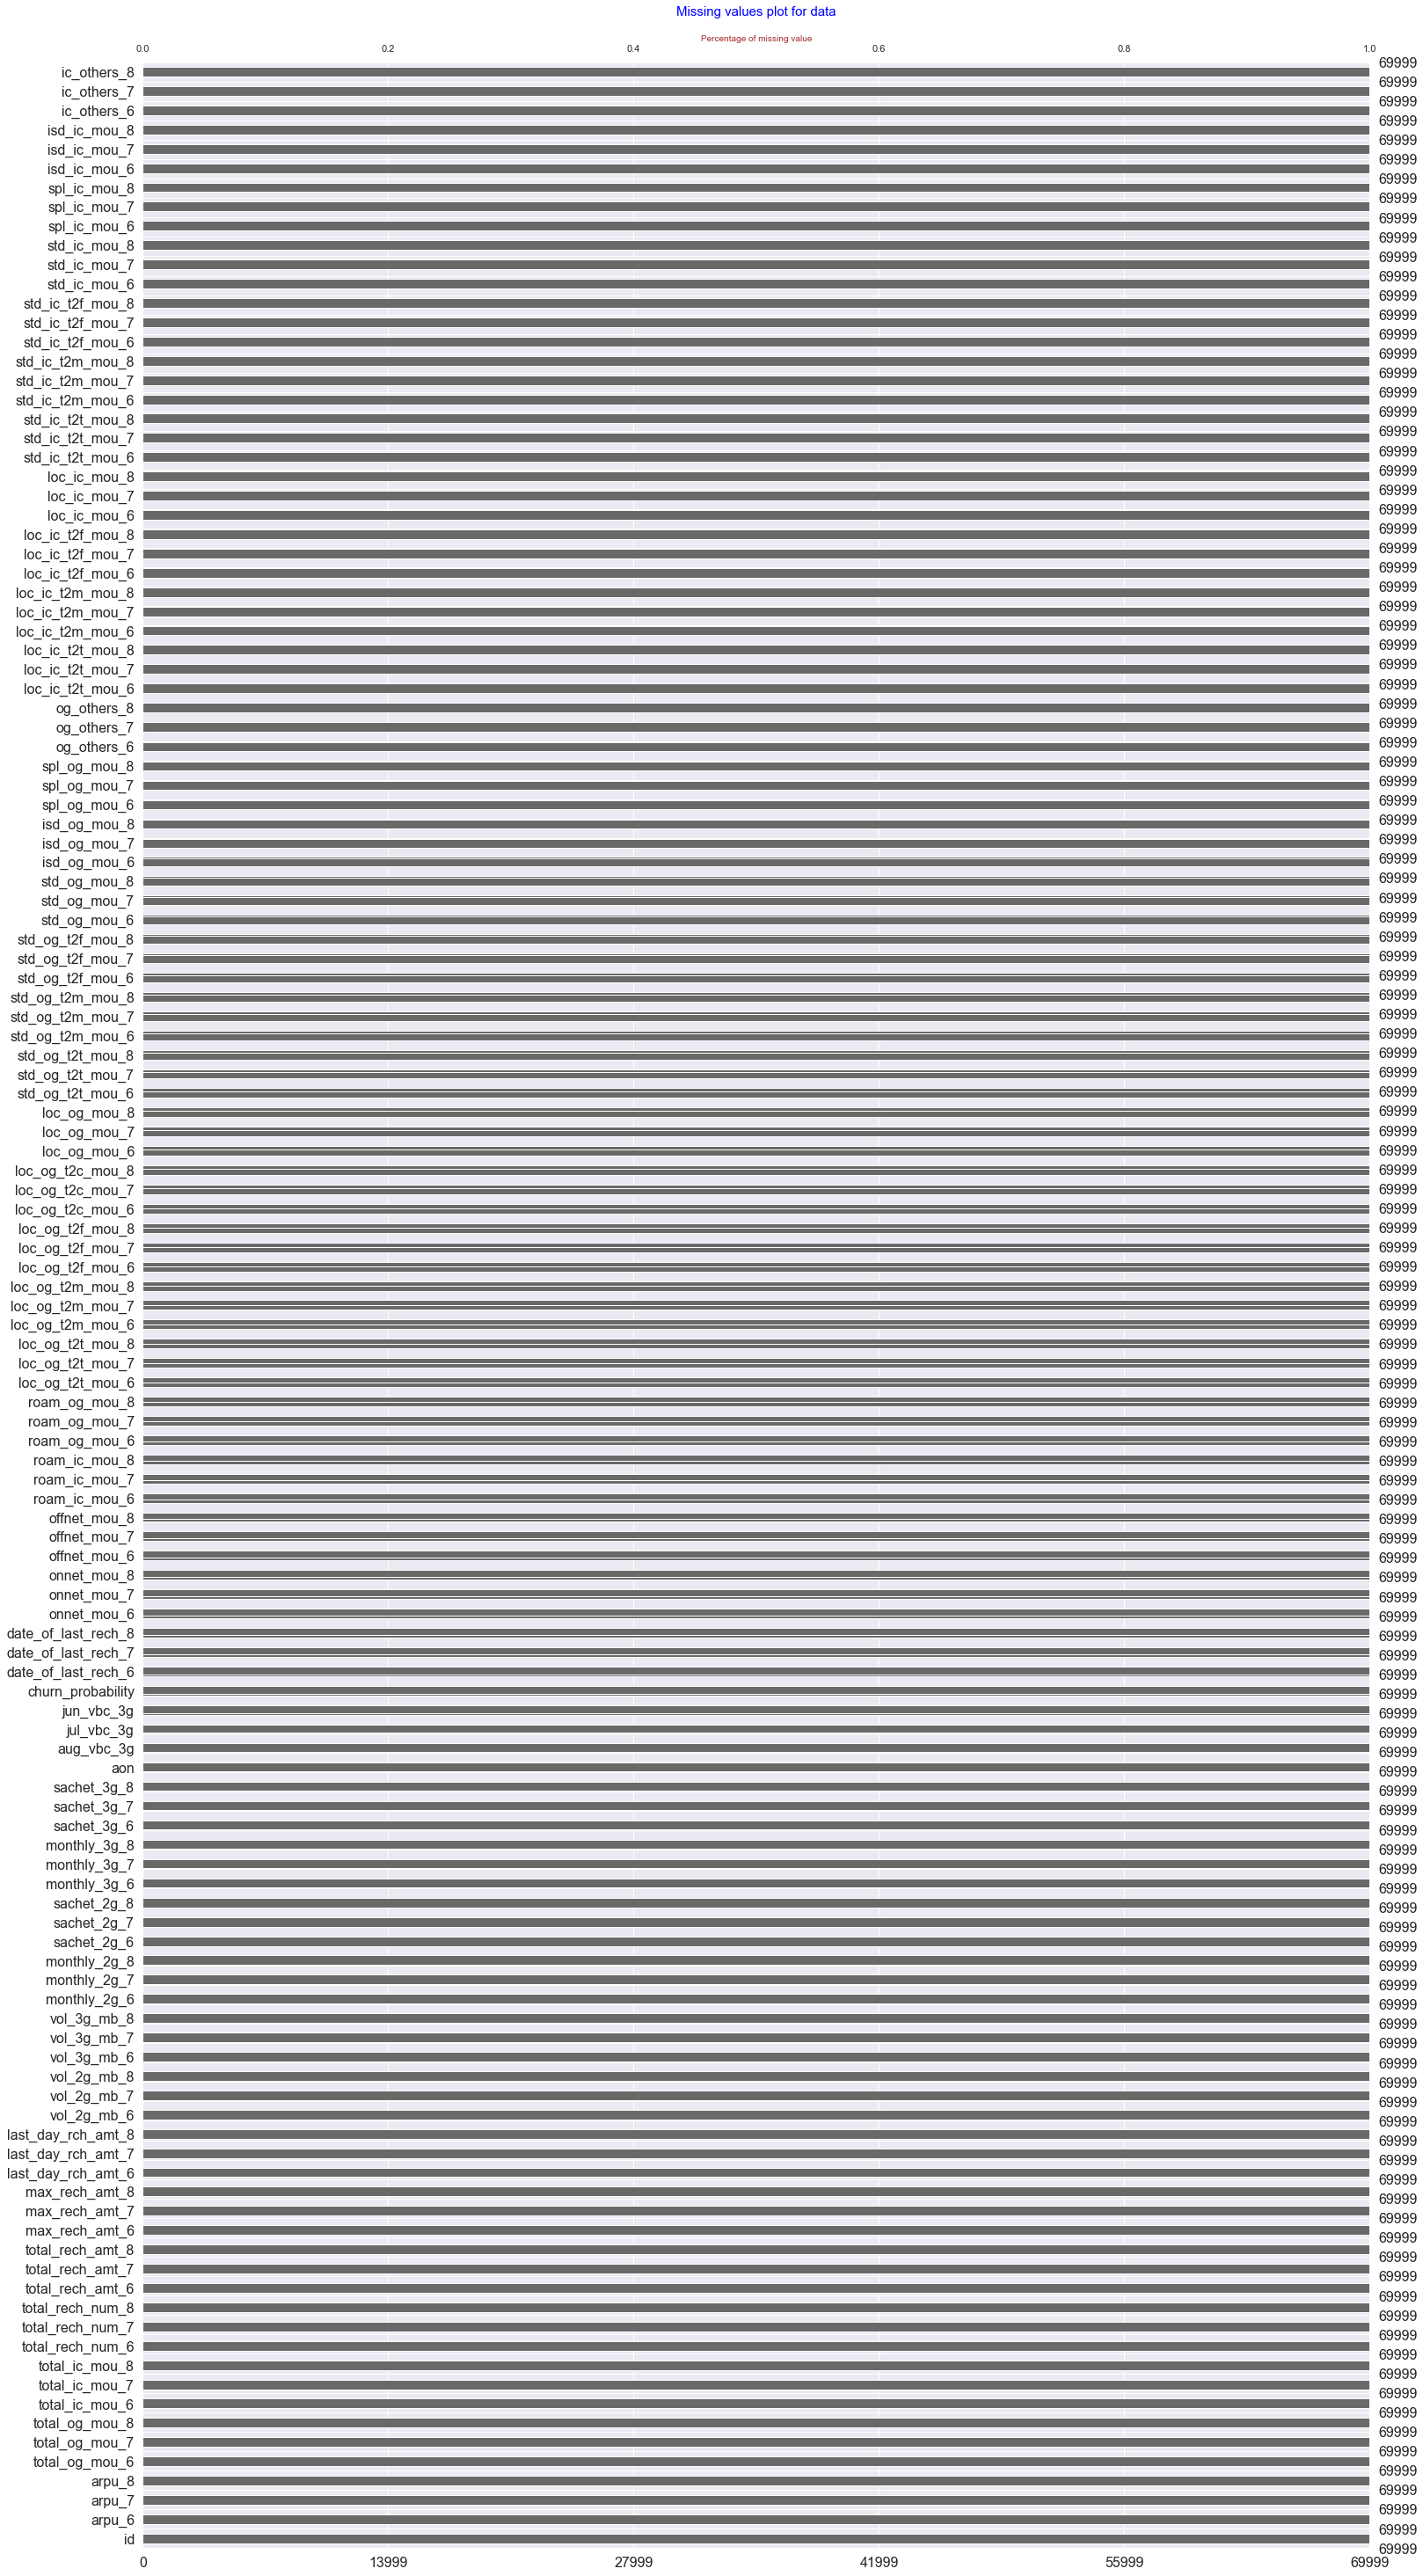

In [232]:
# Re-checking the Null values
# Plotting the missing values using msno.bar

msno.bar(data_1)
plt.title("Missing values plot for data\n", fontdict={"fontsize":15, "fontweight":5, "color":"blue"})
plt.xlabel("Percentage of missing value", fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
plt.ylabel("Columns", fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
plt.show()

***Now our dataset does not contain any missing values.***

***Let us go ahead and do the outliers analysis on dataset.***

### Outliers Analysis

In [233]:
# Re-Checking for info of the dataset for dtypes

data_1.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 129 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id                   int64  
 1   arpu_6               float64
 2   arpu_7               float64
 3   arpu_8               float64
 4   total_og_mou_6       float64
 5   total_og_mou_7       float64
 6   total_og_mou_8       float64
 7   total_ic_mou_6       float64
 8   total_ic_mou_7       float64
 9   total_ic_mou_8       float64
 10  total_rech_num_6     int64  
 11  total_rech_num_7     int64  
 12  total_rech_num_8     int64  
 13  total_rech_amt_6     int64  
 14  total_rech_amt_7     int64  
 15  total_rech_amt_8     int64  
 16  max_rech_amt_6       int64  
 17  max_rech_amt_7       int64  
 18  max_rech_amt_8       int64  
 19  last_day_rch_amt_6   int64  
 20  last_day_rch_amt_7   int64  
 21  last_day_rch_amt_8   int64  
 22  vol_2g_mb_6          float64
 23  vol_2g_mb_7          float64
 24  v

***As we can see that column `id` have dtype as int64 but as it is not continous we will not be including them in outlier analysis. Also `churn_probability` is our target column for classification. So, we will be excluding these columns for Outlier analysis.*** 

In [234]:
# Dropping column id and circle_id

data_2 = data_1.drop(columns=["id", "churn_probability"], axis=1)
data_2.head()

arpu_6   arpu_7   arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0   31.277   87.009    7.527           81.21          221.68            3.63   
1    0.000  122.787   42.953            0.00           30.73           31.66   
2   60.806  103.176    0.000           56.49           99.36            0.00   
3  156.362  205.260  111.095           76.03           95.98           53.84   
4  240.708  128.191  101.565           63.26           42.94           15.76   

   total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_num_6  \
0           11.84           53.04           40.56                 3   
1            3.44           39.44           25.04                 3   
2          124.29           33.83           36.64                 2   
3           95.11           50.18           83.84                 2   
4           21.54            9.36           28.31                13   

   total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  \
0                 2                 2                77                65   
1                 4                 5                 0               145   
2                 4                 2                70               120   
3                 4                 3               160               240   
4                10                 8               290               136   

   total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0                10              65              65              10   
1                50               0             145              50   
2                 0              70              70               0   
3               130             110             110              50   
4               122              50              41              30   

   last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  vol_2g_mb_6  \
0                  65                  65                   0          0.0   
1                   0                   0                   0          0.0   
2                  70                  50                   0          0.0   
3                 110                 110                  50          0.0   
4                  25                  10                  30        390.8   

   vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  \
0         0.00         0.00          0.0         0.00          0.0   
1       352.91         0.00          0.0         3.96          0.0   
2         0.00         0.00          0.0         0.00          0.0   
3         0.00         0.00          0.0         0.00          0.0   
4       308.89       213.47          0.0         0.00          0.0   

   monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  \
0             0             0             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   
3             0             0             0            0            0   
4             0             0             0            7            6   

   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  \
0            0             0             0             0            0   
1            0             0             1             0            0   
2            0             0             0             0            0   
3            0             0             0             0            0   
4            6             0             0             0            0   

   sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0            0            0  1958         0.0         0.0         0.0   
1            0            0   710         0.0         0.0         0.0   
2            0            0   882         0.0         0.0         0.0   
3            0            0   982         0.0         0.0         0.0   
4            1            0   647         0.0         0.0         0.0   


***We will be visualising the box plots of all the variables.***

Plot 1


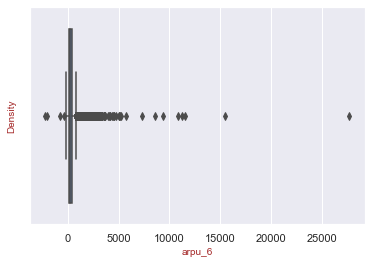

Plot 2


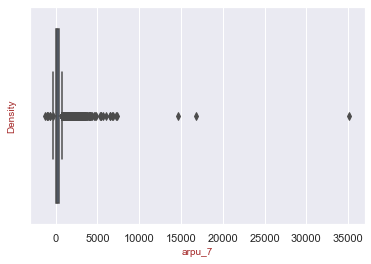

Plot 3


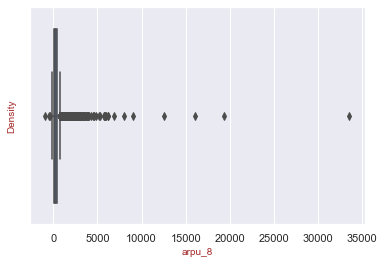

Plot 4


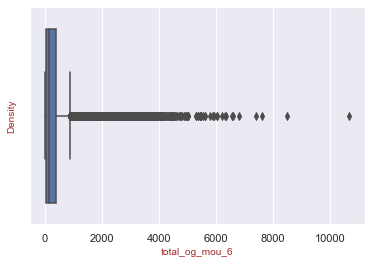

Plot 5


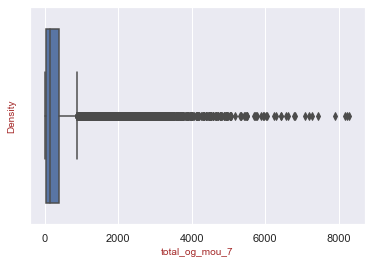

Plot 6


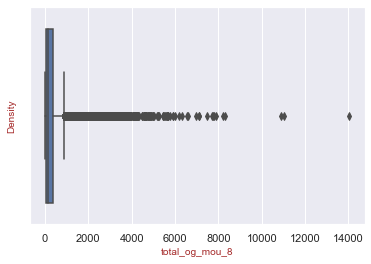

Plot 7


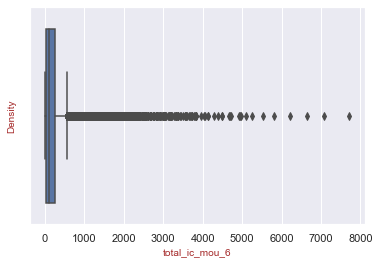

Plot 8


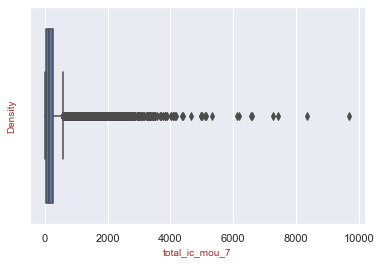

Plot 9


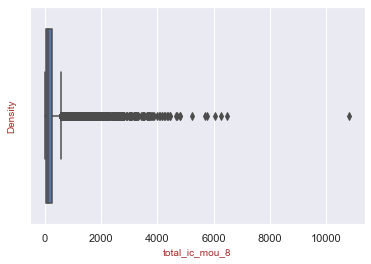

Plot 10


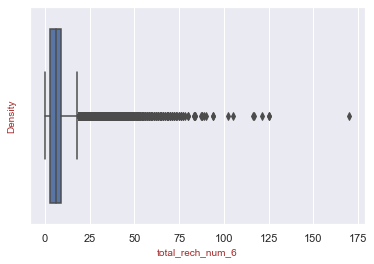

Plot 11


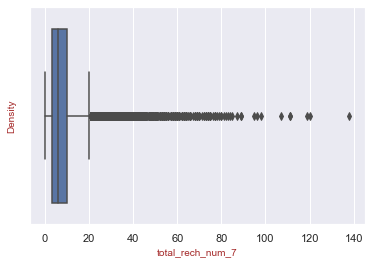

Plot 12


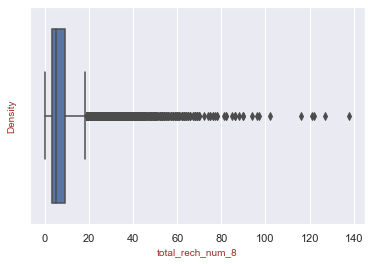

Plot 13


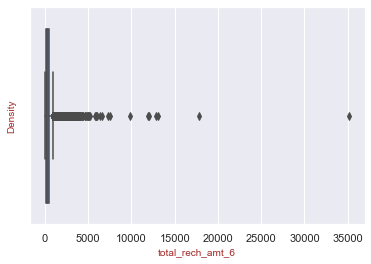

Plot 14


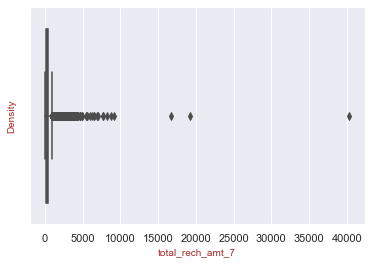

Plot 15


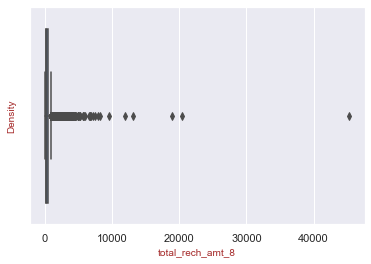

Plot 16


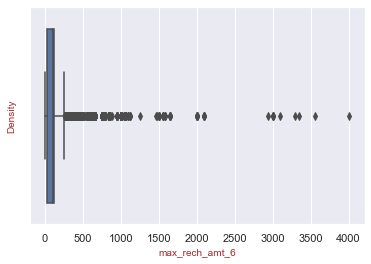

Plot 17


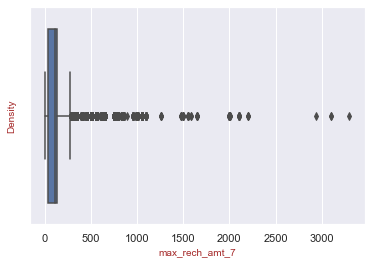

Plot 18


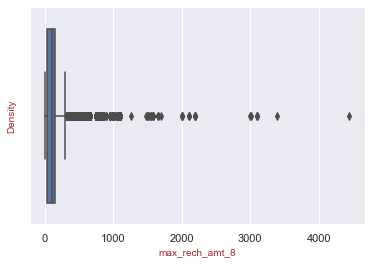

Plot 19


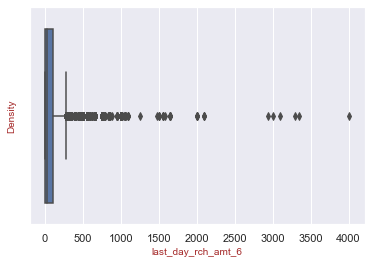

Plot 20


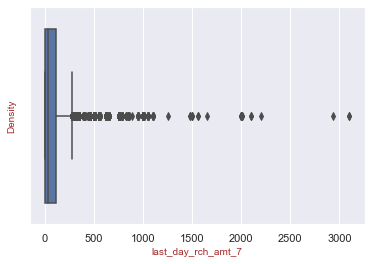

Plot 21


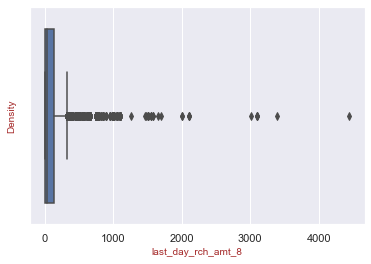

Plot 22


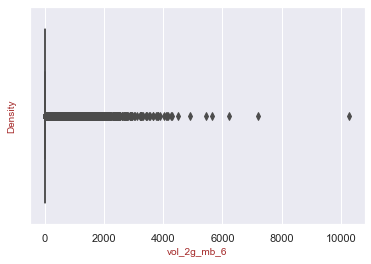

Plot 23


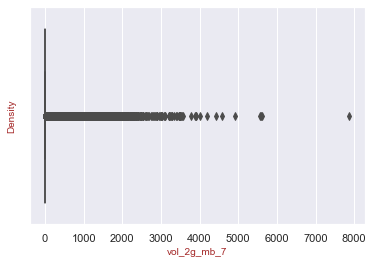

Plot 24


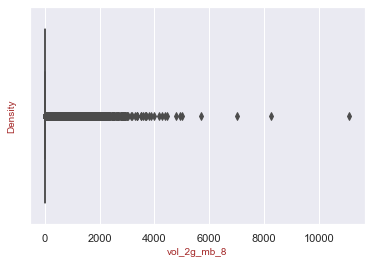

Plot 25


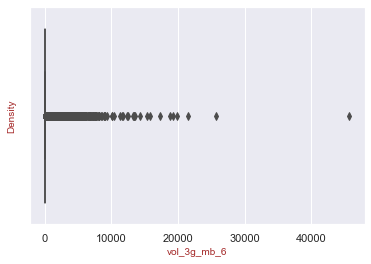

Plot 26


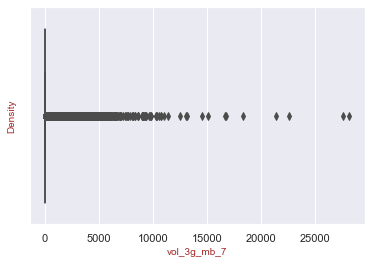

Plot 27


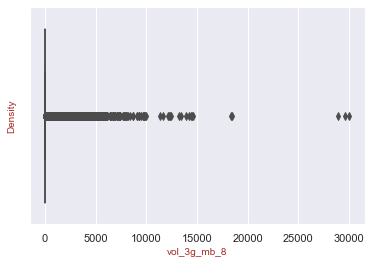

Plot 28


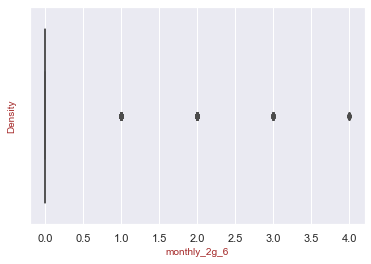

Plot 29


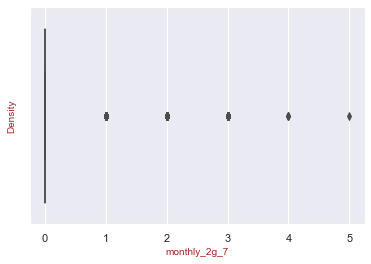

Plot 30


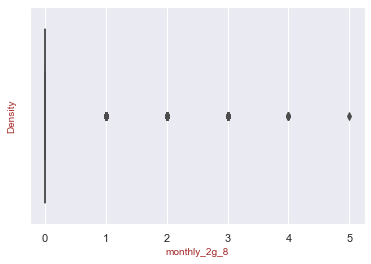

Plot 31


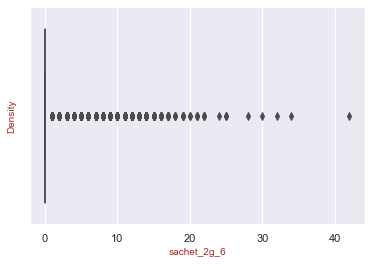

Plot 32


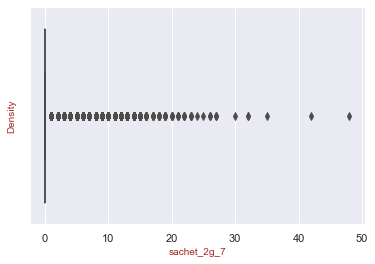

Plot 33


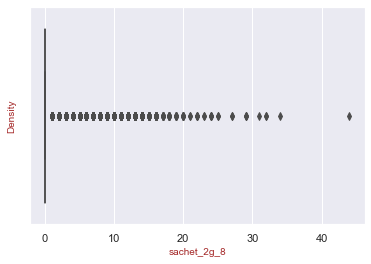

Plot 34


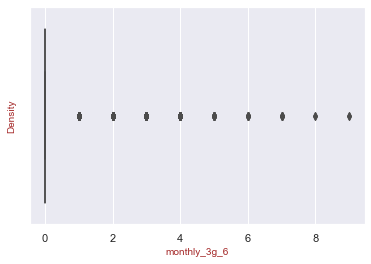

Plot 35


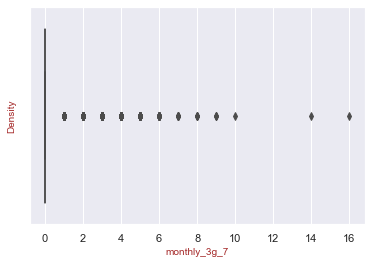

Plot 36


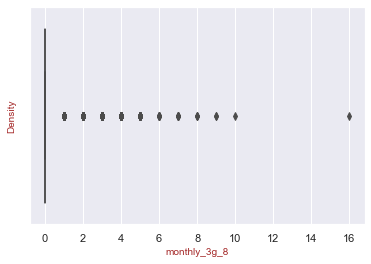

Plot 37


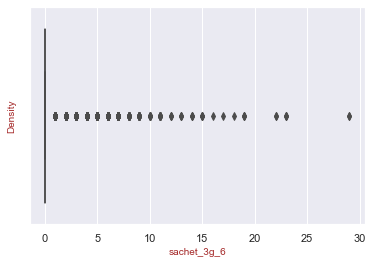

Plot 38


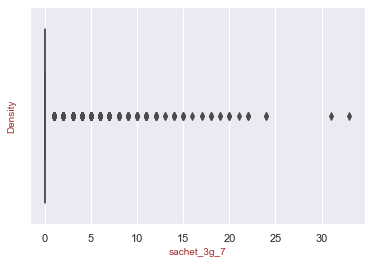

Plot 39


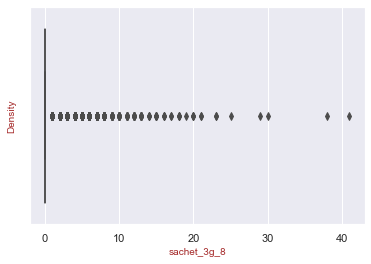

Plot 40


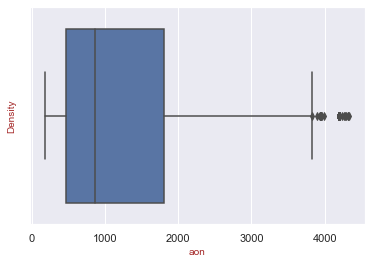

Plot 41


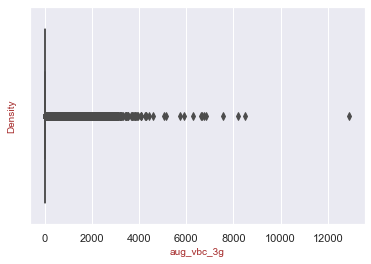

Plot 42


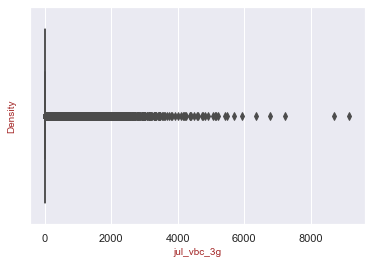

Plot 43


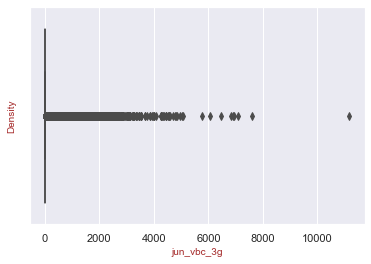

Plot 44


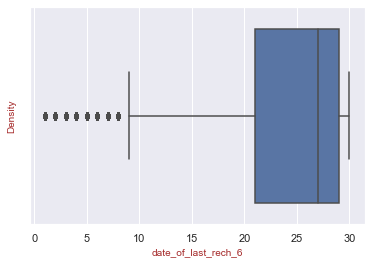

Plot 45


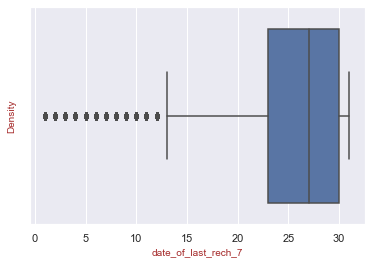

Plot 46


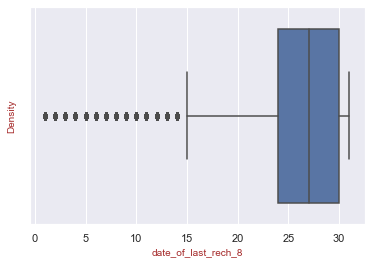

Plot 47


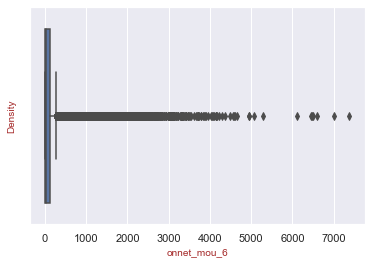

Plot 48


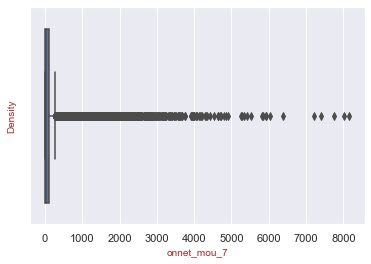

Plot 49


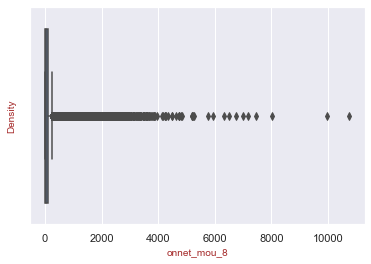

Plot 50


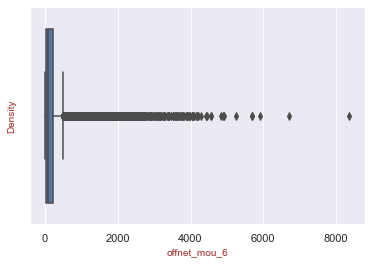

Plot 51


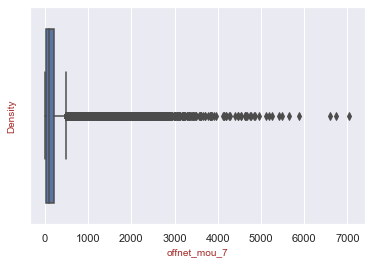

Plot 52


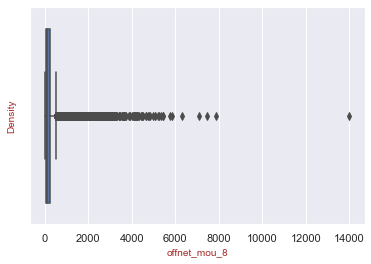

Plot 53


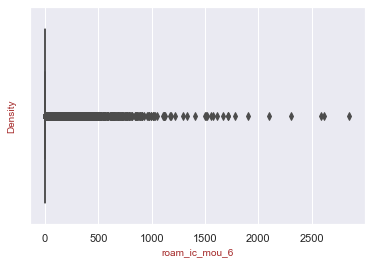

Plot 54


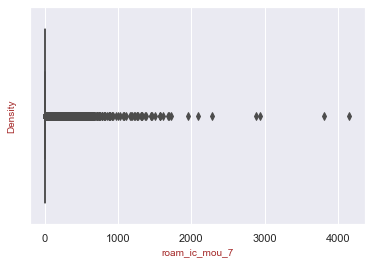

Plot 55


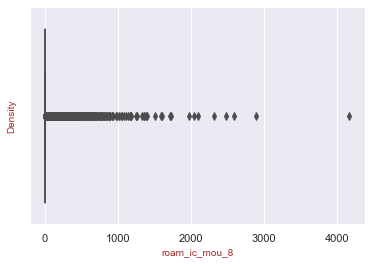

Plot 56


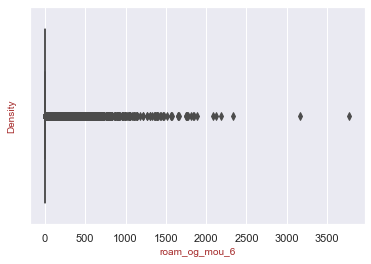

Plot 57


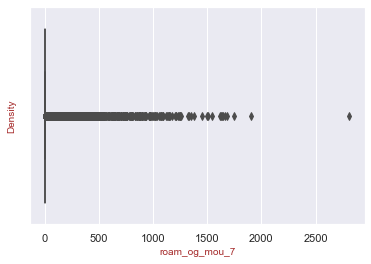

Plot 58


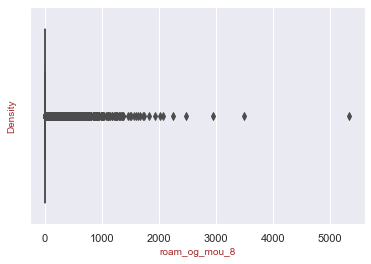

Plot 59


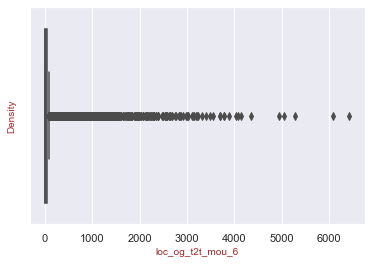

Plot 60


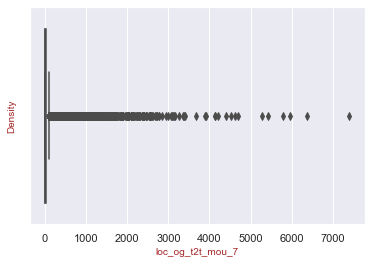

Plot 61


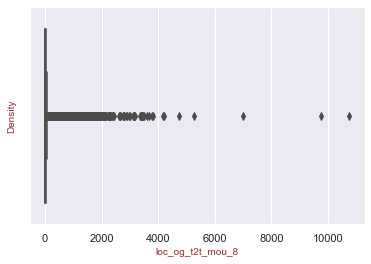

Plot 62


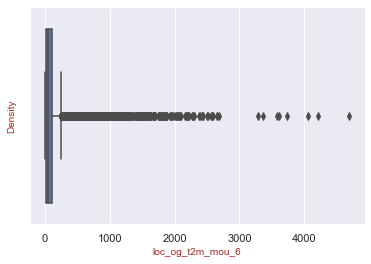

Plot 63


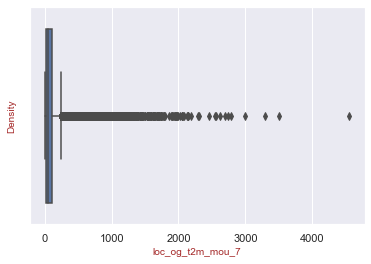

Plot 64


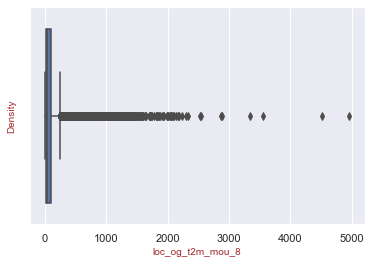

Plot 65


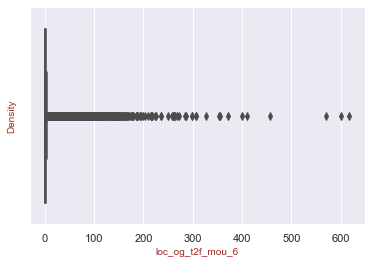

Plot 66


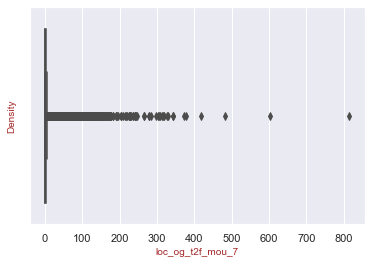

Plot 67


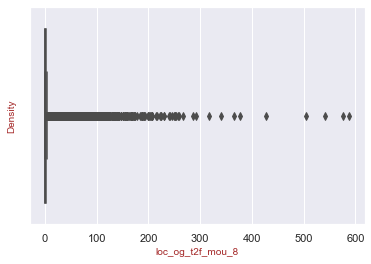

Plot 68


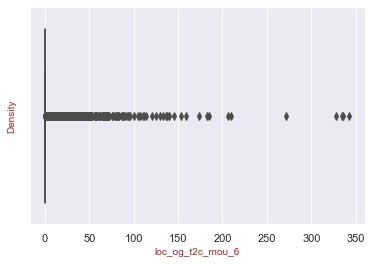

Plot 69


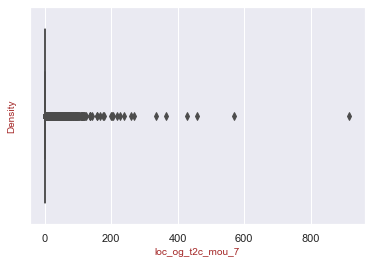

Plot 70


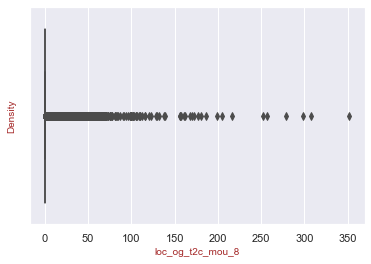

Plot 71


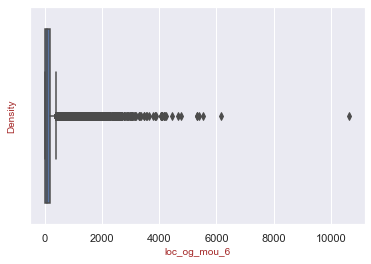

Plot 72


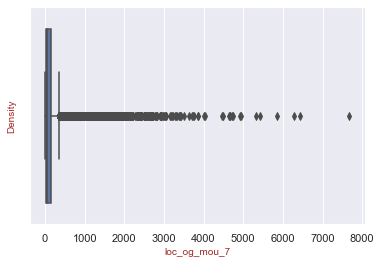

Plot 73


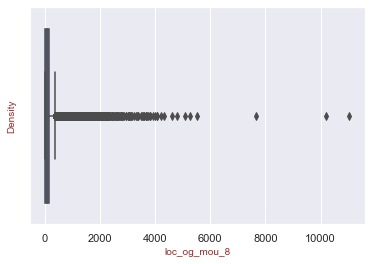

Plot 74


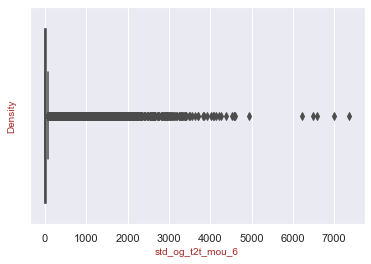

Plot 75


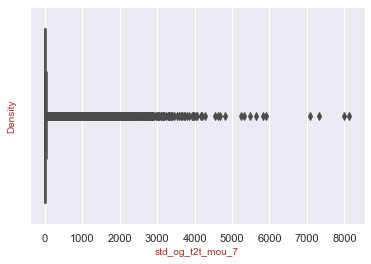

Plot 76


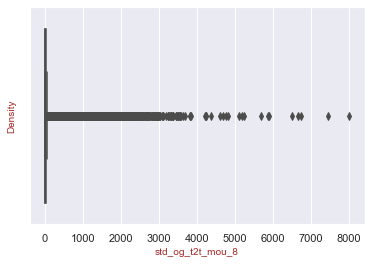

Plot 77


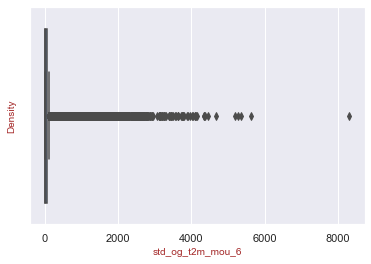

Plot 78


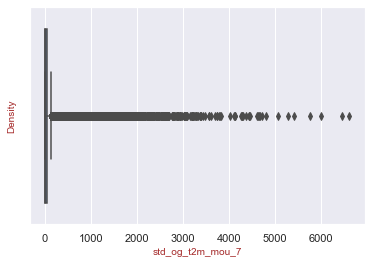

Plot 79


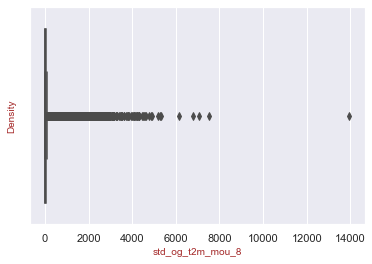

Plot 80


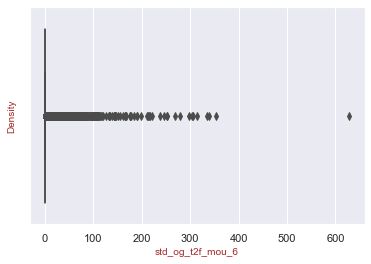

Plot 81


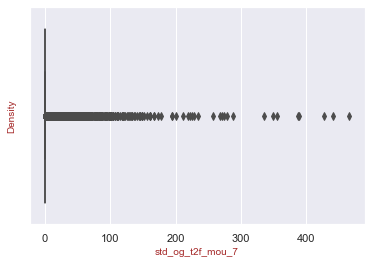

Plot 82


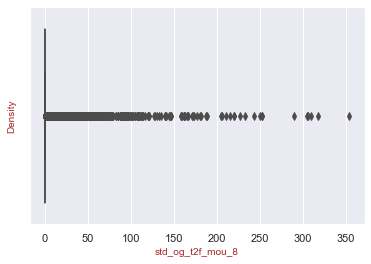

Plot 83


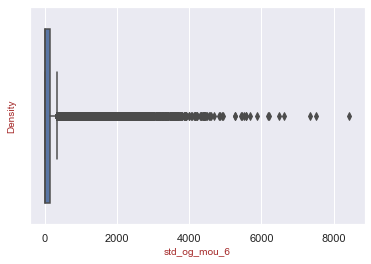

Plot 84


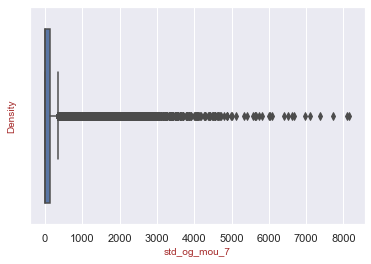

Plot 85


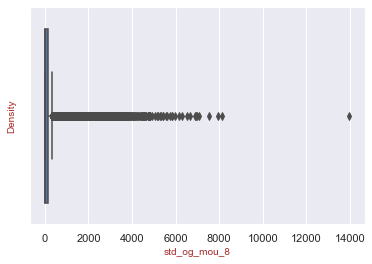

Plot 86


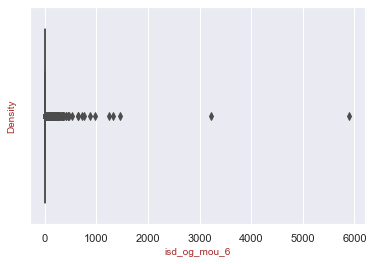

Plot 87


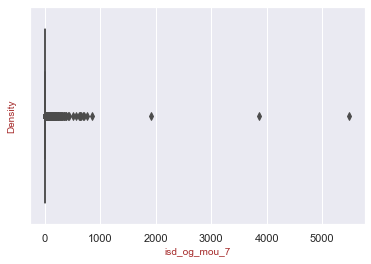

Plot 88


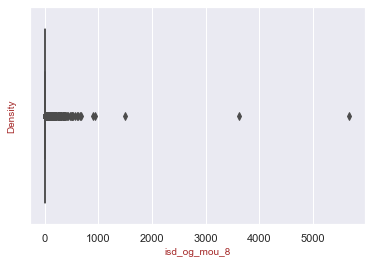

Plot 89


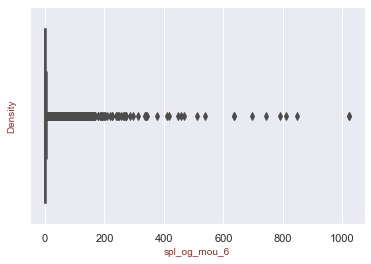

Plot 90


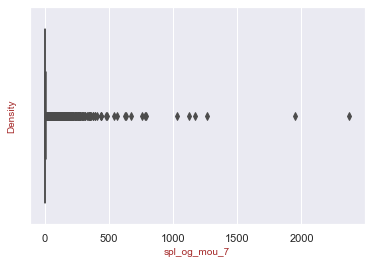

Plot 91


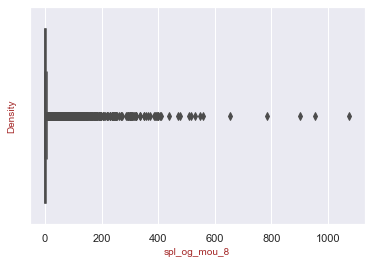

Plot 92


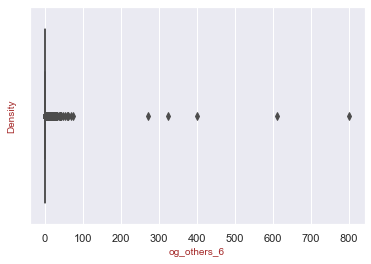

Plot 93


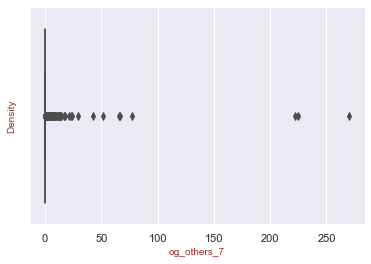

Plot 94


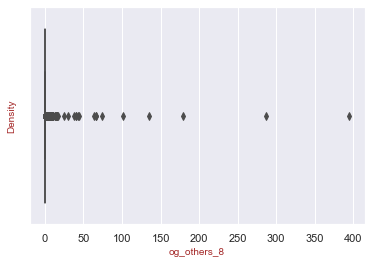

Plot 95


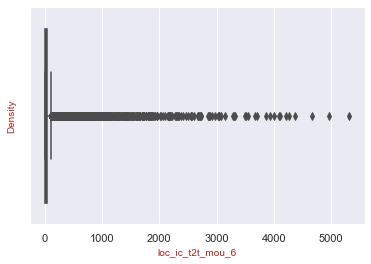

Plot 96


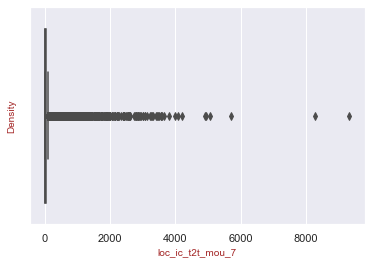

Plot 97


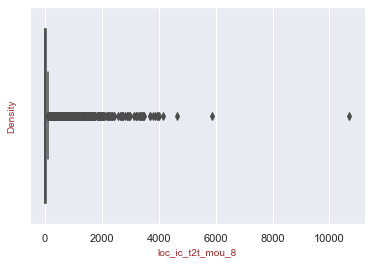

Plot 98


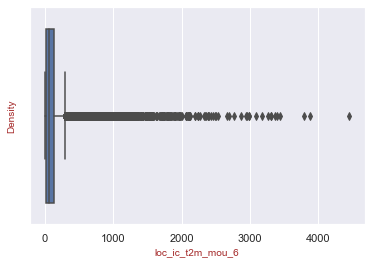

Plot 99


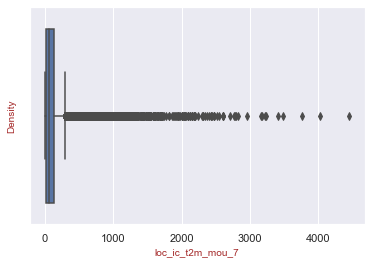

Plot 100


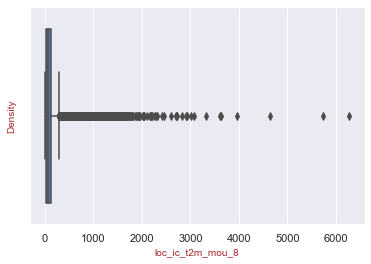

Plot 101


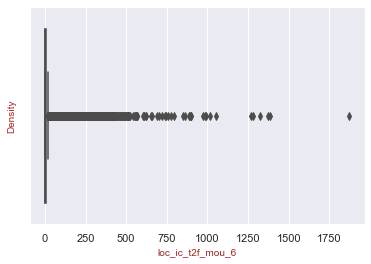

Plot 102


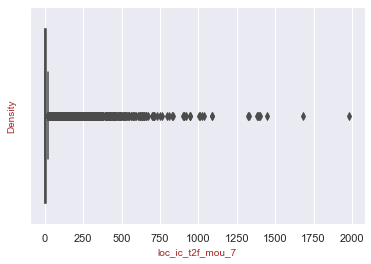

Plot 103


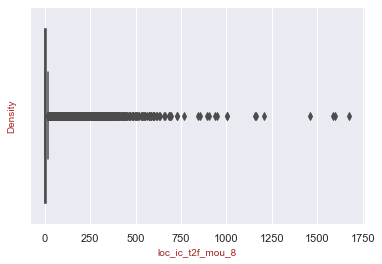

Plot 104


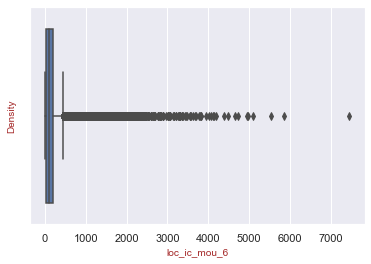

Plot 105


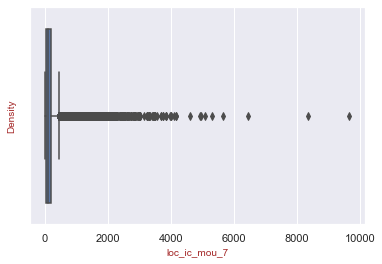

Plot 106


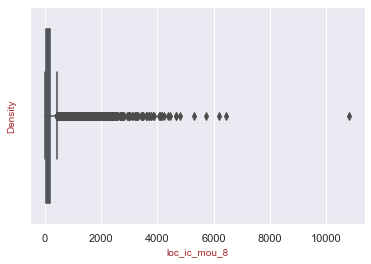

Plot 107


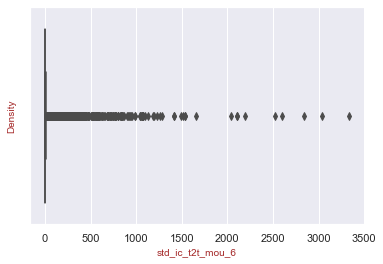

Plot 108


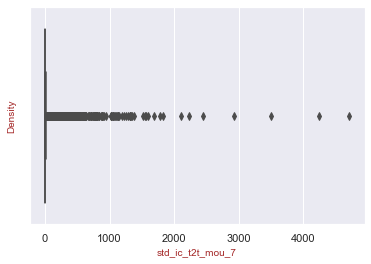

Plot 109


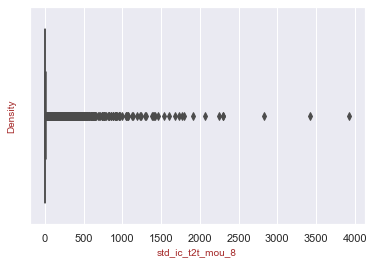

Plot 110


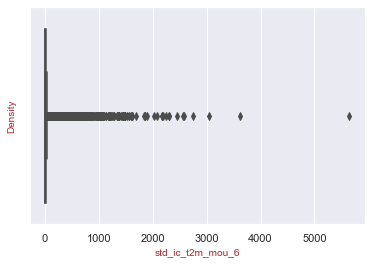

Plot 111


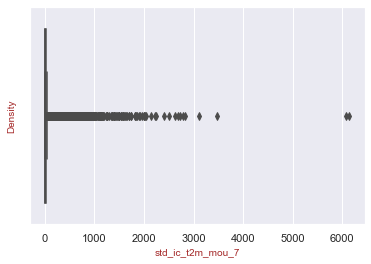

Plot 112


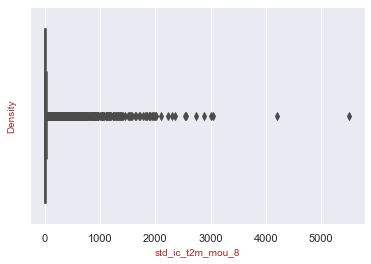

Plot 113


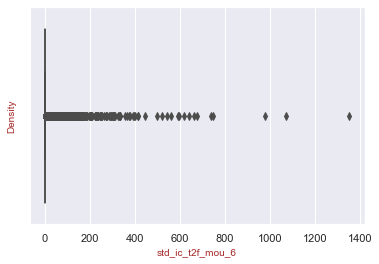

Plot 114


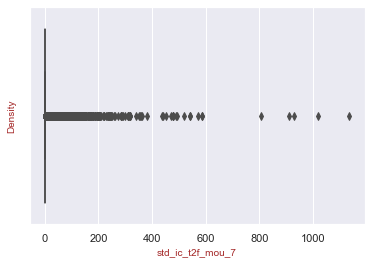

Plot 115


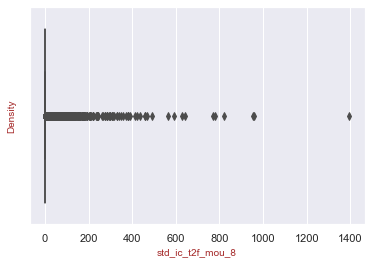

Plot 116


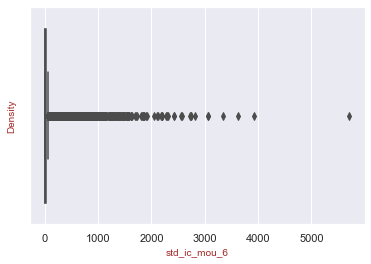

Plot 117


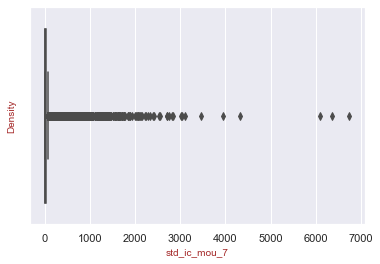

Plot 118


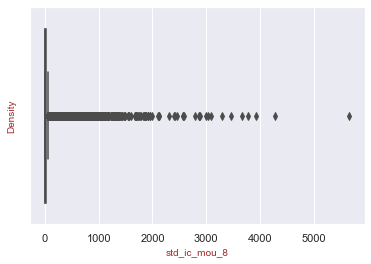

Plot 119


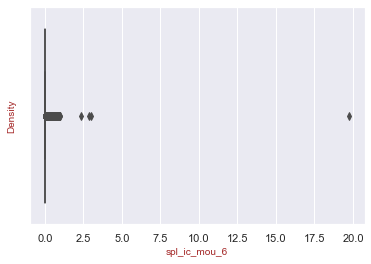

Plot 120


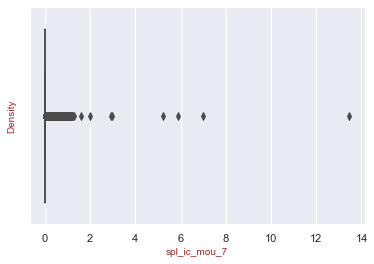

Plot 121


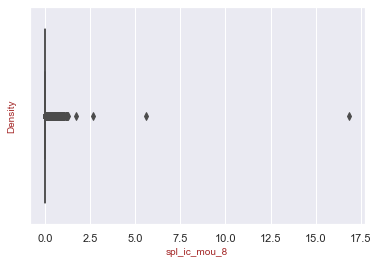

Plot 122


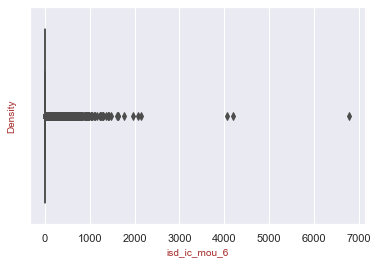

Plot 123


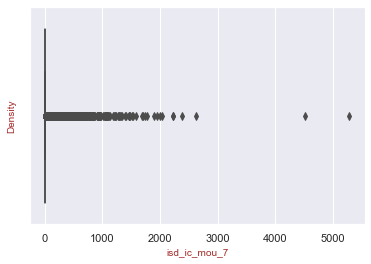

Plot 124


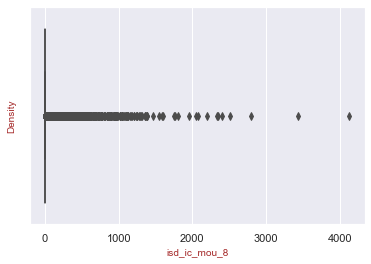

Plot 125


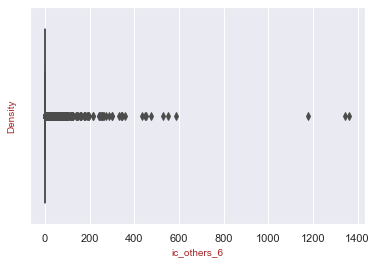

Plot 126


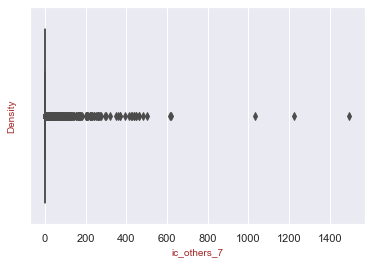

Plot 127


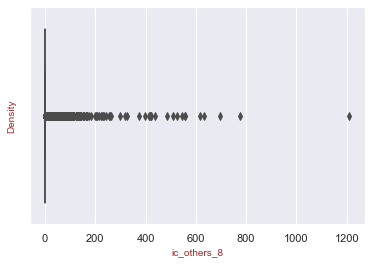

In [235]:
# Plotting box plot of numerical variables
    
n=0
for column in data_2.columns:
    n+=1
    print("Plot "+str(n))
    sns.boxplot(data_2[column])
    plt.xlabel(column, fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.ylabel("Density", fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.show()

***From the above box plots we can see that almost all the columns have outliers present in them so we will be performing soft capping of the outliers present in these columns.***

In [236]:
# Function that caps the oulier data to its upper limit and lower limit

def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [237]:
# Calling function cap_outliers 

data_1[data_2.columns] = data_1[data_2.columns].apply(cap_outliers, axis=0)

Plot 1


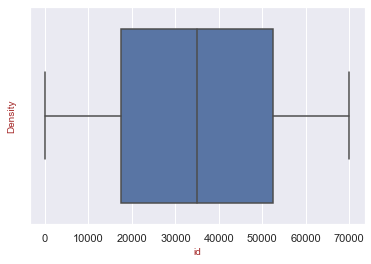

Plot 2


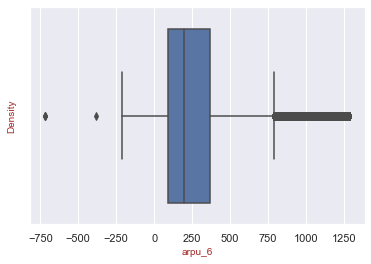

Plot 3


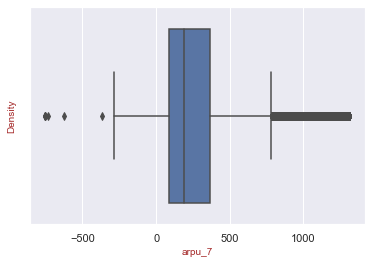

Plot 4


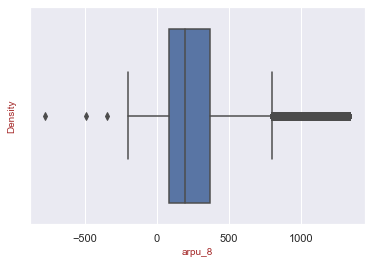

Plot 5


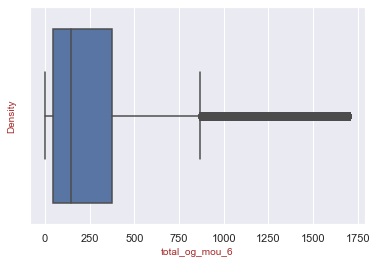

Plot 6


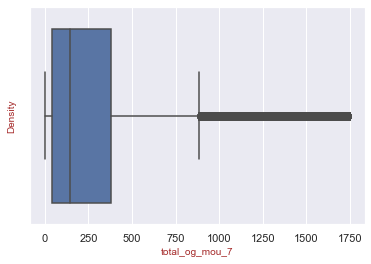

Plot 7


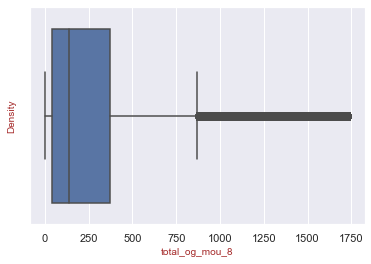

Plot 8


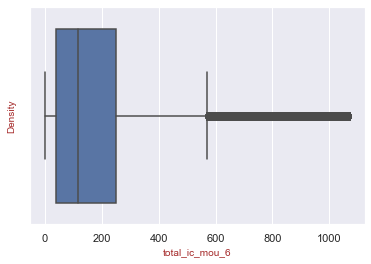

Plot 9


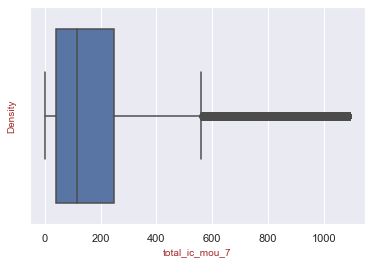

Plot 10


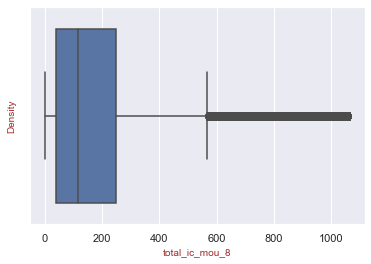

Plot 11


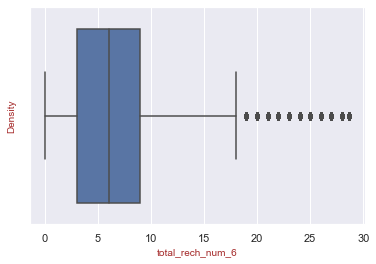

Plot 12


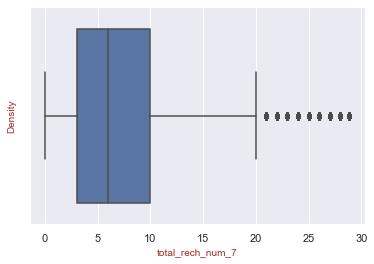

Plot 13


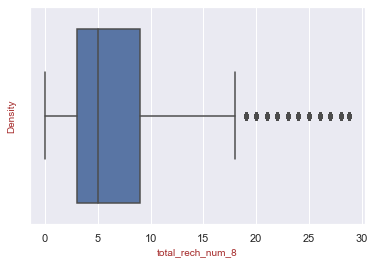

Plot 14


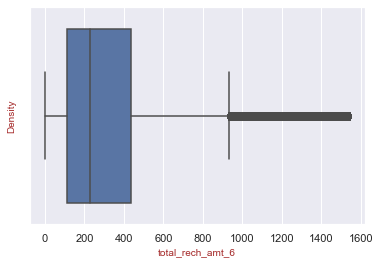

Plot 15


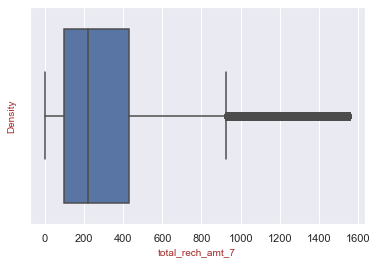

Plot 16


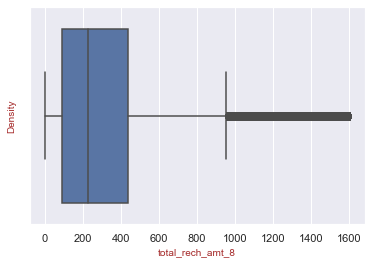

Plot 17


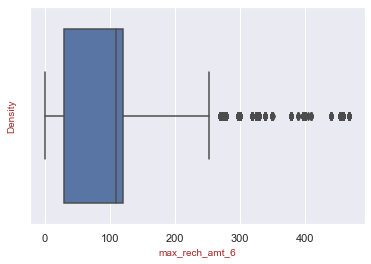

Plot 18


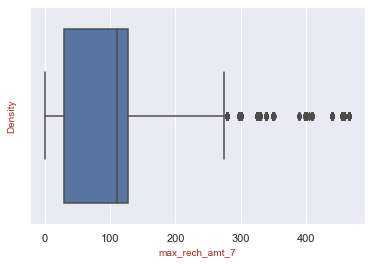

Plot 19


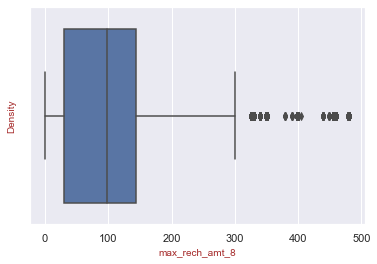

Plot 20


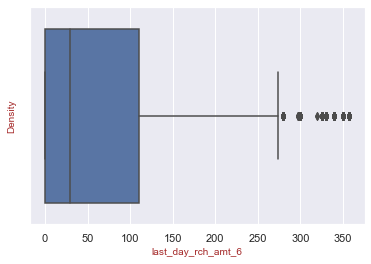

Plot 21


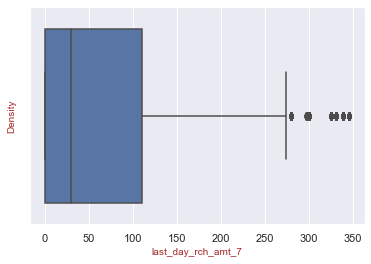

Plot 22


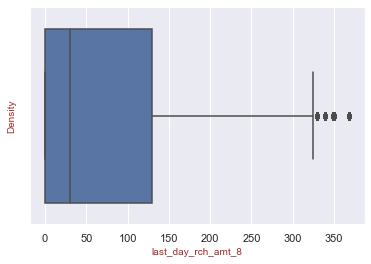

Plot 23


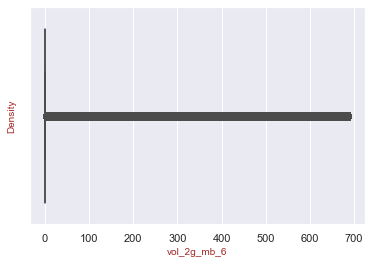

Plot 24


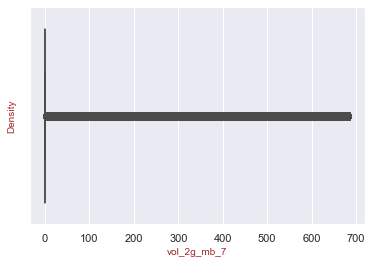

Plot 25


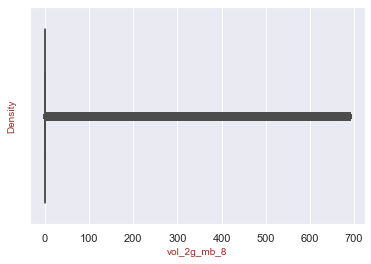

Plot 26


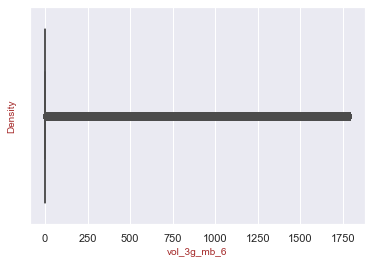

Plot 27


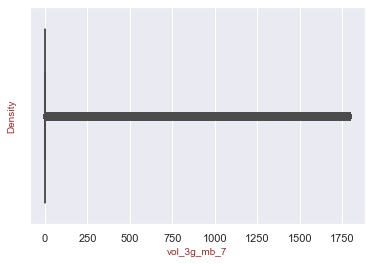

Plot 28


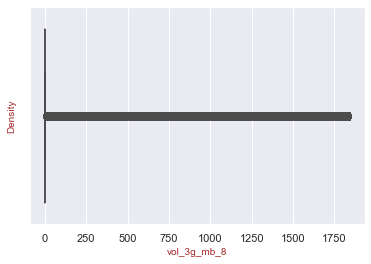

Plot 29


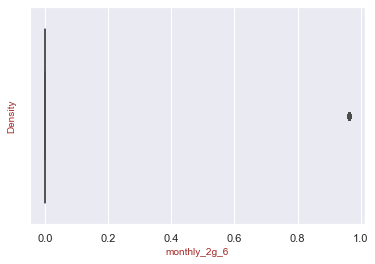

Plot 30


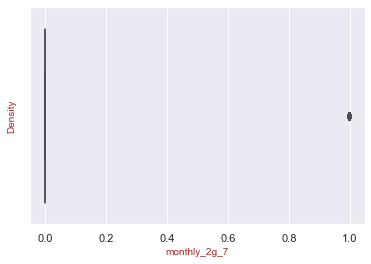

Plot 31


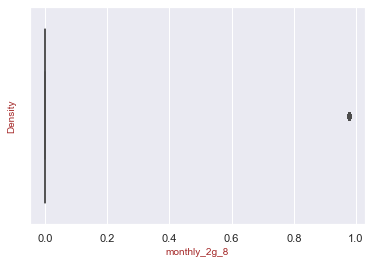

Plot 32


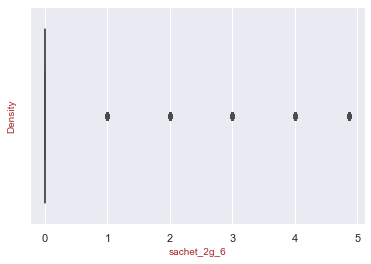

Plot 33


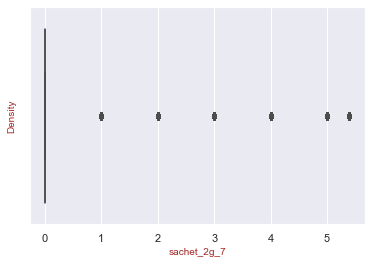

Plot 34


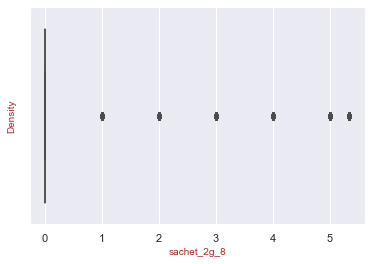

Plot 35


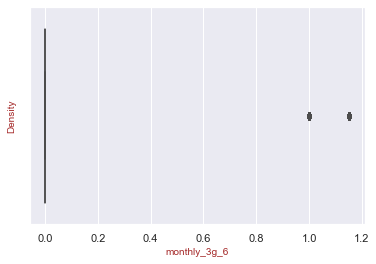

Plot 36


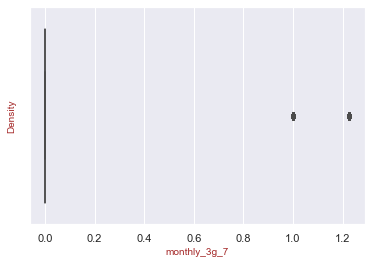

Plot 37


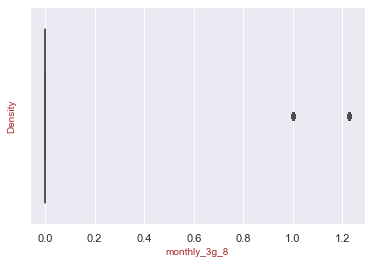

Plot 38


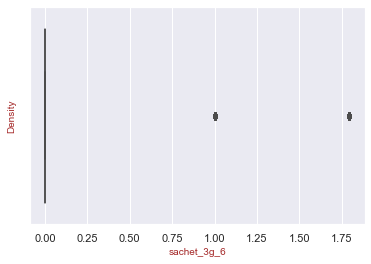

Plot 39


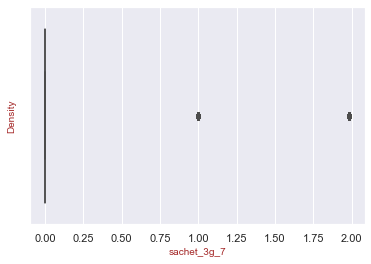

Plot 40


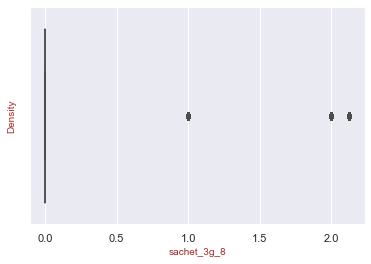

Plot 41


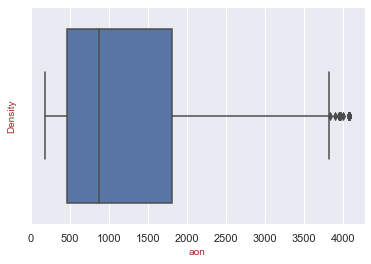

Plot 42


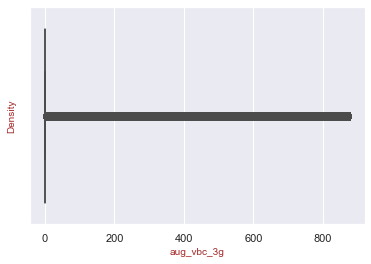

Plot 43


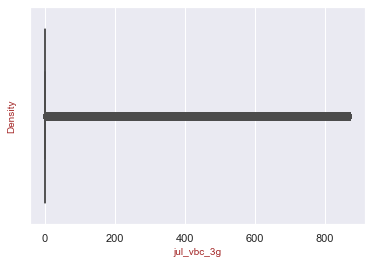

Plot 44


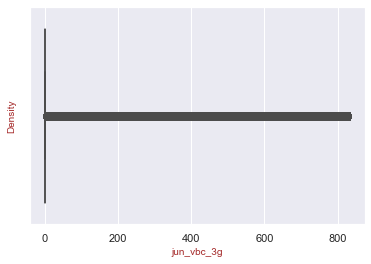

Plot 45


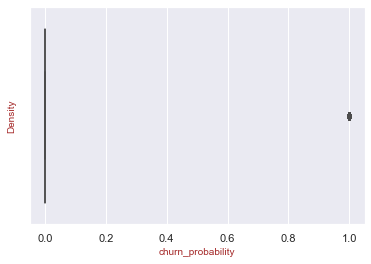

Plot 46


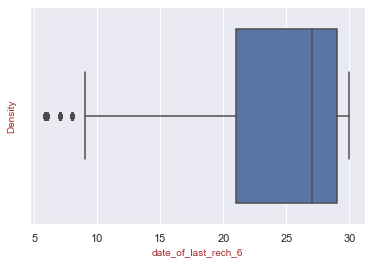

Plot 47


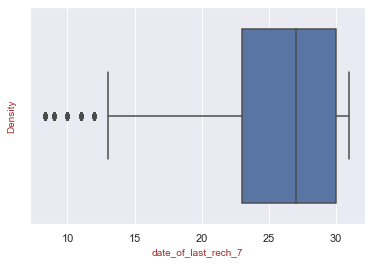

Plot 48


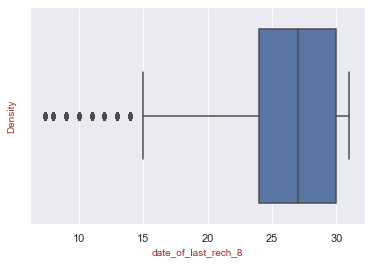

Plot 49


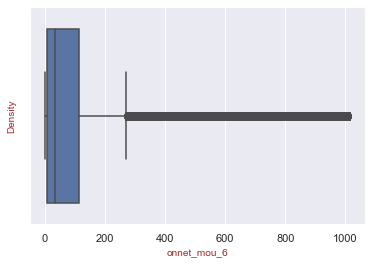

Plot 50


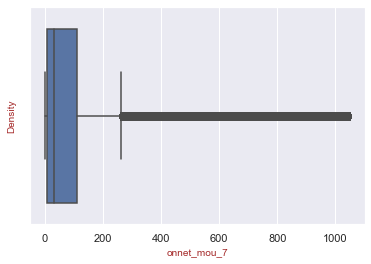

Plot 51


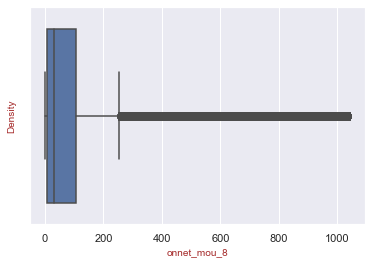

Plot 52


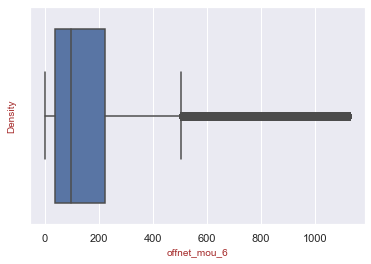

Plot 53


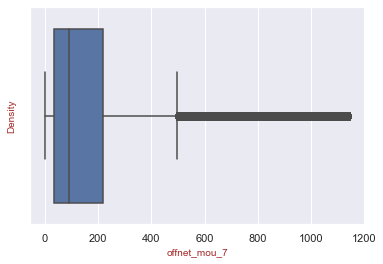

Plot 54


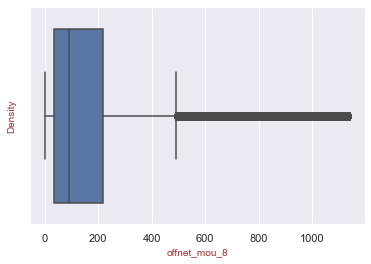

Plot 55


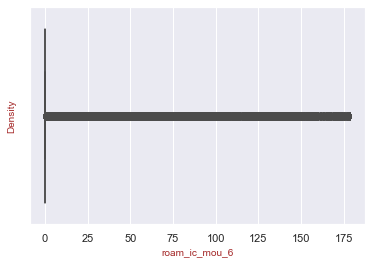

Plot 56


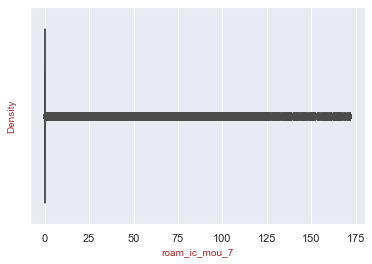

Plot 57


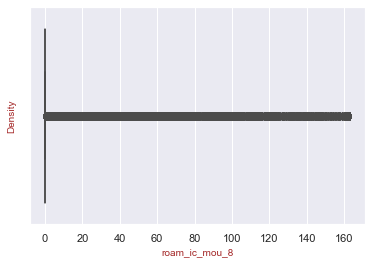

Plot 58


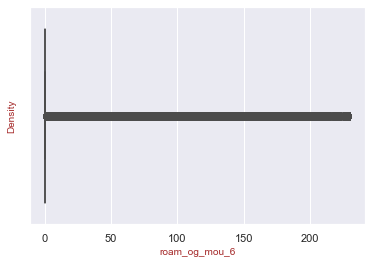

Plot 59


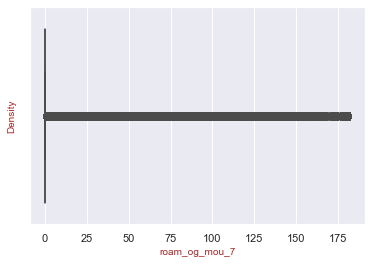

Plot 60


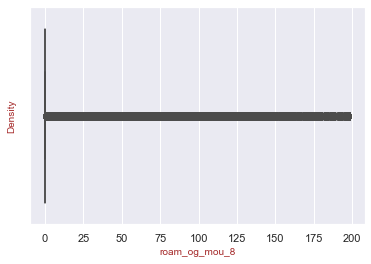

Plot 61


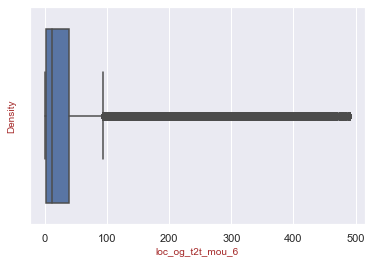

Plot 62


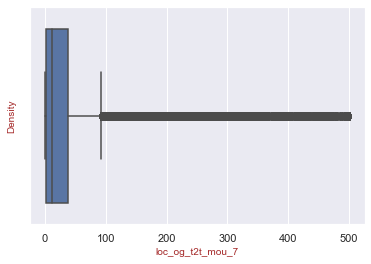

Plot 63


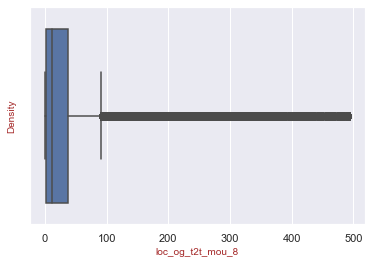

Plot 64


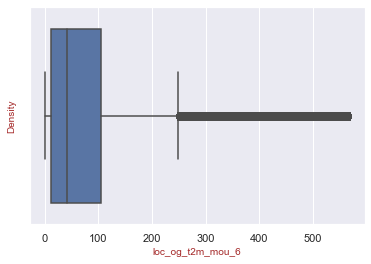

Plot 65


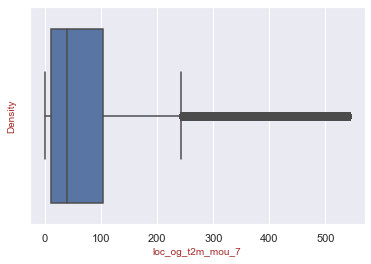

Plot 66


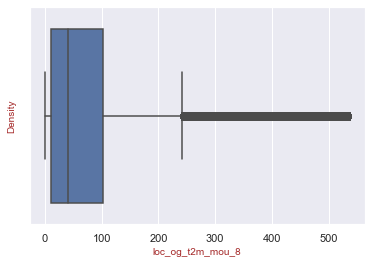

Plot 67


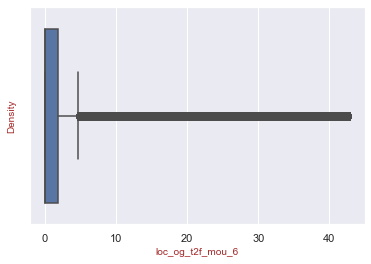

Plot 68


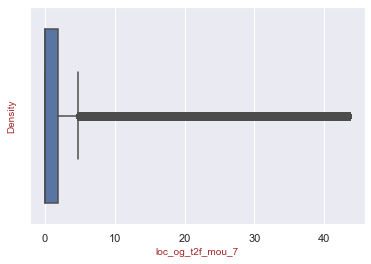

Plot 69


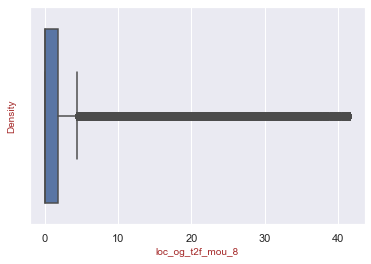

Plot 70


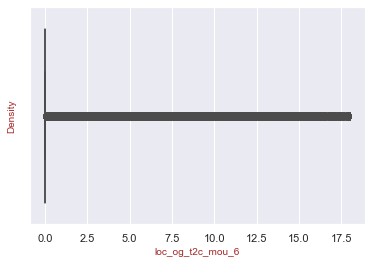

Plot 71


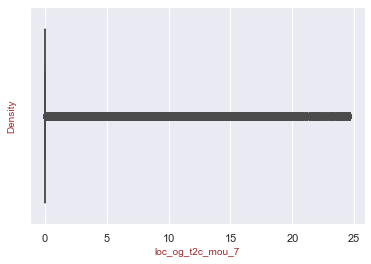

Plot 72


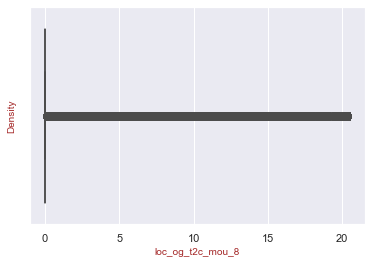

Plot 73


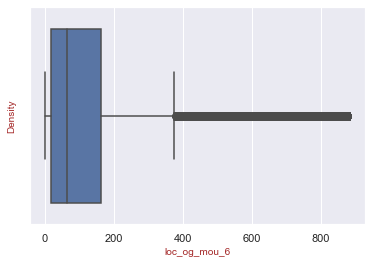

Plot 74


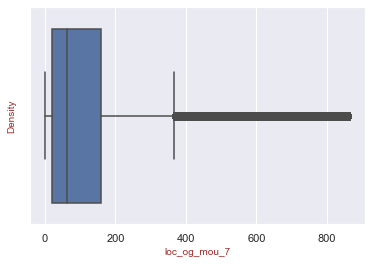

Plot 75


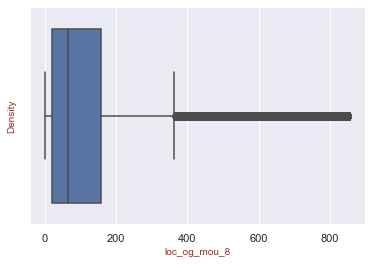

Plot 76


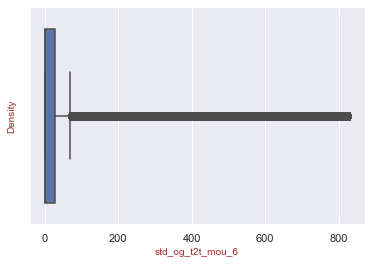

Plot 77


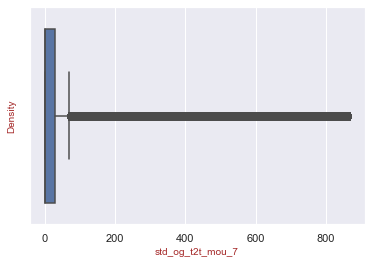

Plot 78


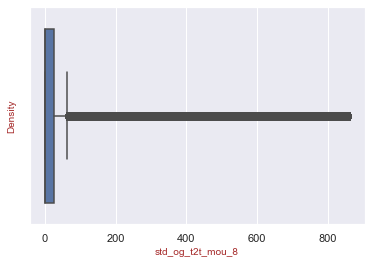

Plot 79


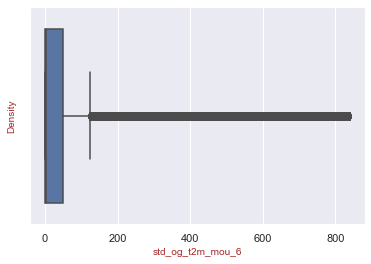

Plot 80


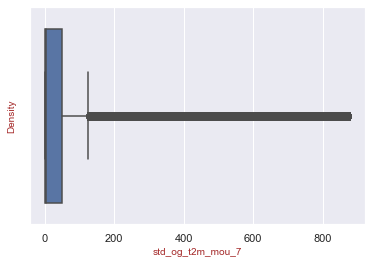

Plot 81


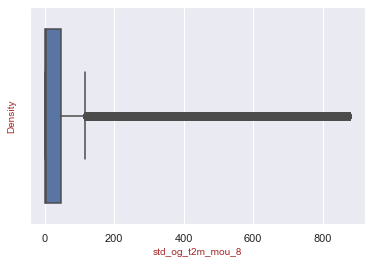

Plot 82


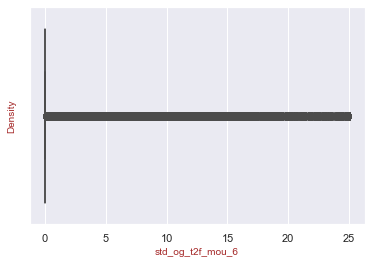

Plot 83


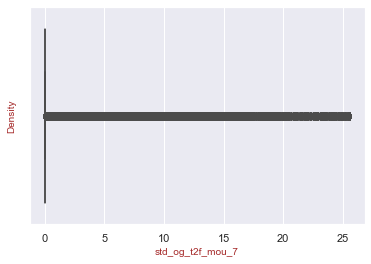

Plot 84


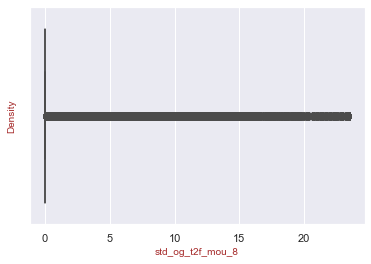

Plot 85


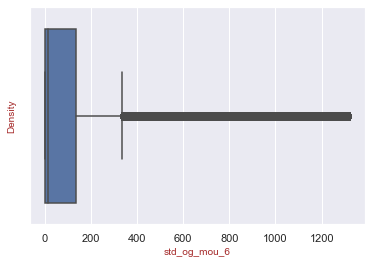

Plot 86


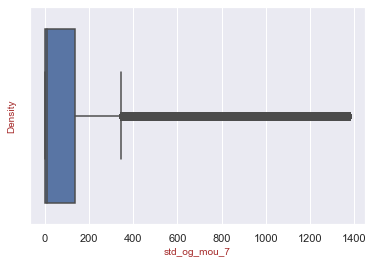

Plot 87


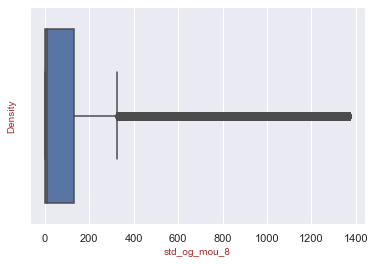

Plot 88


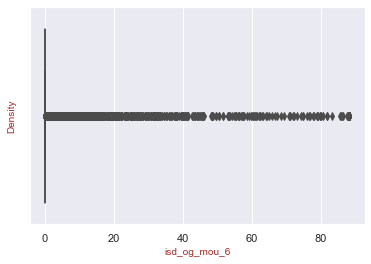

Plot 89


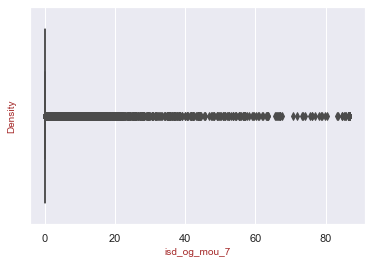

Plot 90


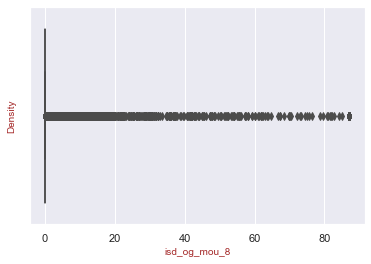

Plot 91


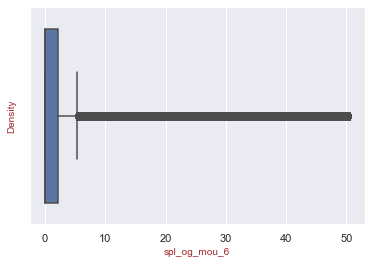

Plot 92


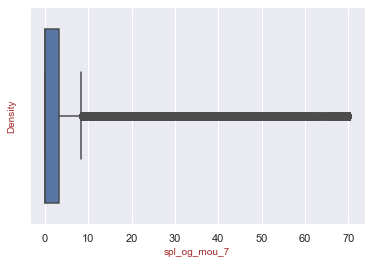

Plot 93


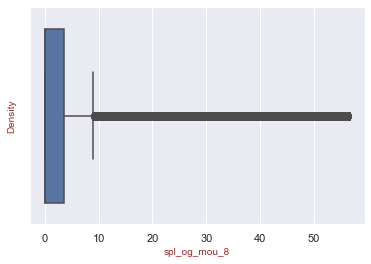

Plot 94


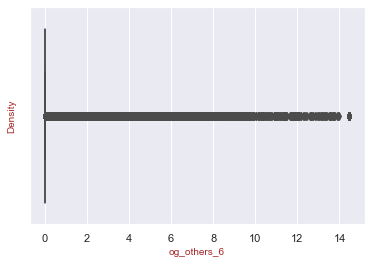

Plot 95


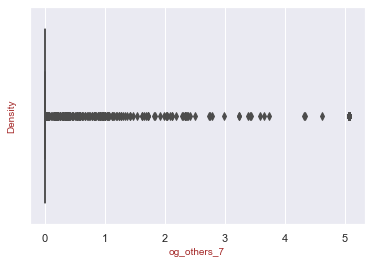

Plot 96


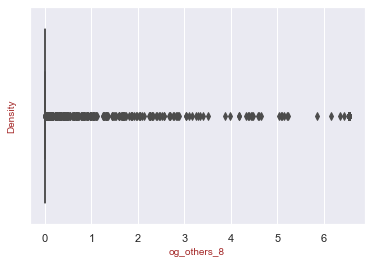

Plot 97


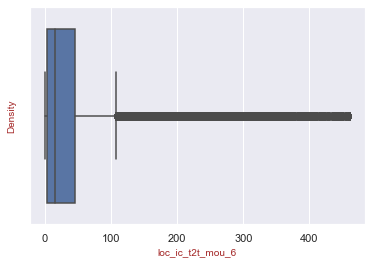

Plot 98


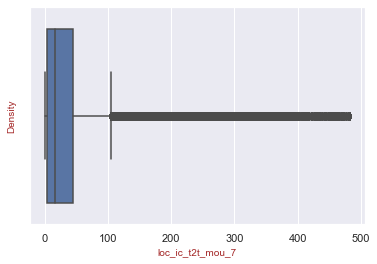

Plot 99


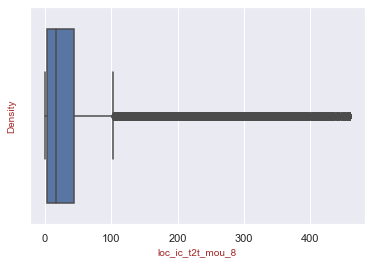

Plot 100


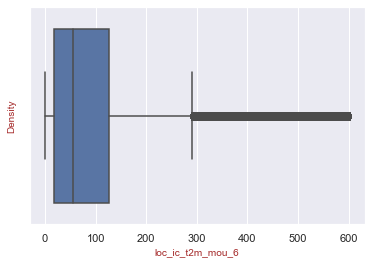

Plot 101


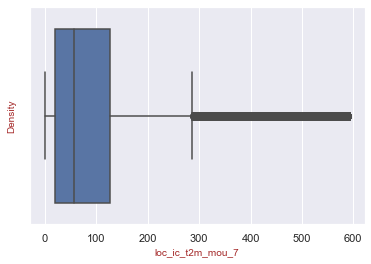

Plot 102


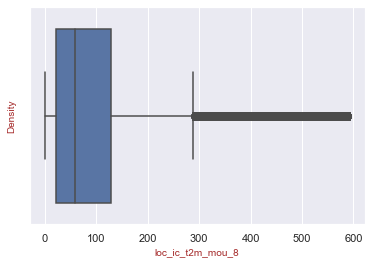

Plot 103


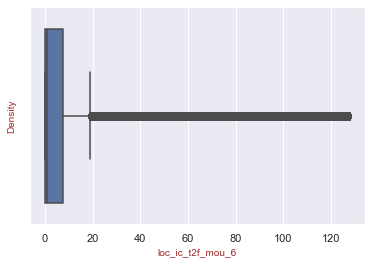

Plot 104


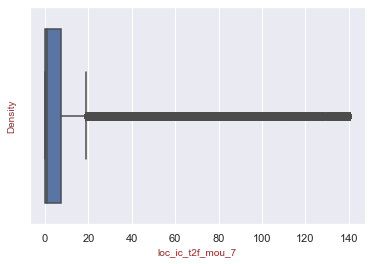

Plot 105


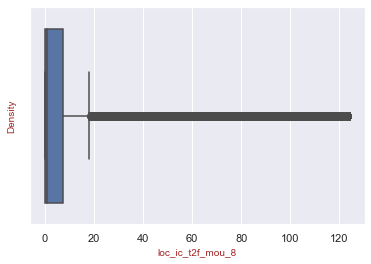

Plot 106


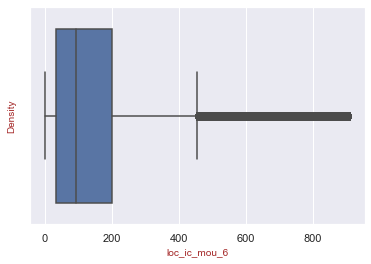

Plot 107


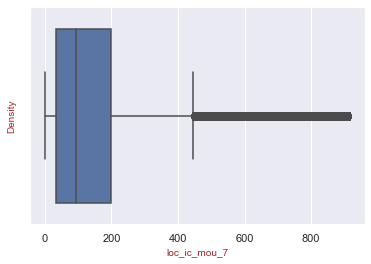

Plot 108


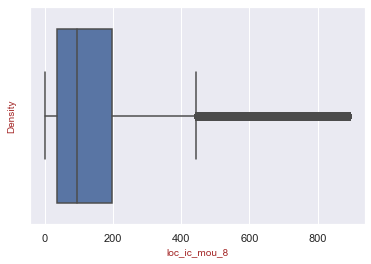

Plot 109


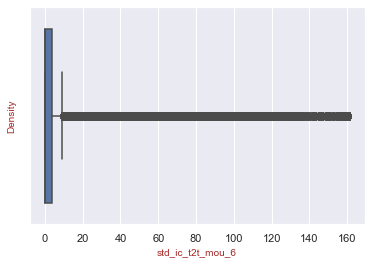

Plot 110


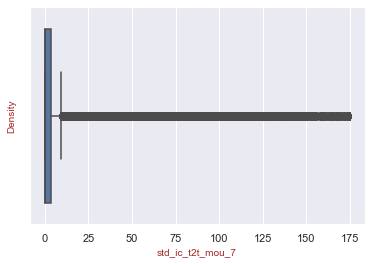

Plot 111


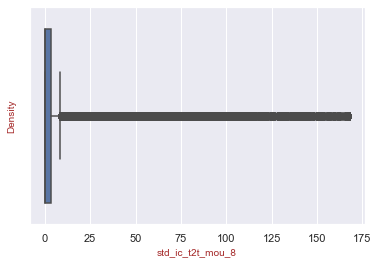

Plot 112


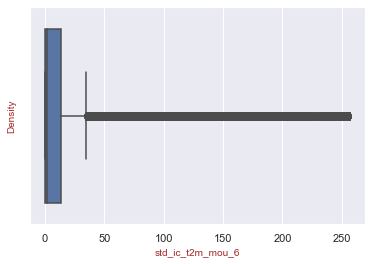

Plot 113


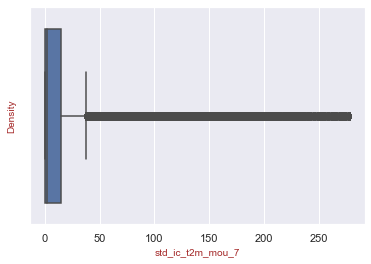

Plot 114


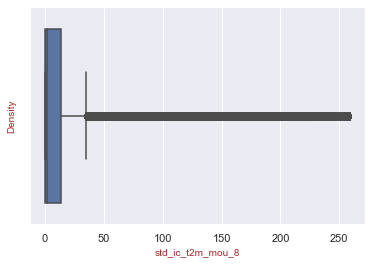

Plot 115


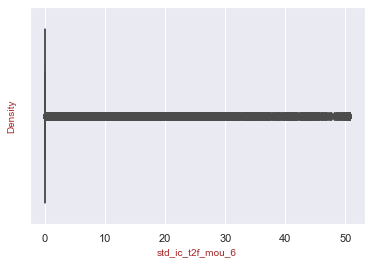

Plot 116


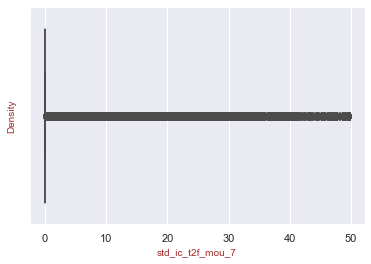

Plot 117


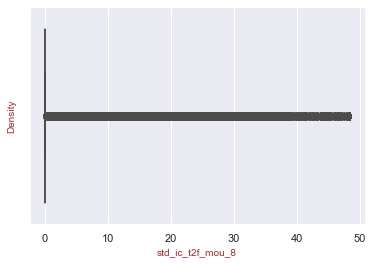

Plot 118


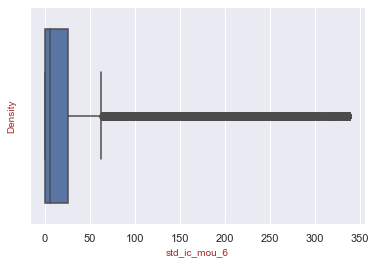

Plot 119


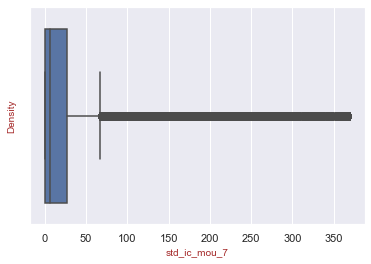

Plot 120


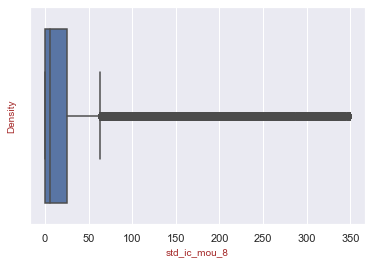

Plot 121


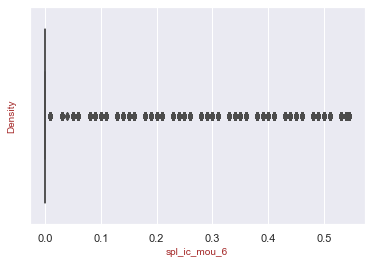

Plot 122


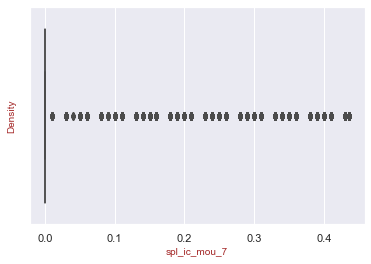

Plot 123


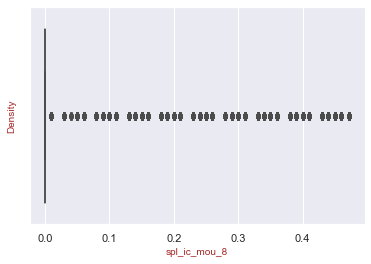

Plot 124


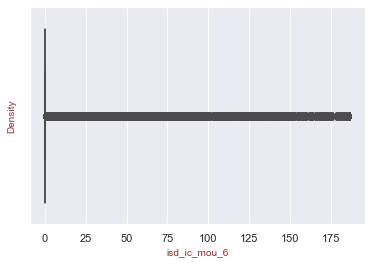

Plot 125


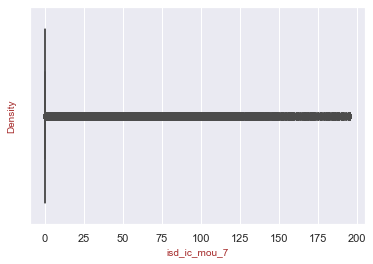

Plot 126


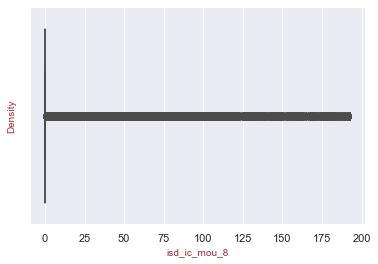

Plot 127


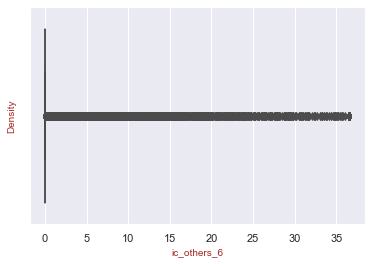

Plot 128


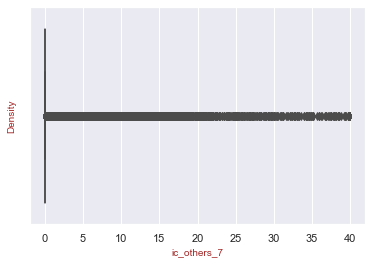

Plot 129


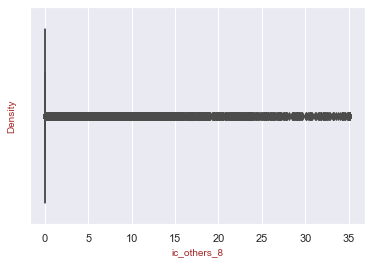

In [238]:
# Plotting box plot of numerical variables
    
n=0
for column in data_1.columns:
    n+=1
    print("Plot "+str(n))
    sns.boxplot(data_1[column])
    plt.xlabel(column, fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.ylabel("Density", fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.show()

***As we can see from above box plots the ouliers have be handled and data is ready for further visualisation.***

### Exploratory Data Analysis

#### Univariate Analysis

In [239]:
# Checking the percentage of churn_probability

data_1.churn_probability.value_counts(normalize=True)*100

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

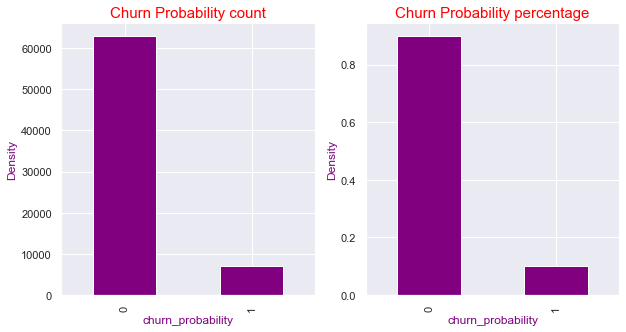

In [240]:
# Plotting a barplot of target column
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
data_1.churn_probability.value_counts().plot.bar(color="purple")
plt.title("Churn Probability count", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.xlabel("churn_probability", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
plt.ylabel("Density", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})

plt.subplot(1,2,2)
data_1.churn_probability.value_counts(normalize=True).plot.bar(color="purple")
plt.title("Churn Probability percentage", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.xlabel("churn_probability", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
plt.ylabel("Density", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})


plt.show()

***Inference: As we can see from above plot 10% of customers have churn probability.*** 

#### Bi-variate Analysis

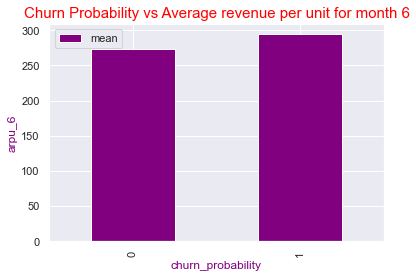

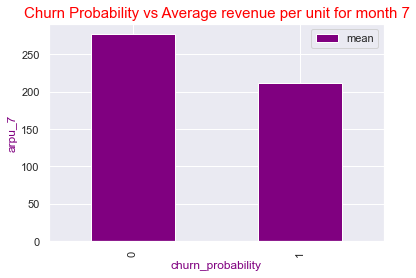

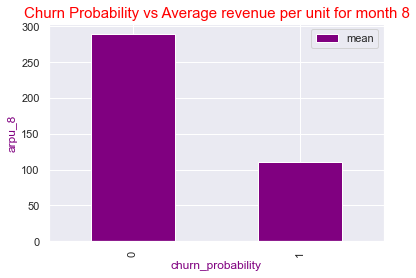

In [241]:
# Plotting Churn Probability vs average revenue for June, July and August using bar plot

arpu_all = ["arpu_6","arpu_7","arpu_8"]
n=5
for arpu in arpu_all:
    n+=1
    data_1.groupby(by="churn_probability")[arpu].aggregate(["mean"]).plot.bar(color="purple")
    plt.title("Churn Probability vs Average revenue per unit for month "+str(n), fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
    plt.xlabel("churn_probability", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
    plt.ylabel(arpu, fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
    plt.show()
    

***Inferences:***
    
* For the month of June average revenue per unit is slightly higher for churning customer than that of not churning customer. 
* For July and August the average revenue per unit is much higher for non-churning customers compared to churning customers.

From above inference we can get that during June month the customers were good with the service. Where as, during the July such customers due to some reasons tend to churn and the revenue decereases. The revenue is seen to be decereasing much more in August month for churning customers. So August is the action month in which business should be indentifying the churn customers and providing exciting offers to retain them.

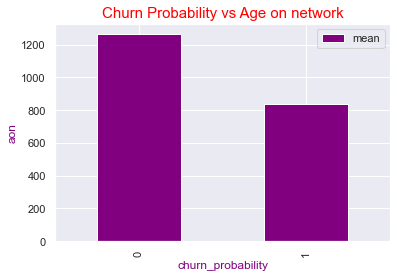

In [242]:
# Plotting Churn Probability vs Age on network of customer using bar plot

data_1.groupby(by="churn_probability")["aon"].aggregate(["mean"]).plot.bar(color="purple")
plt.title("Churn Probability vs Age on network", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.xlabel("churn_probability", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
plt.ylabel("aon", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
plt.show()

***Inference:***
    
From above bar plot we can see that customer who spent more time on a network are less likely to churn. So, customers with long age of network should be identified and taken care before they churn.

#### Multi-variate Analysis

In [243]:
# Splitting churn and non-churn customers

data_churn = data_1[data_1["churn_probability"] == 1]
data_no_churn = data_1[data_1["churn_probability"] == 0]

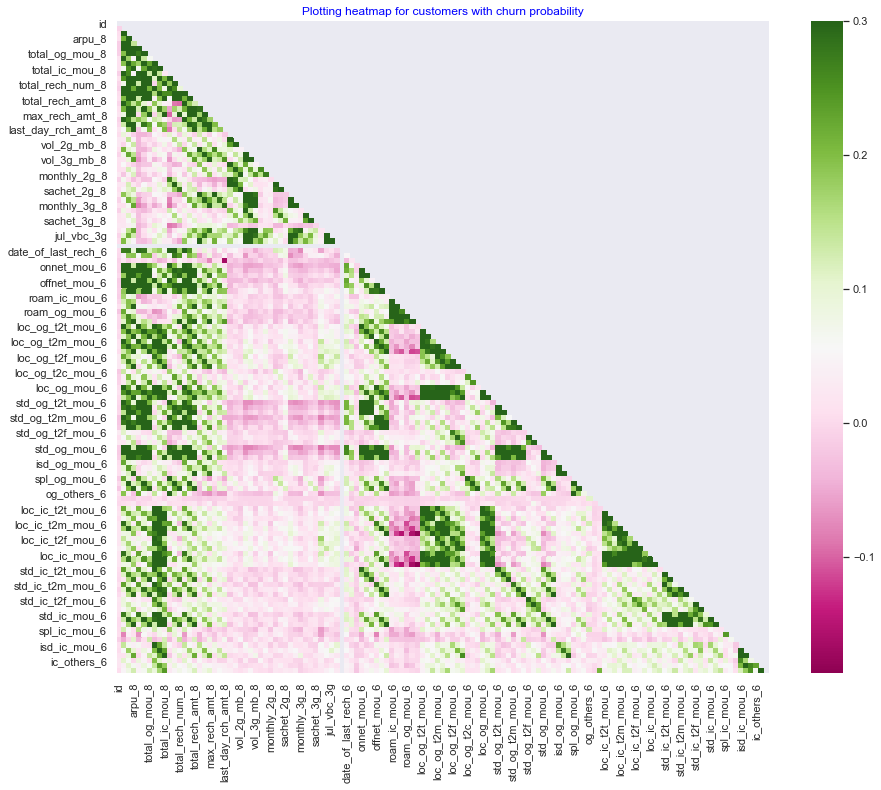

In [244]:
# Heatmap for all the numerical columns for customers with churn probability

corr = data_churn.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,12))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="PiYG")
    plt.title('Plotting heatmap for customers with churn probability', fontdict={"fontsize":12, "fontweight":5, "color":"blue"})
    

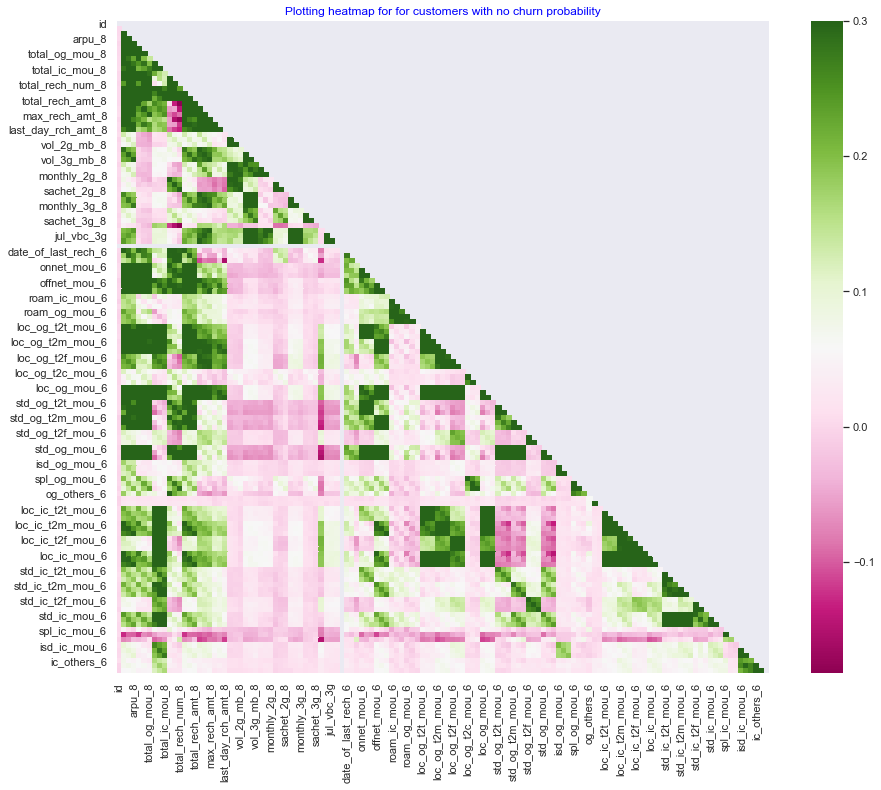

In [245]:
# Heatmap for all the numerical columns for customers with no churn probability

corr = data_no_churn.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,12))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="PiYG")
    plt.title('Plotting heatmap for for customers with no churn probability', fontdict={"fontsize":12, "fontweight":5, "color":"blue"})
    

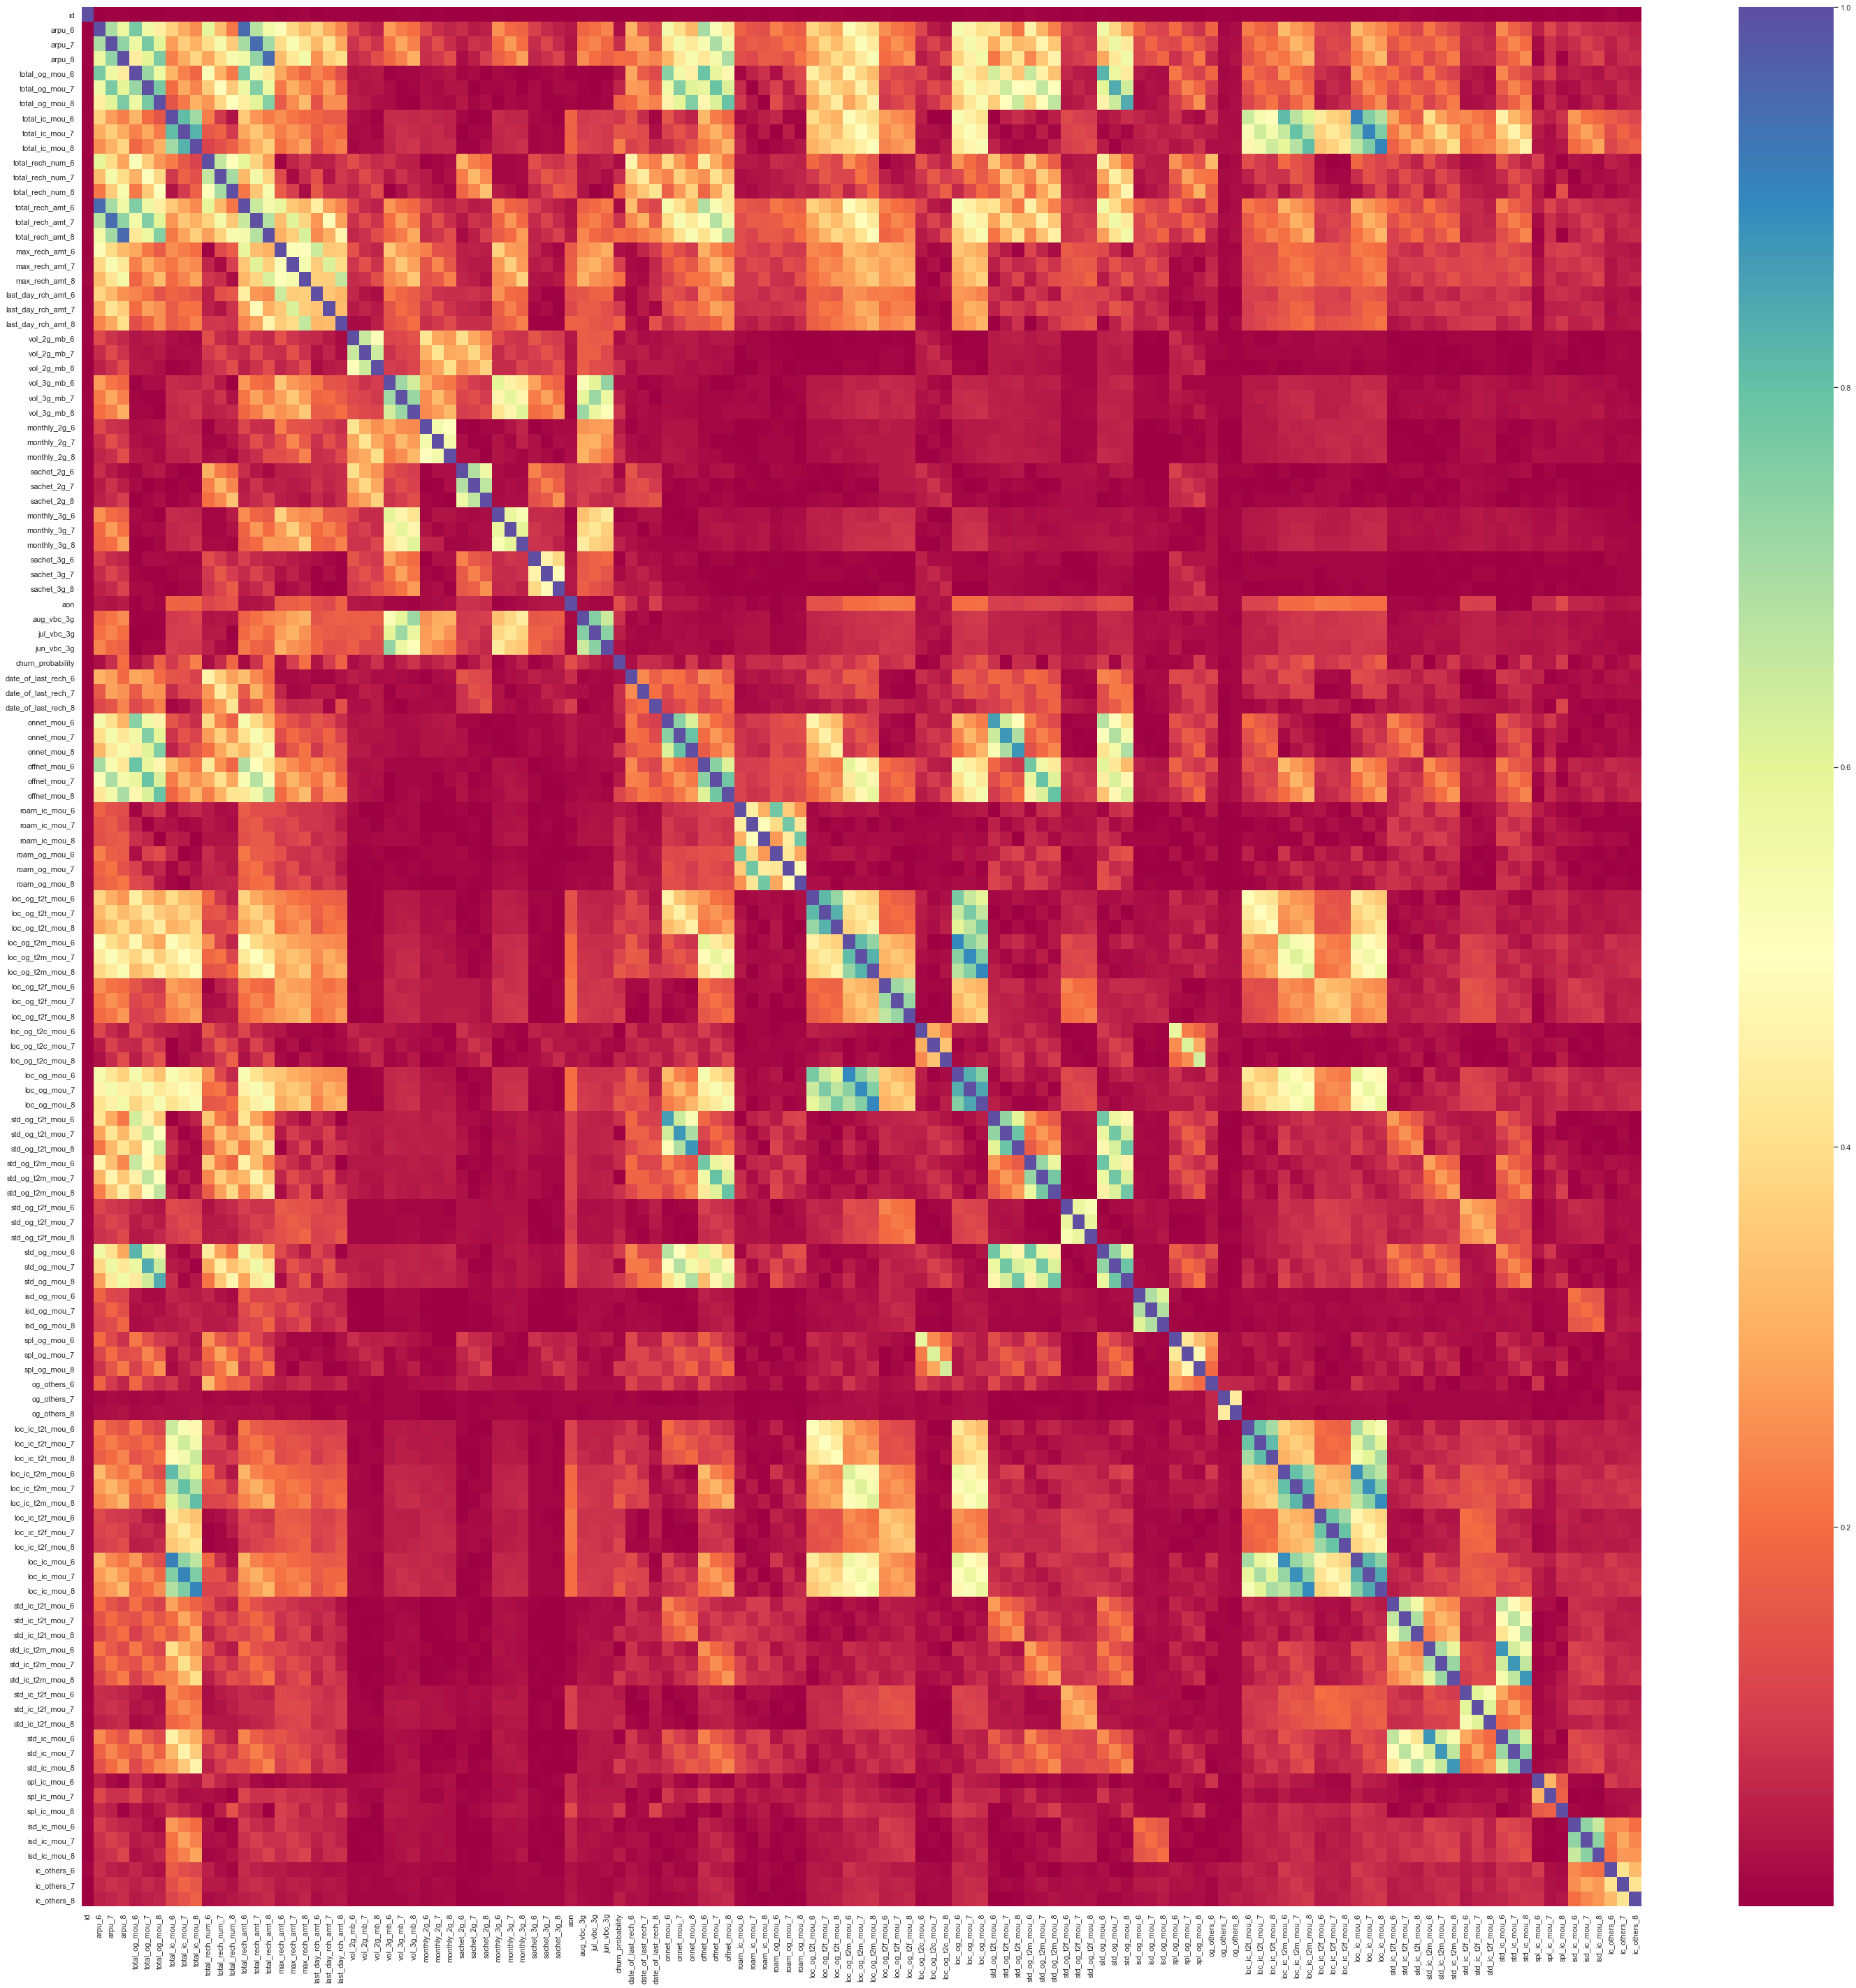

In [246]:
# Heatmap of correlation matrix
corr_mat = data_1.corr().abs()
plt.figure(figsize = (50, 50))
sns.set(font_scale=1)
sns.heatmap(corr_mat, annot = False, linecolor='black', cmap='Spectral')
plt.show()

***As we can see that there is collinearity among independent variables we need to drop the ones with high collinearity.***

In [247]:
# Selecting upper triangle of correlation matrix

highCorrCol = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
highCorrCol

id    arpu_6    arpu_7    arpu_8  total_og_mou_6  \
id             NaN  0.001989  0.004308  0.005031        0.002553   
arpu_6         NaN       NaN  0.701985  0.575328        0.771222   
arpu_7         NaN       NaN       NaN  0.737317        0.573254   
arpu_8         NaN       NaN       NaN       NaN        0.443164   
total_og_mou_6 NaN       NaN       NaN       NaN             NaN   
...             ..       ...       ...       ...             ...   
isd_ic_mou_7   NaN       NaN       NaN       NaN             NaN   
isd_ic_mou_8   NaN       NaN       NaN       NaN             NaN   
ic_others_6    NaN       NaN       NaN       NaN             NaN   
ic_others_7    NaN       NaN       NaN       NaN             NaN   
ic_others_8    NaN       NaN       NaN       NaN             NaN   

                total_og_mou_7  total_og_mou_8  total_ic_mou_6  \
id                    0.001389        0.001732        0.006121   
arpu_6                0.565447        0.447135        0.371514   
arpu_7                0.770916        0.603275        0.276330   
arpu_8                0.599324        0.768056        0.229345   
total_og_mou_6        0.724844        0.571329        0.313221   
...                        ...             ...             ...   
isd_ic_mou_7               NaN             NaN             NaN   
isd_ic_mou_8               NaN             NaN             NaN   
ic_others_6                NaN             NaN             NaN   
ic_others_7                NaN             NaN             NaN   
ic_others_8                NaN             NaN             NaN   

                total_ic_mou_7  total_ic_mou_8  total_rech_num_6  \
id                    0.006392        0.006744          0.000783   
arpu_6                0.297743        0.252808          0.591253   
arpu_7                0.364894        0.312148          0.397279   
arpu_8                0.297986        0.381135          0.288283   
total_og_mou_6        0.231752        0.184464          0.521952   
...                        ...             ...               ...   
isd_ic_mou_7               NaN             NaN               NaN   
isd_ic_mou_8               NaN             NaN               NaN   
ic_others_6                NaN             NaN               NaN   
ic_others_7                NaN             NaN               NaN   
ic_others_8                NaN             NaN               NaN   

                total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
id                      0.003430          0.000004          0.000829   
arpu_6                  0.333539          0.217373          0.949305   
arpu_7                  0.549469          0.363197          0.703281   
arpu_8                  0.397620          0.536819          0.566187   
total_og_mou_6          0.311841          0.218780          0.758088   
...                          ...               ...               ...   
isd_ic_mou_7                 NaN               NaN               NaN   
isd_ic_mou_8                 NaN               NaN               NaN   
ic_others_6                  NaN               NaN               NaN   
ic_others_7                  NaN               NaN               NaN   
ic_others_8                  NaN               NaN               NaN   

                total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
id                      0.004100          0.004354        0.003386   
arpu_6                  0.679516          0.553171        0.516803   
arpu_7                  0.948363          0.713725        0.392342   
arpu_8                  0.736632          0.950065        0.327036   
total_og_mou_6          0.553170          0.427303        0.290152   
...                          ...               ...             ...   
isd_ic_mou_7                 NaN               NaN             NaN   
isd_ic_mou_8                 NaN               NaN             NaN   
ic_others_6                  NaN               NaN             NaN   
ic_others_7             

In [248]:
# Finding index of feature columns with correlation greater than 0.7

drophighCorrCol = [column for column in highCorrCol.columns if any(highCorrCol[column] > 0.7)]
drophighCorrCol

['arpu_7',
 'arpu_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2m_mou_

In [249]:
# Droping the high correlated features 

data_df = data_1.drop(drophighCorrCol, axis=1)
data_df.head()

id   arpu_6  total_ic_mou_6  total_rech_num_6  total_rech_num_7  \
0   0   31.277           11.84               3.0               2.0   
1   1    0.000            3.44               3.0               4.0   
2   2   60.806          124.29               2.0               4.0   
3   3  156.362           95.11               2.0               4.0   
4   4  240.708           21.54              13.0              10.0   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  \
0            65.0            65.0            10.0                65.0   
1             0.0           145.0            50.0                 0.0   
2            70.0            70.0             0.0                70.0   
3           110.0           110.0            50.0               110.0   
4            50.0            41.0            30.0                25.0   

   last_day_rch_amt_7  last_day_rch_amt_8  vol_2g_mb_6  vol_2g_mb_7  \
0                65.0                 0.0          0.0         0.00   
1                 0.0                 0.0          0.0       352.91   
2                50.0                 0.0          0.0         0.00   
3               110.0                50.0          0.0         0.00   
4                10.0                30.0        390.8       308.89   

   vol_2g_mb_8  vol_3g_mb_6  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
0         0.00          0.0           0.0           0.0           0.0   
1         0.00          0.0           0.0           0.0           0.0   
2         0.00          0.0           0.0           0.0           0.0   
3         0.00          0.0           0.0           0.0           0.0   
4       213.47          0.0           0.0           0.0           0.0   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
0     0.000000     0.000000     0.000000           0.0           0.0   
1     0.000000     0.000000     0.000000           0.0           1.0   
2     0.000000     0.000000     0.000000           0.0           0.0   
3     0.000000     0.000000     0.000000           0.0           0.0   
4     4.871481     5.394443     5.346842           0.0           0.0   

   monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8     aon  \
0           0.0          0.0          0.0          0.0  1958.0   
1           0.0          0.0          0.0          0.0   710.0   
2           0.0          0.0          0.0          0.0   882.0   
3           0.0          0.0          0.0          0.0   982.0   
4           0.0          0.0          1.0          0.0   647.0   

   churn_probability  date_of_last_rech_6  date_of_last_rech_7  \
0                  0                 22.0                 10.0   
1                  0                 12.0                 10.0   
2                  0                 11.0                 22.0   
3                  0                 15.0                 21.0   
4                  0                 25.0                 26.0   

   date_of_last_rech_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0                 24.0           0.00            0.0            0.0   
1                 26.0           0.00            0.0            0.0   
2                 24.0           0.00            0.0            0.0   
3                 25.0           0.00            0.0            0.0   
4                 30.0          53.64            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0              2.23              5.29              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.53             24.11              0.00              2.14   
3              6.99             37.91              0.00              0.00   
4             10.16             36.74             11.99              0.00   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0              0.00          0.000000              0.00               0.0   
1     

In [250]:
data_df.shape

(69999, 70)

### Train Test split

***Now the dataset is clean and we will be proceeding for train test split before Model creation.***

In [251]:
# Putting feature variable to X
X = data_df.drop(["id","churn_probability"],axis=1)

# Putting response variable to y
y = data_df["churn_probability"]

In [252]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [253]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Scaling

***Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables using StandardScaler.***

In [254]:
# Scaling the data using StandardScaler

scaler = StandardScaler()

# Fit and transform on train data
X_train = scaler.fit_transform(X_train)

# Transform on test data
X_test = scaler.transform(X_test)

In [255]:
# Converting the array to dataframe and describing

X_train = pd.DataFrame(X_train)
X_train.columns = X.columns
X_train.describe()

arpu_6  total_ic_mou_6  total_rech_num_6  total_rech_num_7  \
count  4.899900e+04    4.899900e+04      4.899900e+04      4.899900e+04   
mean  -2.918587e-16    1.793930e-16     -5.120725e-19     -4.527106e-16   
std    1.000010e+00    1.000010e+00      1.000010e+00      1.000010e+00   
min   -3.785893e+00   -8.458284e-01     -1.231855e+00     -1.252031e+00   
25%   -6.915518e-01   -6.750763e-01     -7.297537e-01     -5.846483e-01   
50%   -2.960613e-01   -3.335721e-01     -2.276525e-01     -2.509569e-01   
75%    3.672066e-01    2.758595e-01      2.744486e-01      4.164260e-01   
max    3.851168e+00    3.954859e+00      3.570053e+00      3.562888e+00   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  \
count    4.899900e+04    4.899900e+04    4.899900e+04        4.899900e+04   
mean    -1.500273e-15    4.632942e-16   -1.988020e-16       -4.482311e-16   
std      1.000010e+00    1.000010e+00    1.000010e+00        1.000010e+00   
min     -1.101727e+00   -1.086088e+00   -1.074036e+00       -8.337761e-01   
25%     -7.718653e-01   -7.591268e-01   -7.618092e-01       -8.337761e-01   
50%      1.077655e-01    1.127698e-01   -5.409576e-02       -4.174858e-01   
75%      2.177193e-01    3.089465e-01    4.246516e-01        6.926217e-01   
max      4.052825e+00    3.997998e+00    3.929193e+00        4.124125e+00   

       last_day_rch_amt_7  last_day_rch_amt_8   vol_2g_mb_6   vol_2g_mb_7  \
count        4.899900e+04        4.899900e+04  4.899900e+04  4.899900e+04   
mean         2.753953e-16        1.687610e-15 -3.349317e-15 -1.413710e-15   
std          1.000010e+00        1.000010e+00  1.000010e+00  1.000010e+00   
min         -7.804295e-01       -7.649720e-01 -3.164365e-01 -3.132630e-01   
25%         -7.804295e-01       -7.649720e-01 -3.164365e-01 -3.132630e-01   
50%         -3.627381e-01       -3.760566e-01 -3.164365e-01 -3.132630e-01   
75%          7.511057e-01        9.203280e-01 -3.164365e-01 -3.132630e-01   
max          4.031135e+00        4.011941e+00  4.885454e+00  4.971552e+00   

        vol_2g_mb_8   vol_3g_mb_6  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
count  4.899900e+04  4.899900e+04  4.899900e+04  4.899900e+04  4.899900e+04   
mean   1.602470e-15  2.323070e-15 -1.087912e-15  8.189897e-16  3.405216e-15   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -3.094616e-01 -3.081568e-01 -2.774385e-01 -2.842896e-01 -2.798202e-01   
25%   -3.094616e-01 -3.081568e-01 -2.774385e-01 -2.842896e-01 -2.798202e-01   
50%   -3.094616e-01 -3.081568e-01 -2.774385e-01 -2.842896e-01 -2.798202e-01   
75%   -3.094616e-01 -3.081568e-01 -2.774385e-01 -2.842896e-01 -2.798202e-01   
max    5.040944e+00  5.263763e+00  3.604403e+00  3.517540e+00  3.573724e+00   

        sachet_2g_6   sachet_2g_7   sachet_2g_8  monthly_3g_6  monthly_3g_7  \
count  4.899900e+04  4.899900e+04  4.899900e+04  4.899900e+04  4.899900e+04   
mean   5.729865e-16  8.612130e-16 -2.334597e-16  6.051751e-16  1.423060e-15   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -3.207574e-01 -3.240575e-01 -3.313559e-01 -2.463111e-01 -2.422809e-01   
25%   -3.207574e-01 -3.240575e-01 -3.313559e-01 -2.463111e-01 -2.422809e-01   
50%   -3.207574e-01 -3.240575e-01 -3.313559e-01 -2.463111e-01 -2.422809e-01   
75%   -3.207574e-01 -3.240575e-01 -3.313559e-01 -2.463111e-01 -2.422809e-01   
max    4.667010e+00  4.564029e+00  4.480139e+00  4.541736e+00  4.796003e+00   

       monthly_3g_8   sachet_3g_6   sachet_3g_7   sachet_3g_8           aon  \
count  4.899900e+04  4.899900e+04  4.899900e+04  4.899900e+04  4.899900e+04   
mean  -4.103686e-15  5.863797e-17  1.425800e-15 -9.869098e-16 -7.143638e-17   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -2.515504e-01 -1.989572e-01 -1.957425e-01 -1.961576e-01 -1.092756e+00   
25%   -2.515504e-01 -1.989572e-01 -1.957425e-01 -1.961576e-01 -7.903202e-01   
50%   -2.515504e-01 -1.989572e-01 -1.957425e-01 -1.

In [256]:
# Converting the array to dataframe and describing

X_test = pd.DataFrame(X_test)
X_test.columns = X.columns
X_test.describe()

arpu_6  total_ic_mou_6  total_rech_num_6  total_rech_num_7  \
count  21000.000000    21000.000000      21000.000000      21000.000000   
mean       0.011964        0.008331          0.000780         -0.001637   
std        1.008742        1.000421          1.001555          1.006685   
min       -3.785893       -0.845828         -1.231855         -1.252031   
25%       -0.682898       -0.666866         -0.729754         -0.751494   
50%       -0.286611       -0.325855         -0.227653         -0.250957   
75%        0.364876        0.287704          0.274449          0.416426   
max        3.851168        3.954859          3.570053          3.562888   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  \
count    21000.000000    21000.000000    21000.000000        21000.000000   
mean         0.001206        0.000945        0.004325           -0.001419   
std          0.982477        0.991392        0.991436            0.988830   
min         -1.101727       -1.086088       -1.074036           -0.833776   
25%         -0.771865       -0.759127       -0.761809           -0.833776   
50%          0.107765        0.112770       -0.054096           -0.417486   
75%          0.217719        0.308947        0.424652            0.692622   
max          4.052825        3.997998        3.929193            4.124125   

       last_day_rch_amt_7  last_day_rch_amt_8   vol_2g_mb_6   vol_2g_mb_7  \
count        21000.000000        21000.000000  21000.000000  21000.000000   
mean            -0.002916            0.005664     -0.011974     -0.000343   
std              0.990829            1.005334      0.978648      1.002752   
min             -0.780430           -0.764972     -0.316436     -0.313263   
25%             -0.780430           -0.764972     -0.316436     -0.313263   
50%             -0.362738           -0.376057     -0.316436     -0.313263   
75%              0.751106            0.920328     -0.316436     -0.313263   
max              4.031135            4.011941      4.885454      4.971552   

        vol_2g_mb_8   vol_3g_mb_6  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.005947      0.016043      0.018506      0.012615      0.018187   
std        0.985136      1.029159      1.030182      1.020137      1.029382   
min       -0.309462     -0.308157     -0.277438     -0.284290     -0.279820   
25%       -0.309462     -0.308157     -0.277438     -0.284290     -0.279820   
50%       -0.309462     -0.308157     -0.277438     -0.284290     -0.279820   
75%       -0.309462     -0.308157     -0.277438     -0.284290     -0.279820   
max        5.040944      5.263763      3.604403      3.517540      3.573724   

        sachet_2g_6   sachet_2g_7   sachet_2g_8  monthly_3g_6  monthly_3g_7  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.020357     -0.008267     -0.008852     -0.002015      0.005711   
std        0.969268      1.000091      0.985039      0.996046      1.013470   
min       -0.320757     -0.324057     -0.331356     -0.246311     -0.242281   
25%       -0.320757     -0.324057     -0.331356     -0.246311     -0.242281   
50%       -0.320757     -0.324057     -0.331356     -0.246311     -0.242281   
75%       -0.320757     -0.324057     -0.331356     -0.246311     -0.242281   
max        4.667010      4.564029      4.480139      4.541736      4.796003   

       monthly_3g_8   sachet_3g_6   sachet_3g_7   sachet_3g_8           aon  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean       0.001800      0.010465      0.000354      0.006305     -0.000125   
std        1.003585      1.041737      1.002201      1.039735      0.999699   
min       -0.251550     -0.198957     -0.195742     -0.196158     -1.092756   
25%       -0.251550     -0.198957     -0.195742     -0.196158     -0.790320   
50%       -0.251550     -0.198957     -0.195742    

In [257]:
X_train.shape

(48999, 68)

***There are total 127 features in our cleaned dataset. As a part of pre-processing we will be eliminating the features and selecting only few for building our first model. To select the important features we will be using Recurssive Feature Elimination RFE method.***

### Building Logistic Regression model using RFE

In [258]:
# Define a Logistic regression model
logreg = LogisticRegression()

# Running RFE with 20 variables

rfe = RFE(logreg,20)
rfe = rfe.fit(X_train, y_train)

In [259]:
# Let's take a look at which features have been selected by RFE

list(zip( X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('total_ic_mou_6', True, 1),
 ('total_rech_num_6', False, 23),
 ('total_rech_num_7', True, 1),
 ('max_rech_amt_6', False, 49),
 ('max_rech_amt_7', False, 22),
 ('max_rech_amt_8', True, 1),
 ('last_day_rch_amt_6', False, 24),
 ('last_day_rch_amt_7', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_6', False, 38),
 ('vol_2g_mb_7', False, 16),
 ('vol_2g_mb_8', False, 8),
 ('vol_3g_mb_6', False, 40),
 ('monthly_2g_6', False, 27),
 ('monthly_2g_7', False, 15),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_6', False, 21),
 ('sachet_2g_7', True, 1),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_6', False, 39),
 ('monthly_3g_7', False, 26),
 ('monthly_3g_8', False, 32),
 ('sachet_3g_6', False, 44),
 ('sachet_3g_7', False, 28),
 ('sachet_3g_8', False, 11),
 ('aon', True, 1),
 ('date_of_last_rech_6', False, 18),
 ('date_of_last_rech_7', False, 33),
 ('date_of_last_rech_8', True, 1),
 ('roam_ic_mou_6', False, 30),
 ('roam_ic_mou_7', False, 14),
 ('roam_ic_mou_8', True, 1),
 (

In [260]:
# Storing the columns selected by RFE

RFE_col = X_train.columns[rfe.support_]
RFE_col

Index(['arpu_6', 'total_ic_mou_6', 'total_rech_num_7', 'max_rech_amt_8',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_7', 'sachet_2g_8', 'aon', 'date_of_last_rech_8',
       'roam_ic_mou_8', 'loc_og_t2m_mou_6', 'std_og_t2f_mou_8', 'spl_og_mou_8',
       'og_others_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'spl_ic_mou_8'],
      dtype='object')

In [261]:
# Reset the indices of X and y dataset

y_rfe = y_train.reset_index(drop=True)
X_rfe = X_train.reset_index(drop=True)

In [262]:
# Fitting a logistic Regression model on X_train after adding a constant and output the summary
import statsmodels.api as sm
X_rfe_sm = sm.add_constant(X_rfe[RFE_col])
logm2 = sm.GLM(y_rfe,X_rfe_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48978
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12037.
Date:                Wed, 26 Jan 2022   Deviance:                       24074.
Time:                        19:08:51   Pearson chi2:                 1.19e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.3612    

***As we can see that we have created a model using the top 20 important features selected by RFE. We can also see the p-value for each features is 0. But we have eliminated many other features which will lead to information loss and we don't want that. So, we will be using $Principal$ $Component$ $Analysis$ to reduce the number of features and also not lose any information.***

### Building Model using PCA

In [263]:
# Putting feature variable to X
X_pca = data_1.drop(["id","churn_probability"],axis=1)

# Putting response variable to y
y_pca = data_1["churn_probability"]

In [264]:
# Splitting the data into train and test

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y_pca, train_size=0.7,test_size=0.3,random_state=100)

In [265]:
# Scaling the data using StandardScaler

scaler = StandardScaler()

# Fit and transform on train data
X_train_pca = scaler.fit_transform(X_train_pca)

# Transform on test data
X_test_pca = scaler.transform(X_test_pca)

In [266]:
# Converting the array to dataframe and describing

X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.columns = X_pca.columns
X_train_pca.describe()

arpu_6        arpu_7        arpu_8  total_og_mou_6  \
count  4.899900e+04  4.899900e+04  4.899900e+04    4.899900e+04   
mean  -2.918587e-16  1.833491e-17  2.107835e-16    2.713984e-16   
std    1.000010e+00  1.000010e+00  1.000010e+00    1.000010e+00   
min   -3.785893e+00 -3.876441e+00 -1.741368e+00   -7.669756e-01   
25%   -6.915518e-01 -6.949823e-01 -6.953843e-01   -6.495488e-01   
50%   -2.960613e-01 -2.979949e-01 -2.922377e-01   -3.836702e-01   
75%    3.672066e-01  3.591288e-01  3.725027e-01    2.258088e-01   
max    3.851168e+00  3.934329e+00  3.951155e+00    3.760378e+00   

       total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
count    4.899900e+04    4.899900e+04    4.899900e+04    4.899900e+04   
mean    -1.747844e-17    1.800365e-16    1.793930e-16   -2.969341e-16   
std      1.000010e+00    1.000010e+00    1.000010e+00    1.000010e+00   
min     -7.580757e-01   -7.514793e-01   -8.458284e-01   -8.452547e-01   
25%     -6.471865e-01   -6.500263e-01   -6.750763e-01   -6.631768e-01   
50%     -3.929502e-01   -3.896440e-01   -3.335721e-01   -3.334956e-01   
75%      2.237629e-01    2.171254e-01    2.758595e-01    2.579365e-01   
max      3.759072e+00    3.796181e+00    3.954859e+00    3.994465e+00   

       total_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
count    4.899900e+04      4.899900e+04      4.899900e+04      4.899900e+04   
mean    -4.138951e-16     -5.120725e-19     -4.527106e-16      2.212833e-16   
std      1.000010e+00      1.000010e+00      1.000010e+00      1.000010e+00   
min     -8.448907e-01     -1.231855e+00     -1.252031e+00     -1.136072e+00   
25%     -6.737411e-01     -7.297537e-01     -5.846483e-01     -6.507205e-01   
50%     -3.284897e-01     -2.276525e-01     -2.509569e-01     -3.271530e-01   
75%      2.751650e-01      2.744486e-01      4.164260e-01      3.199821e-01   
max      3.948185e+00      3.570053e+00      3.562888e+00      3.525197e+00   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
count      4.899900e+04      4.899900e+04      4.899900e+04    4.899900e+04   
mean       5.880813e-16     -5.834817e-16     -4.056815e-16   -1.500273e-15   
std        1.000010e+00      1.000010e+00      1.000010e+00    1.000010e+00   
min       -1.005280e+00     -9.814864e-01     -9.705410e-01   -1.101727e+00   
25%       -6.635340e-01     -6.677572e-01     -6.923411e-01   -7.718653e-01   
50%       -2.838164e-01     -2.912822e-01     -2.812234e-01    1.077655e-01   
75%        3.822714e-01      3.675490e-01      3.771831e-01    2.177193e-01   
max        3.870208e+00      3.898843e+00      3.982625e+00    4.052825e+00   

       max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
count    4.899900e+04    4.899900e+04        4.899900e+04        4.899900e+04   
mean     4.632942e-16   -1.988020e-16       -4.482311e-16        2.753953e-16   
std      1.000010e+00    1.000010e+00        1.000010e+00        1.000010e+00   
min     -1.086088e+00   -1.074036e+00       -8.337761e-01       -7.804295e-01   
25%     -7.591268e-01   -7.618092e-01       -8.337761e-01       -7.804295e-01   
50%      1.127698e-01   -5.409576e-02       -4.174858e-01       -3.627381e-01   
75%      3.089465e-01    4.246516e-01        6.926217e-01        7.511057e-01   
max      3.997998e+00    3.929193e+00        4.124125e+00        4.031135e+00   

       last_day_rch_amt_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8  \
count        4.899900e+04  4.899900e+04  4.899900e+04  4.899900e+04   
mean         1.687610e-15 -3.349317e-15 -1.413710e-15  1.602470e-15   
std          1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min         -7.649720e-01 -3.164365e-01 -3.132630e-01 -3.094616e-01   
25%         -7.649720e-01 -3.164365e-01 -3.132630e-01 -3.094616e-01   
50%         -3.760566e-01 -3.164365e-01 -3.132630e-01 -3.094616e-01   
75%          9.203280e-01 -3.164365e-01 -3.132630e-01 -3.094616e-01   
max          4.011941e+00  4.

In [267]:
# Converting the array to dataframe and describing

X_test_pca = pd.DataFrame(X_test_pca)
X_test_pca.columns = X_pca.columns
X_test_pca.describe()

arpu_6        arpu_7        arpu_8  total_og_mou_6  \
count  21000.000000  21000.000000  21000.000000    21000.000000   
mean       0.011964      0.000733      0.001751        0.014870   
std        1.008742      1.003739      0.994808        1.014913   
min       -3.785893     -3.876441     -3.891799       -0.766976   
25%       -0.682898     -0.694722     -0.690101       -0.643388   
50%       -0.286611     -0.299171     -0.291681       -0.373488   
75%        0.364876      0.355445      0.359433        0.234389   
max        3.851168      3.934329      3.951155        3.760378   

       total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
count    21000.000000    21000.000000    21000.000000    21000.000000   
mean         0.004236        0.006622        0.008331        0.002471   
std          1.004536        1.011777        1.000421        0.993251   
min         -0.758076       -0.751479       -0.845828       -0.845255   
25%         -0.647180       -0.650837       -0.666866       -0.659643   
50%         -0.393609       -0.389186       -0.325855       -0.321753   
75%          0.224868        0.223456        0.287704        0.265791   
max          3.759072        3.796181        3.954859        3.994465   

       total_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
count    21000.000000      21000.000000      21000.000000      21000.000000   
mean         0.009291          0.000780         -0.001637         -0.001072   
std          1.002261          1.001555          1.006685          0.993017   
min         -0.844891         -1.231855         -1.252031         -1.136072   
25%         -0.668806         -0.729754         -0.751494         -0.650721   
50%         -0.328016         -0.227653         -0.250957         -0.327153   
75%          0.292877          0.274449          0.416426          0.319982   
max          3.948185          3.570053          3.562888          3.525197   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
count      21000.000000      21000.000000      21000.000000    21000.000000   
mean           0.010329          0.001636          0.007906        0.001206   
std            1.009492          1.002770          0.999138        0.982477   
min           -1.005280         -0.981486         -0.970541       -1.101727   
25%           -0.657205         -0.667757         -0.673794       -0.771865   
50%           -0.277488         -0.291282         -0.268859        0.107765   
75%            0.377525          0.362059          0.377183        0.217719   
max            3.870208          3.898843          3.982625        4.052825   

       max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
count    21000.000000    21000.000000        21000.000000        21000.000000   
mean         0.000945        0.004325           -0.001419           -0.002916   
std          0.991392        0.991436            0.988830            0.990829   
min         -1.086088       -1.074036           -0.833776           -0.780430   
25%         -0.759127       -0.761809           -0.833776           -0.780430   
50%          0.112770       -0.054096           -0.417486           -0.362738   
75%          0.308947        0.424652            0.692622            0.751106   
max          3.997998        3.929193            4.124125            4.031135   

       last_day_rch_amt_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8  \
count        21000.000000  21000.000000  21000.000000  21000.000000   
mean             0.005664     -0.011974     -0.000343     -0.005947   
std              1.005334      0.978648      1.002752      0.985136   
min             -0.764972     -0.316436     -0.313263     -0.309462   
25%             -0.764972     -0.316436     -0.313263     -0.309462   
50%             -0.376057     -0.316436     -0.313263     -0.309462   
75%              0.920328     -0.316436     -0.313263     -0.309462   
max              4.011941    

In [268]:
X_train_pca.shape

(48999, 127)

***As the data pre-processing is completed we will be building the model. But looking the number of features we can't build a model using all 127 columns so we will be using "Principal Component Analysis" for dimensionality reduction.***

#### Applying PCA on data

In [269]:
# Define PCA

pca = PCA(random_state=42)

In [270]:
# Fit the data

pca.fit(X_train_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [271]:
# Checking the Components from the PCA

pca.components_

array([[ 1.67570723e-01,  1.80200105e-01,  1.70572814e-01, ...,
         2.54673813e-02,  2.94914688e-02,  2.76934701e-02],
       [ 5.81084439e-02,  7.82985776e-02,  6.84913969e-02, ...,
        -1.64602687e-02, -1.66053117e-02, -1.65834841e-02],
       [ 7.30687348e-02,  8.50571380e-02,  8.88878508e-02, ...,
        -5.61428353e-03, -6.94931365e-03, -7.12475184e-03],
       ...,
       [ 2.42575207e-03, -6.74407087e-03,  2.81762948e-03, ...,
         3.11229013e-03, -5.47978253e-03,  2.74539481e-03],
       [-4.35514490e-03, -8.38227647e-04,  3.45021170e-03, ...,
         1.54051092e-03, -4.15900928e-05, -2.04920609e-03],
       [-6.78964100e-04, -2.24051051e-03, -2.55750566e-04, ...,
        -9.39198113e-04,  2.99613915e-03, -2.39002769e-03]])

In [272]:
# Looking at the explained variance ratio for each component

pca.explained_variance_ratio_

array([1.56735929e-01, 8.64509801e-02, 5.39731329e-02, 4.59442776e-02,
       3.77097733e-02, 2.95542495e-02, 2.74056167e-02, 2.55031130e-02,
       2.45752113e-02, 2.30979360e-02, 2.09571801e-02, 2.05744257e-02,
       1.85790504e-02, 1.73095581e-02, 1.66974132e-02, 1.50329266e-02,
       1.36396401e-02, 1.25968237e-02, 1.20449054e-02, 1.15738396e-02,
       1.14534513e-02, 1.10659964e-02, 1.08289352e-02, 1.01979443e-02,
       9.27138192e-03, 9.18023771e-03, 8.76587582e-03, 8.56602749e-03,
       7.92847116e-03, 7.56238973e-03, 7.40663465e-03, 7.21306743e-03,
       6.90716565e-03, 6.79747318e-03, 6.76875045e-03, 6.40350046e-03,
       6.25273195e-03, 6.01424389e-03, 5.89150326e-03, 5.80553476e-03,
       5.72609024e-03, 5.46998679e-03, 5.27248665e-03, 5.05932608e-03,
       5.03759962e-03, 5.00418508e-03, 4.84609576e-03, 4.51885478e-03,
       4.48756726e-03, 4.45423377e-03, 4.29889944e-03, 4.25647221e-03,
       4.22570043e-03, 4.02351736e-03, 4.01189719e-03, 3.75226945e-03,
      

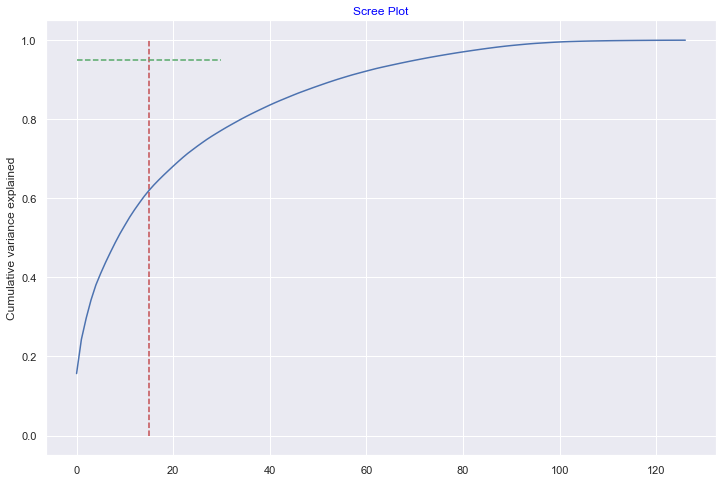

In [273]:
# Making a scree plot for the explained variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.title("Scree Plot", fontdict={"fontsize":12, "fontweight":5, "color":"blue"})
plt.ylabel("Cumulative variance explained")
plt.show()

***Now as we can see from above plot after 55 features the graph does not change. So we will be building a Logistic Regression model with 55 features.***

**Perform PCA with 55 components**

In [274]:
pca_again = PCA(0.9)
df_train_pca2 = pca_again.fit_transform(X_train_pca)
df_train_pca2.shape

(48999, 55)

In [275]:
# defining pca with 55 features

pca_final = IncrementalPCA(n_components=55)

In [276]:
# Fit on data

df_train_pca = pca_final.fit_transform(X_train_pca)

In [277]:
# Verfiy the shape

df_train_pca.shape

(48999, 55)

**We will be creating a correlation matrix of selected features to check for Multi-collinearity.**

In [278]:
# Creating correaltion table

corrmat = np.corrcoef(df_train_pca.transpose())

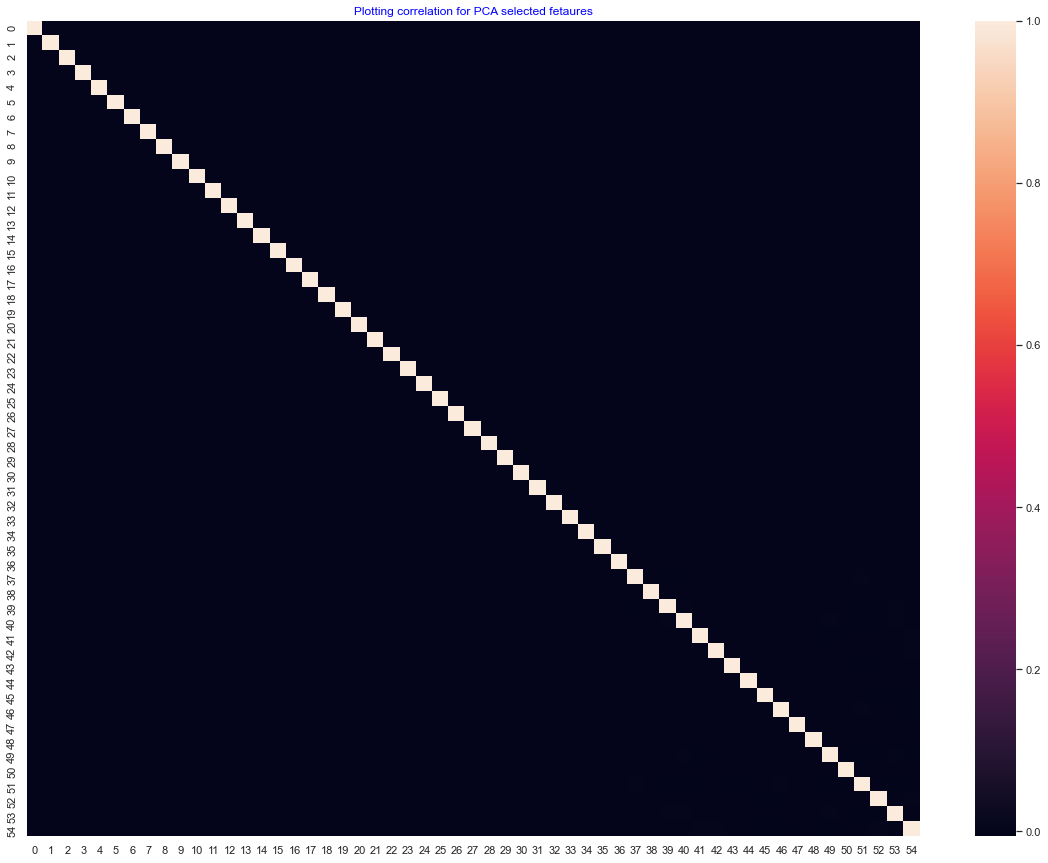

In [279]:
# Plotting the heatmap of the corr matrix

plt.figure(figsize=[20,15])
sns.heatmap(corrmat)
plt.title('Plotting correlation for PCA selected fetaures', fontdict={"fontsize":12, "fontweight":5, "color":"blue"})
plt.show()

In [280]:
# Applying the transformation on the test set

df_test_pca = pca_final.transform(X_test_pca)
df_test_pca.shape

(21000, 55)

#### Applying logistic regression on the data on our Principal components

In [281]:
# Define a model

log_pca = LogisticRegression()

In [282]:
# Fit on data

model_pca = log_pca.fit(df_train_pca, y_train_pca)

*Evaluate the model*

In [283]:
# Making predictions on the test set

y_test_pred_pca = model_pca.predict(df_test_pca)

In [284]:
# Defining a function to compute the accurray for train and test data for PCA model

def evaluate_model_pca(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(df_test_pca)))

In [285]:
# Calling function evaluate_model_pca

evaluate_model_pca(model_pca)

Train Accuracy : 0.9051817384028246
Train Confusion Matrix:
[[43305   661]
 [ 3985  1048]]
--------------------------------------------------
Test Accuracy : 0.9080952380952381
Test Confusion Matrix:
[[18614   287]
 [ 1643   456]]


We will be using classification_report to view the statitics of the model

Recall = TP / TP+FN

Precision = TP / TP+FP

In [286]:
# Checking the classification report

print(classification_report(y_test,y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18901
           1       0.61      0.22      0.32      2099

    accuracy                           0.91     21000
   macro avg       0.77      0.60      0.64     21000
weighted avg       0.89      0.91      0.89     21000



***Conclusion***

Here we can see that the accuracy for train set is 91% and accuracy for test set is 91%. But the main aim of our model is to predict probability of customers who are likely to churn. For this we need to make sure that the Recall percenatge is higher i.e. the number of churn predicted as such should be higher. So, we will be building some more models.

### Building Model using Decision Tree

In [287]:
# Define a DecisionTreeClassifier with some hyper-parameters

dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [288]:
# Fit on data

dt_base.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [289]:
# Prediction on train dataset
y_train_pred_dt = dt_base.predict(X_train)

# Prediction on test dataset
y_test_pred_dt = dt_base.predict(X_test)

**Plot the ROC curve**

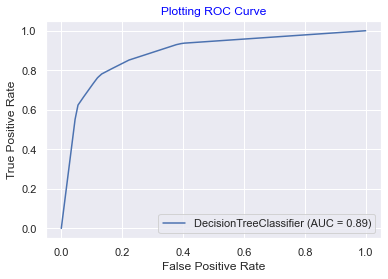

In [290]:
# Plotting ROC

plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.title('Plotting ROC Curve', fontdict={"fontsize":12, "fontweight":5, "color":"blue"})
plt.show()

Evaluate the Model

In [291]:
# Calculate the accuracy score for train data

metrics.accuracy_score(y_train, y_train_pred_dt)

0.9133043531500643

In [292]:
# Calculate the accuracy score for train data

metrics.accuracy_score(y_test, y_test_pred_dt)

0.9137142857142857

In [293]:
# Check the confusion matrix

confusion_matrix(y_test, y_test_pred_dt)

array([[18047,   854],
       [  958,  1141]], dtype=int64)

In [294]:
# Checking the classification report

print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18901
           1       0.57      0.54      0.56      2099

    accuracy                           0.91     21000
   macro avg       0.76      0.75      0.75     21000
weighted avg       0.91      0.91      0.91     21000



***Conclusion***

Now from the above classification report we can see that the train set accuracy score is 94% and test set accuracy score is also 94%. The ROC curve is 91% which is good. The recall rate has also increased as compared to Model build using PCA. which is 61%. But we have build this Decision Tree Model using own hyper-parameters. So, now we will be using the hyper-parametere tuning in Decision Tree and for Cross validation we will be using GridSearchCV for finding the best model.

#### Hyper-parameter tuning for the Decision Tree

In [295]:
# Define DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

In [296]:
# Passing paarmeters through params

params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [297]:
# Define GridSearchCV

grid_search_1 = GridSearchCV(estimator=dt_model,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [298]:
# Fit the data

grid_search_1.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   18.2s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         

In [299]:
# Checking the best score

grid_search_1.best_score_

0.9248964530215711

In [300]:
dt_best = grid_search_1.best_estimator_
dt_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

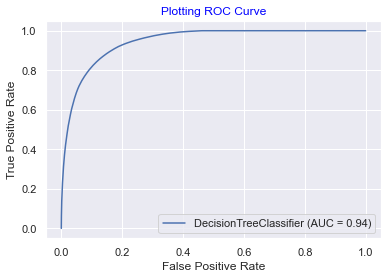

In [301]:
# Plotting the ROC 

plot_roc_curve(dt_best, X_train, y_train, drop_intermediate=False)
plt.title('Plotting ROC Curve', fontdict={"fontsize":12, "fontweight":5, "color":"blue"})
plt.show()

Evaluate the model

In [302]:
# Predicting the y_test

y_test_pred_dtb = dt_best.predict(X_test)

In [303]:
# Defining function to calculate the train and test accuracy 

def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test)))

In [304]:
# Calling function evaluate_model

evaluate_model(dt_best)

Train Accuracy : 0.930100614298251
Train Confusion Matrix:
[[42962  1004]
 [ 2421  2612]]
--------------------------------------------------
Test Accuracy : 0.928047619047619
Test Confusion Matrix:
[[18442   459]
 [ 1052  1047]]


In [305]:
conf = confusion_matrix(y_test, y_test_pred_dtb)

TP = conf[1,1] # true positive 
TN = conf[0,0] # true negatives
FP = conf[0,1] # false positives 
FN = conf[1,0] # false negatives

print("True positive : " + str(TP)) 
print("True negatives : " + str(TN)) 
print("False positives : " + str(FP))  
print("False negatives : " + str(FN)) 

True positive : 1047
True negatives : 18442
False positives : 459
False negatives : 1052


We will be using classification_report to view the statitics of the model

Recall = TP / TP+FN

Precision = TP / TP+FP

In [306]:
# Print the clasification report

print(classification_report(y_test, y_test_pred_dtb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     18901
           1       0.70      0.50      0.58      2099

    accuracy                           0.93     21000
   macro avg       0.82      0.74      0.77     21000
weighted avg       0.92      0.93      0.92     21000



***Conclusion***

From above evaluation we can see that train set accuracy is 94% and test set accuracy is also 94% which is almost similar to the model we build earlier with default parameters. The ROC curve has increased to 93. Looking at the Recall which is 63% and False positive rate is 74%. This is a good model but now we will also be creating a Random Forest model to check for more accuracy.

### Decision Tree using PCA features

In [307]:
df_train_pca.shape

(48999, 55)

In [308]:
# Define DecisionTreeClassifier

pca_dt_model = DecisionTreeClassifier(random_state=42)

In [309]:
# Passing paarmeters through params

params = {
    "max_depth": [2,3,5,7,10,15,20],
    "min_samples_leaf": [5,10,20,50,70,100,200,500]
}

In [310]:
# Define GridSearchCV

grid_search_2 = GridSearchCV(estimator=pca_dt_model,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [311]:
# Fit the data

grid_search_2.fit(df_train_pca, y_train)

Fitting 4 folds for each of 56 candidates, totalling 224 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:  2.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 10, 15, 20],
                  

In [312]:
# Checking the best score

grid_search_2.best_score_

0.903365455905605

In [313]:
pca_dt_best = grid_search_2.best_estimator_
pca_dt_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

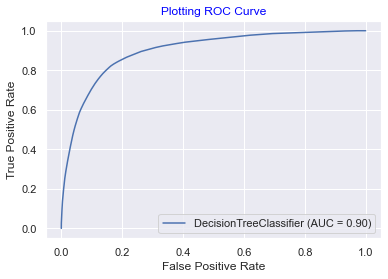

In [314]:
# Plotting the ROC 

plot_roc_curve(pca_dt_best, df_train_pca, y_train, drop_intermediate=False)
plt.title('Plotting ROC Curve', fontdict={"fontsize":12, "fontweight":5, "color":"blue"})
plt.show()

Evaluate the model

In [315]:
# Predicting the y_test

y_test_pred_pca_dtb = pca_dt_best.predict(df_test_pca)

In [316]:
# Print the clasification report

print(classification_report(y_test, y_test_pred_pca_dtb))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18901
           1       0.56      0.26      0.36      2099

    accuracy                           0.91     21000
   macro avg       0.74      0.62      0.65     21000
weighted avg       0.89      0.91      0.89     21000



In [317]:
# Defining a function to compute the accurray for train and test data for PCA model

def evaluate_model_pca(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(df_test_pca)))

In [318]:
evaluate_model_pca(pca_dt_best)

Train Accuracy : 0.913712524745403
Train Confusion Matrix:
[[43182   784]
 [ 3444  1589]]
--------------------------------------------------
Test Accuracy : 0.9055714285714286
Test Confusion Matrix:
[[18462   439]
 [ 1544   555]]


***Now we will be building our next model using Random Forest of Tree Family.***

### Model building using Random Forest

In [319]:
# Define a model with few hyper parameters

model_rf_m1 = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True)

In [320]:
# Fit model 

model_rf_m1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [321]:
# Checking the oob score

model_rf_m1.oob_score_

0.9037735463989061

In [322]:
# Predicting the y_train 

y_train_pred_rf = model_rf_m1.predict(X_train)

####  Plot the ROC curve

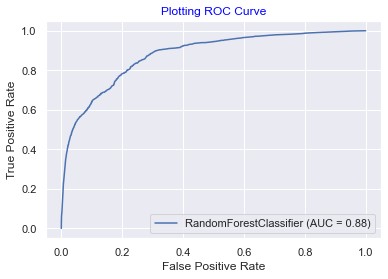

In [323]:
plot_roc_curve(model_rf_m1, X_train, y_train, drop_intermediate=False)
plt.title('Plotting ROC Curve', fontdict={"fontsize":12, "fontweight":5, "color":"blue"})
plt.show()

*Evaluate the Model*

In [324]:
# Metric accuracy score for train data

metrics.accuracy_score(y_train, y_train_pred_rf)

0.8989775301536767

In [325]:
# Predicting the y_test

y_test_pred_rf = model_rf_m1.predict(X_test)

In [326]:
# Metric accuracy score test data

metrics.accuracy_score(y_test, y_test_pred_rf)

0.9014285714285715

In [327]:
# Checking the confusion matrix

confusion = metrics.confusion_matrix(y_test, y_test_pred_rf)
confusion

array([[18899,     2],
       [ 2068,    31]], dtype=int64)

In [328]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives 
FN = confusion[1,0] # false negatives

print("True positive : " + str(TP)) 
print("True negatives : " + str(TN)) 
print("False positives : " + str(FP))  
print("False negatives : " + str(FN)) 

True positive : 31
True negatives : 18899
False positives : 2
False negatives : 2068


We will be using classification_report to view the statitics of the model

Recall = TP / TP+FN

Precision = TP / TP+FP

In [329]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18901
           1       0.94      0.01      0.03      2099

    accuracy                           0.90     21000
   macro avg       0.92      0.51      0.49     21000
weighted avg       0.91      0.90      0.86     21000



***Conclusion***

Now from the above classification report we can see that the train set accuracy score is 93% and test set accuracy score is also 93%. The ROC curve is 91% which is good. The recall rate has also increased as compared to Model build using PCA. which is 43%. But we have build this Random Forest Model using own hyper-parameters. So, now we will be using the hyper-parametere tuning in Random Forest and for Cross validation we will be using GridSearchCV for finding the best model.

#### Hyper-parameter tuning for the Random Forest

In [330]:
# Define a model

model_rf_m2 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [331]:
# Creating params to pass to Gridsearchcv

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [332]:
# Cross validation using GridSearchCV

grid_search_3 = GridSearchCV(estimator=model_rf_m2,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [333]:
# Fit on data

grid_search_3.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  5.4min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [334]:
# Checking the best model score

grid_search_3.best_score_

0.9298761431587084

In [335]:
# Storing the estimators of best model

rf_best = grid_search_3.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

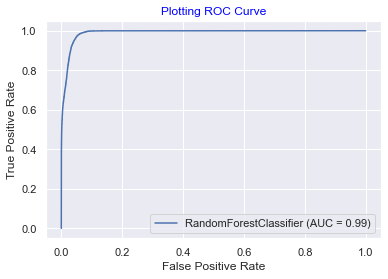

In [336]:
# Plotting the roc curve

plot_roc_curve(rf_best, X_train, y_train)
plt.title('Plotting ROC Curve', fontdict={"fontsize":12, "fontweight":5, "color":"blue"})
plt.show()

*Evaluate the model*

In [337]:
# Predicting the y_test

y_test_pred_rfb = rf_best.predict(X_test)

In [338]:
# Calling function evaluate_model

evaluate_model(rf_best)

Train Accuracy : 0.9566521765750321
Train Confusion Matrix:
[[43681   285]
 [ 1839  3194]]
--------------------------------------------------
Test Accuracy : 0.9330952380952381
Test Confusion Matrix:
[[18598   303]
 [ 1102   997]]


In [339]:
con = confusion_matrix(y_test, y_test_pred_rfb)

TP = con[1,1] # true positive 
TN = con[0,0] # true negatives
FP = con[0,1] # false positives 
FN = con[1,0] # false negatives

print("True positive : " + str(TP)) 
print("True negatives : " + str(TN)) 
print("False positives : " + str(FP))  
print("False negatives : " + str(FN)) 

True positive : 997
True negatives : 18598
False positives : 303
False negatives : 1102


We will be using classification_report to view the statitics of the model

Recall = TP / TP+FN

Precision = TP / TP+FP

In [340]:
# Print the clasification report

print(classification_report(y_test, y_test_pred_rfb))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     18901
           1       0.77      0.47      0.59      2099

    accuracy                           0.93     21000
   macro avg       0.86      0.73      0.78     21000
weighted avg       0.93      0.93      0.93     21000



***Conclusion***

From above evaluation we can see that train set accuracy is 95% and test set accuracy is 94% which is almost similar. The ROC curve is 99% which means area under the curev is at maximum. Also now the Recall is 59% and Precision is 79%. 



#### Now we will check the important fetaures

In [341]:
rf_best.feature_importances_

array([3.63446874e-02, 3.79319725e-02, 2.91969674e-02, 3.66369686e-02,
       1.26094920e-02, 4.05734622e-02, 1.57839126e-01, 1.05758996e-02,
       1.45235854e-02, 8.17171797e-02, 4.56925650e-03, 4.38054282e-03,
       1.16877815e-02, 3.04498230e-03, 2.98365100e-04, 3.32844651e-04,
       8.74085449e-04, 1.68785903e-03, 1.50439332e-03, 1.97804753e-03,
       7.22276341e-04, 6.17965992e-04, 6.07092706e-04, 3.90675176e-04,
       3.47444812e-04, 2.48092502e-04, 3.54016619e-02, 1.37589034e-02,
       2.01151634e-02, 3.34871688e-02, 8.82992004e-03, 2.40650651e-02,
       4.31232248e-02, 1.47848237e-02, 1.95278992e-02, 8.57661689e-03,
       4.50525072e-03, 4.63225231e-03, 4.93127799e-03, 1.16865181e-03,
       9.35218760e-04, 2.36590201e-03, 1.45895171e-03, 1.48659535e-03,
       7.83945310e-04, 9.85636974e-03, 1.18256448e-02, 3.64111946e-02,
       6.94155960e-03, 1.65461847e-05, 3.81780348e-06, 1.83128976e-02,
       1.59400612e-02, 1.30781389e-02, 1.20398378e-02, 4.30706787e-02,
      

In [342]:
# Storing the important features 

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [343]:
# Display the top important features

imp_df.sort_values(by="Imp", ascending=False).head(50)

Varname       Imp
6        max_rech_amt_8  0.157839
9    last_day_rch_amt_8  0.081717
32        roam_ic_mou_8  0.043123
55     std_ic_t2t_mou_8  0.043071
5        max_rech_amt_7  0.040573
1        total_ic_mou_6  0.037932
3      total_rech_num_7  0.036637
47         spl_og_mou_8  0.036411
0                arpu_6  0.036345
26                  aon  0.035402
29  date_of_last_rech_8  0.033487
2      total_rech_num_6  0.029197
31        roam_ic_mou_7  0.024065
57     std_ic_t2m_mou_7  0.022822
28  date_of_last_rech_7  0.020115
34     loc_og_t2m_mou_6  0.019528
51     loc_ic_t2t_mou_6  0.018313
52     loc_ic_t2f_mou_6  0.015940
56     std_ic_t2m_mou_6  0.014805
33     loc_og_t2t_mou_6  0.014785
60     std_ic_t2f_mou_8  0.014784
8    last_day_rch_amt_7  0.014524
27  date_of_last_rech_6  0.013759
67          ic_others_8  0.013336
53     std_ic_t2t_mou_6  0.013078
4        max_rech_amt_6  0.012609
54     std_ic_t2t_mou_7  0.012040
46         spl_og_mou_7  0.011826
12          vol_2g_mb_8  0.011688
7    last_day_rch_amt_6  0.010576
63         spl_ic_mou_8  0.009944
45         spl_og_mou_6  0.009856
30        roam_ic_mou_6  0.008830
35     loc_og_t2f_mou_6  0.008577
48          og_others_6  0.006942
38     loc_og_t2c_mou_8  0.004931
37     loc_og_t2c_mou_7  0.004632
10          vol_2g_mb_6  0.004569
36     loc_og_t2c_mou_6  0.004505
11          vol_2g_mb_7  0.004381
65          ic_others_6  0.003873
64         isd_ic_mou_6  0.003638
59     std_ic_t2f_mou_7  0.003608
66          ic_others_7  0.003329
13          vol_3g_mb_6  0.003045
58     std_ic_t2f_mou_6  0.002823
41     std_og_t2f_mou_8  0.002366
61         spl_ic_mou_6  0.002329
62         spl_ic_mou_7  0.002033
19          sachet_2g_8  0.001978

***We have obtained the important features affecting the churn of customers as above.***

*The top 30 features are associated with **August** month which is the action month as mentioned earlier. So, in this month business should be focusing on the customer's below actvities:*

* Minutes of Usage of various Incoming call .
* Minutes of Usage of various Outgoing call .
* Minutes of Usage on internet.
* Total recharge amount.
* Maximum recharge amount.
* Total number of recharges.
* Last day recharge amount.
* Average revenue per user.
* Age on network of user.
* Volumne of 2G/ 3G mobile data.



## Model building using SMOTE+Tomek links for imbalanced data

As we know there is imbalance in target variables we will be building the model using Tomek links

In [344]:
#!pip install -U imbalanced-learn
#!pip install imbalanced-learn==0.6.0
#!pip install scikit-learn==0.22.1

Combining Oversampling and Undersampling

1. Tomek links can be used as an under-sampling method or as a data cleaning method.
2. Tomek links to the over-sampled training set as a data cleaning method. Thus, instead of removing only the majority class examples that from Tomek links, examples from both classes are removed.

In [345]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(df_train_pca, y_train)
len(X_resampled_smt_tmk)

87906

In [346]:
# Random Forest - Random UnderSampling
 
rf_us = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


rf_us.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_rf_us = rf_us.predict(df_test_pca)

In [347]:
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))


 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     18901
           1       0.48      0.69      0.57      2099

    accuracy                           0.89     21000
   macro avg       0.72      0.80      0.75     21000
weighted avg       0.92      0.89      0.90     21000


 confussion matrix:
 [[17343  1558]
 [  657  1442]]


In [348]:
evaluate_model_pca(rf_us)

Train Accuracy : 0.964713565582971
Train Confusion Matrix:
[[42304  1662]
 [   67  4966]]
--------------------------------------------------
Test Accuracy : 0.8945238095238095
Test Confusion Matrix:
[[17343  1558]
 [  657  1442]]


***Conclusion***

From above evaluation we can see that test set accuracy is 89%. Also now the Recall is 69% and Precision is 48%. 
So we will be using this model as final model.

***Now we will be reading the test dataset and peforming churn prediction on it using the best model created from SMOTE+Tomek Method rf_us.***

In [349]:
# Read the test dataset

unseen = pd.read_csv("test.csv")
unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [350]:
# Check the shape of test dataset

unseen.shape

(30000, 171)

In [351]:
# Inspeact the head of test dataset

unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [352]:
# Checking the info 

unseen.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   arpu_6                    float64
 9   arpu_7                    float64
 10  arpu_8                    float64
 11  onnet_mou_6               float64
 12  onnet_mou_7               float64
 13  onnet_mou_8               float64
 14  offnet_mou_6              float64
 15  offnet_mou_7              float64
 16  offnet_mou_8              float64
 17  roam_ic_mou_6             float64
 18  roam_ic_mou_7             float64
 19  roam_ic_mou_8             float64
 20  roam_og_mou_6             f

In [353]:
# Store the id column for submission dataset

sample_1 = unseen["id"]

In [354]:
# Drop the irrelavent columns

unseen.drop(columns=["id","circle_id","last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8"], axis=1, inplace = True)

In [355]:
# Re-checking the shape

unseen.shape

(30000, 157)

#### Null values handling and imputation for test 

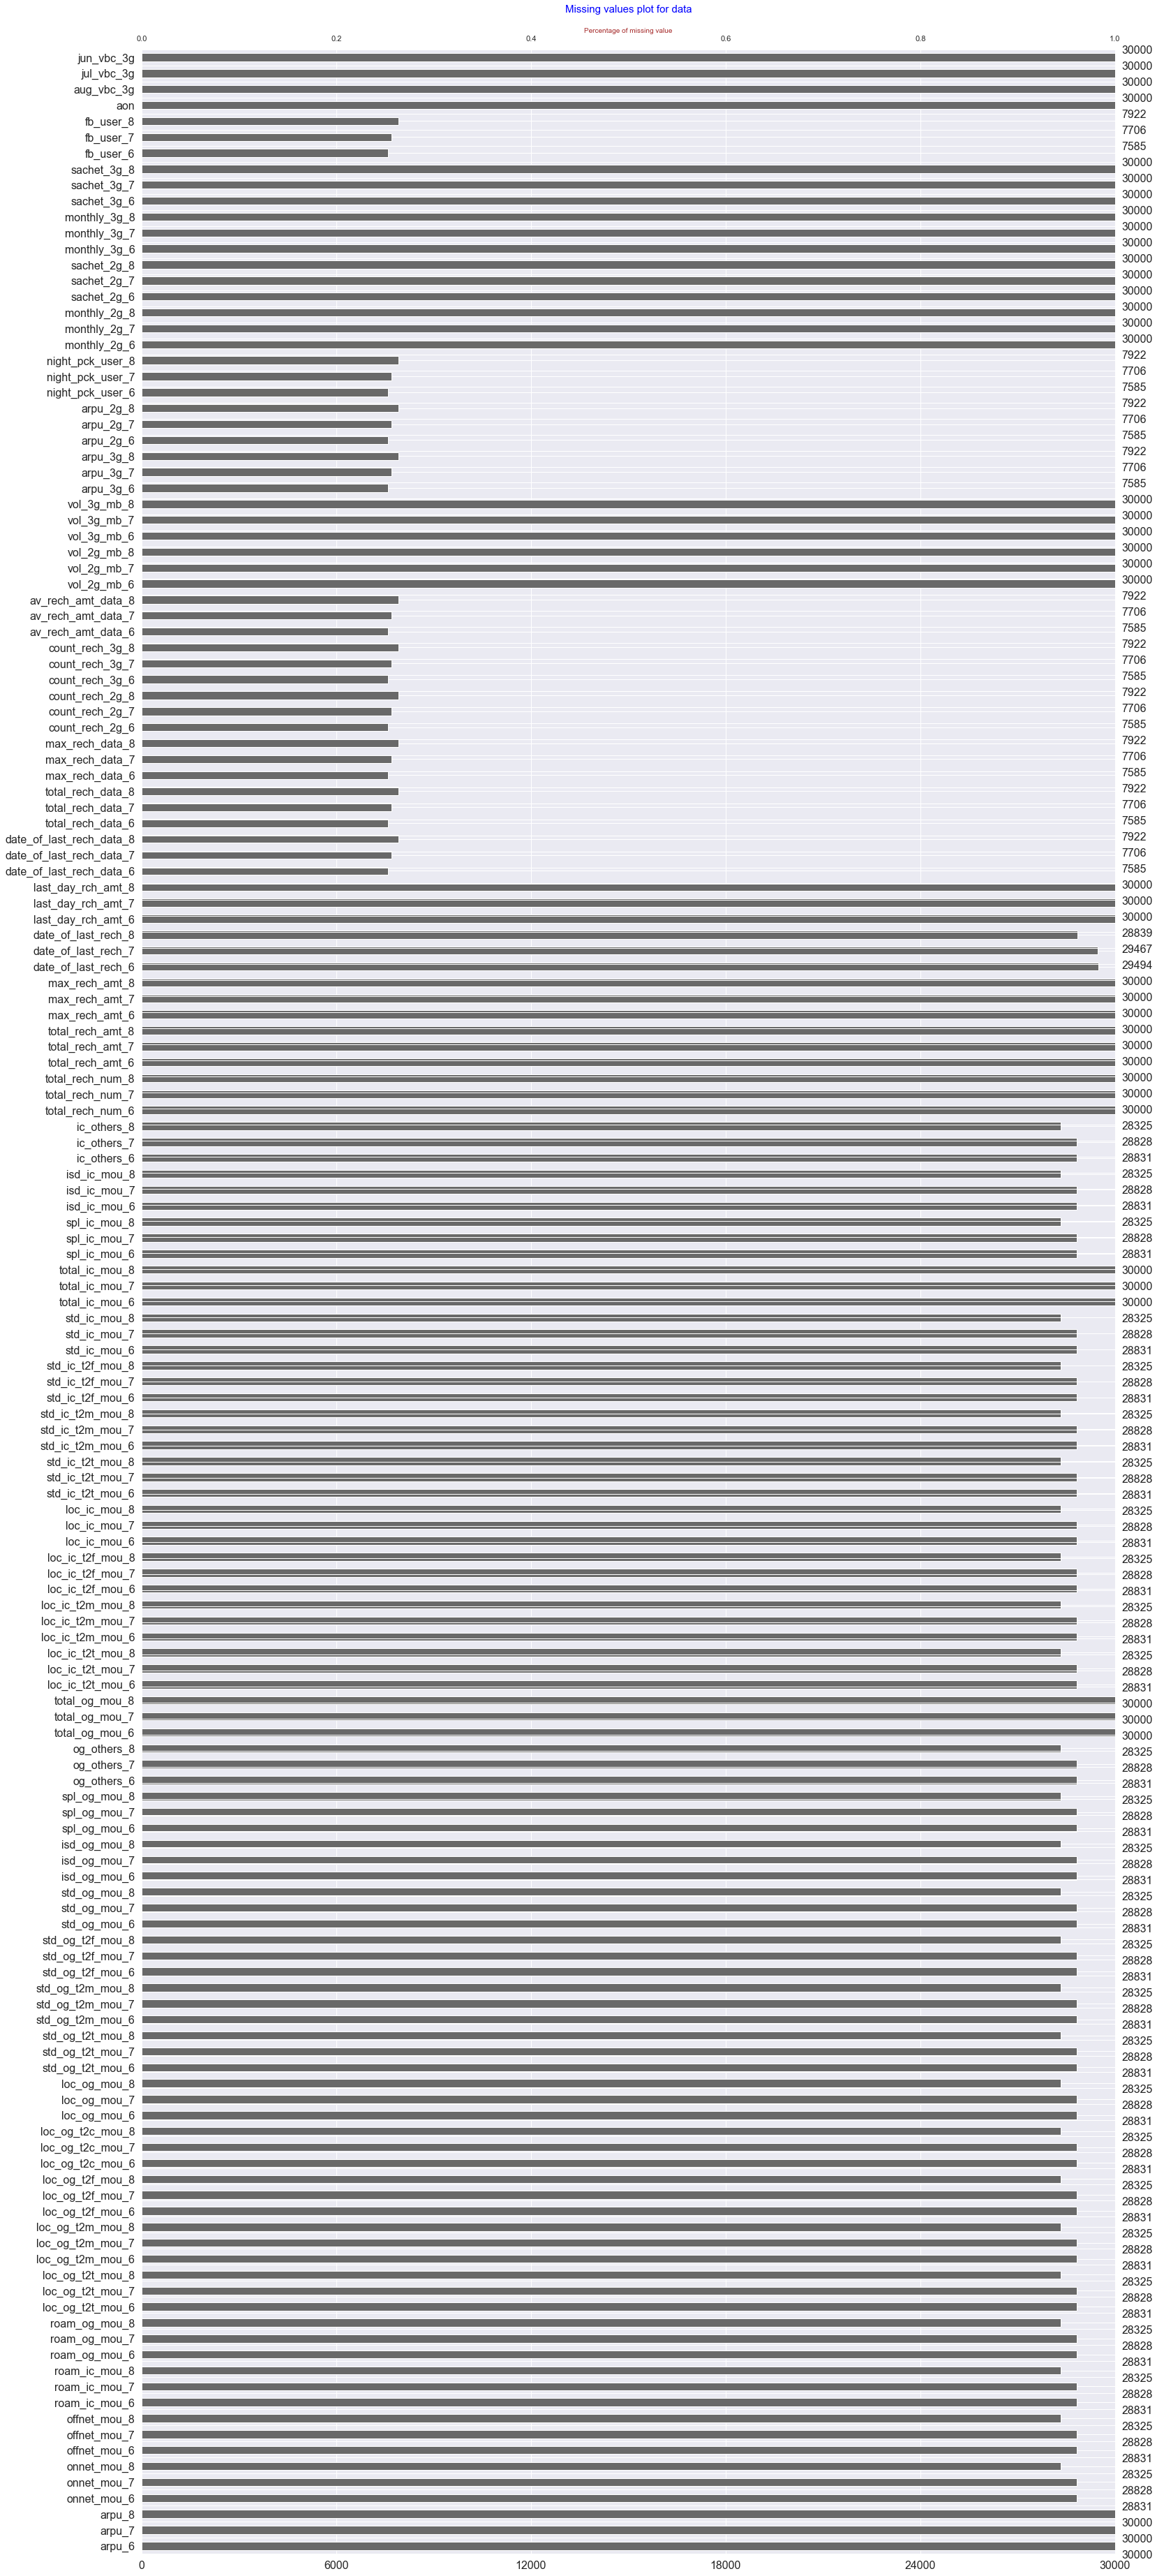

In [356]:
# Plotting the missing values of unseen dataset using msno.bar

msno.bar(unseen)
plt.title("Missing values plot for data\n", fontdict={"fontsize":15, "fontweight":5, "color":"blue"})
plt.xlabel("Percentage of missing value", fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
plt.ylabel("Columns", fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
plt.show()

In [357]:
# Inspecting the percentage of missing data

missing_unseen_percent = 100*unseen.isnull().sum()/len(unseen.index)
missing_unseen_percent.sort_values(ascending=False).head(40)

total_rech_data_6           74.716667
fb_user_6                   74.716667
arpu_2g_6                   74.716667
arpu_3g_6                   74.716667
date_of_last_rech_data_6    74.716667
count_rech_3g_6             74.716667
av_rech_amt_data_6          74.716667
count_rech_2g_6             74.716667
max_rech_data_6             74.716667
night_pck_user_6            74.716667
count_rech_2g_7             74.313333
count_rech_3g_7             74.313333
night_pck_user_7            74.313333
av_rech_amt_data_7          74.313333
date_of_last_rech_data_7    74.313333
max_rech_data_7             74.313333
arpu_3g_7                   74.313333
total_rech_data_7           74.313333
arpu_2g_7                   74.313333
fb_user_7                   74.313333
night_pck_user_8            73.593333
av_rech_amt_data_8          73.593333
max_rech_data_8             73.593333
fb_user_8                   73.593333
count_rech_2g_8             73.593333
count_rech_3g_8             73.593333
date_of_last

In [358]:
# Dropping the columns having more than 70% Null values

new_vars_1 = missing_unseen_percent[missing_unseen_percent.lt(30)].index
filtered_unseen = unseen[new_vars_1]

In [359]:
# Re-checking the Null value percentage

(100*filtered_unseen.isnull().sum()/len(filtered_unseen.index)).sort_values(ascending=False).head(40)

spl_ic_mou_8        5.583333
std_ic_t2m_mou_8    5.583333
loc_og_t2c_mou_8    5.583333
loc_og_mou_8        5.583333
std_og_t2t_mou_8    5.583333
ic_others_8         5.583333
isd_ic_mou_8        5.583333
std_og_t2m_mou_8    5.583333
std_ic_mou_8        5.583333
std_ic_t2f_mou_8    5.583333
std_ic_t2t_mou_8    5.583333
loc_og_t2m_mou_8    5.583333
loc_ic_mou_8        5.583333
loc_ic_t2f_mou_8    5.583333
loc_ic_t2m_mou_8    5.583333
loc_ic_t2t_mou_8    5.583333
std_og_t2f_mou_8    5.583333
og_others_8         5.583333
spl_og_mou_8        5.583333
isd_og_mou_8        5.583333
loc_og_t2f_mou_8    5.583333
std_og_mou_8        5.583333
roam_ic_mou_8       5.583333
loc_og_t2t_mou_8    5.583333
roam_og_mou_8       5.583333
offnet_mou_8        5.583333
onnet_mou_8         5.583333
spl_ic_mou_7        3.906667
loc_ic_t2t_mou_7    3.906667
std_og_t2m_mou_7    3.906667
roam_og_mou_7       3.906667
std_ic_mou_7        3.906667
std_og_mou_7        3.906667
std_og_t2f_mou_7    3.906667
std_ic_t2f_mou

In [360]:
# Filter the object type columns

cat_impute_unseen = filtered_unseen.select_dtypes("object")
cat_impute_unseen.head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
0           6/21/2014           7/26/2014           8/24/2014
1           6/19/2014           7/16/2014           8/24/2014
2           6/29/2014           7/27/2014           8/28/2014
3           6/25/2014           7/30/2014           8/24/2014
4           6/29/2014           7/29/2014           8/30/2014

In [361]:
# Convert date to day for columns date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8

for col in cat_impute_unseen.columns:
    cat_impute_unseen[col] = pd.to_datetime(cat_impute_unseen[col]).dt.day
    
cat_impute_unseen.head()

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8
0                 21.0                 26.0                 24.0
1                 19.0                 16.0                 24.0
2                 29.0                 27.0                 28.0
3                 25.0                 30.0                 24.0
4                 29.0                 29.0                 30.0

In [362]:
# Impute categorical columns by mode value

for cols in cat_impute_unseen.columns:
    cat_impute_unseen[cols] = cat_impute_unseen[cols].fillna(cat_impute_unseen[cols].mode().iloc[0])   

In [363]:
# Store numeric columns 
num_impute_unseen = filtered_unseen.select_dtypes(["int64","float64"])

# Store numeric column names
num_impute_unseen_col = filtered_unseen.select_dtypes(["int64","float64"]).columns

num_impute_unseen.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   91.882   65.330   64.445        31.78        20.23        23.11   
1  414.168  515.568  360.868        75.51        41.21        19.84   
2  329.844  434.884  746.239         7.54         7.86         8.40   
3   43.550  171.390   24.400         5.31         2.16         0.00   
4  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         60.16         32.16         34.83           0.00           0.00   
1        474.34        621.84        394.94           0.00           0.00   
2         16.98         45.81         45.04          22.81         103.38   
3         40.04        205.01         24.01           0.00           0.00   
4         60.94         23.84         74.16           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00   
2          26.08          24.53          53.68          54.44   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             24.88             20.23             21.06             18.13   
1             75.51             41.21             19.84            473.61   
2              0.00              0.00              0.00              0.00   
3              5.31              0.00              0.00              2.94   
4              0.45              0.78             14.56              2.39   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             10.89              8.36              0.00             13.58   
1            598.08            377.26              0.73              0.00   
2              0.00              0.00              0.00              0.00   
3             98.61             20.51              0.00              0.00   
4              2.66             10.94              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.03   
1              0.00               0.0              0.00              0.00   
2              0.00               0.0              0.00              0.00   
3              2.35               0.0              6.18              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         43.01         44.71         29.43              6.90   
1        549.86        639.29        397.11              0.00   
2          0.00          0.00          0.00              0.00   
3          8.26         98.61         22.86              0.00   
4          2.84          3.44         25.51            450.48   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              2.05             42.03              7.68   
1              0.00              0.00              0.00             23.76   
2              0.00              0.00              0.00              0.00   
3              2.16              0.00             37.09             94.36   
4            608.24            686.11             58.54             21.18   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             26.43               0.0               0.0               0.0   
1             17.68               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4             63.18               0.0               0.0               0.0   

   std_og_mou_6  

In [364]:
# Imputing the missing values by replacing them with median 

num_impute_unseen = imputer.fit_transform(num_impute_unseen)

In [365]:
# Converting the array to Dataframe
num_impute_unseen = pd.DataFrame(num_impute_unseen)

# Adding column names to the dataframe
num_impute_unseen.columns = num_impute_unseen_col

In [366]:
# Concatenating the datasets cat_impute_data and num_impute_data

unseen_1 = pd.concat([cat_impute_unseen, num_impute_unseen], axis=1)
unseen_1.head()

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8   arpu_6  \
0                 21.0                 26.0                 24.0   91.882   
1                 19.0                 16.0                 24.0  414.168   
2                 29.0                 27.0                 28.0  329.844   
3                 25.0                 30.0                 24.0   43.550   
4                 29.0                 29.0                 30.0  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              2.05             42.03              7.68             26.43   
1              0.00              0.00             23.76             17.68   
2              0.00              0.00              0.00              0.00   
3              0.00             37.09             94.36              0.00   
4            686.11             58.54   

In [367]:
# Re-checking the Null values

unseen_1.isnull().sum().sort_values(ascending=False)

jun_vbc_3g             0
isd_og_mou_7           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
                      ..
isd_ic_mou_8           0
ic_others_6            0
ic_others_7            0
ic_others_8            0
date_of_last_rech_6    0
Length: 127, dtype: int64

#### Outliers Handling

In [368]:
# Calling function cap_outliers 

unseen_1 = unseen_1.apply(cap_outliers, axis=0)

Plot 1


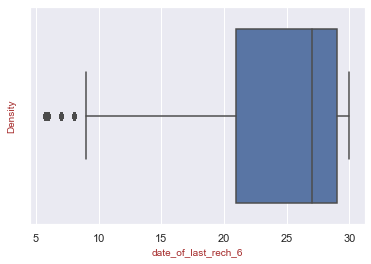

Plot 2


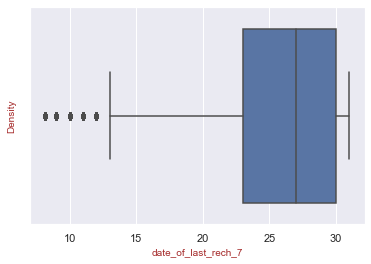

Plot 3


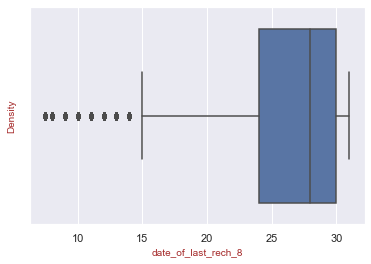

Plot 4


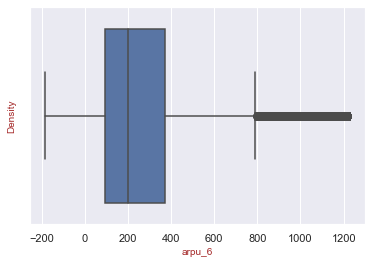

Plot 5


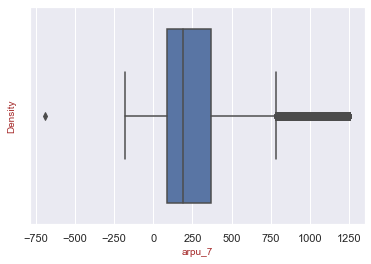

Plot 6


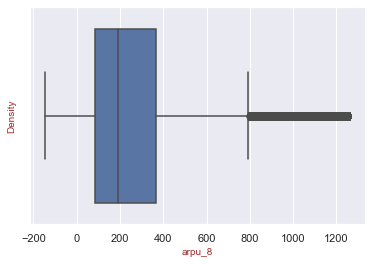

Plot 7


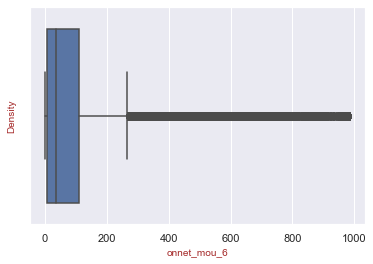

Plot 8


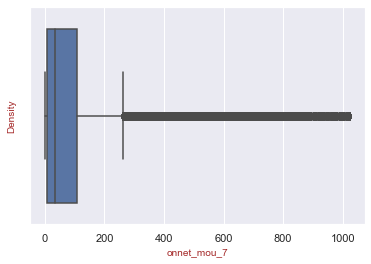

Plot 9


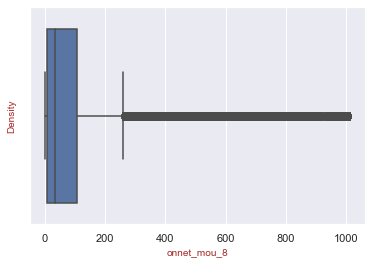

Plot 10


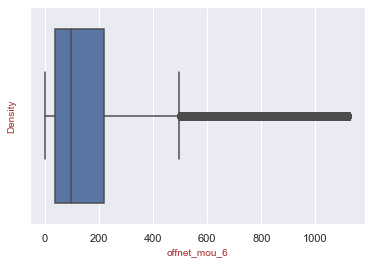

Plot 11


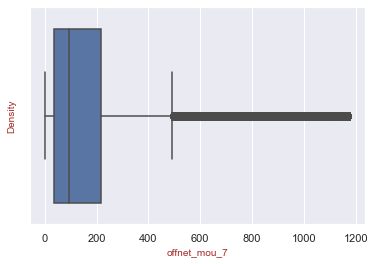

Plot 12


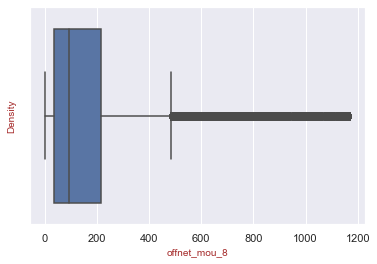

Plot 13


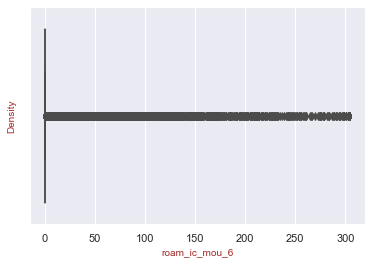

Plot 14


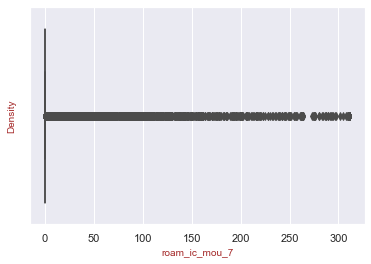

Plot 15


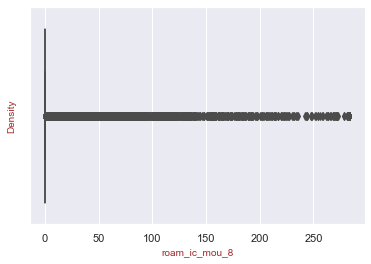

Plot 16


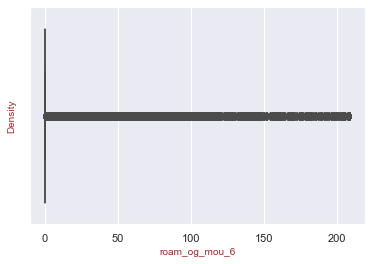

Plot 17


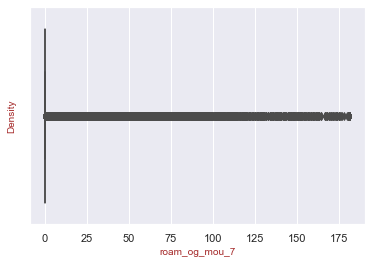

Plot 18


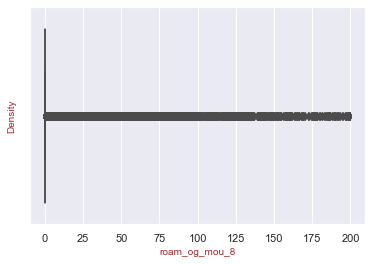

Plot 19


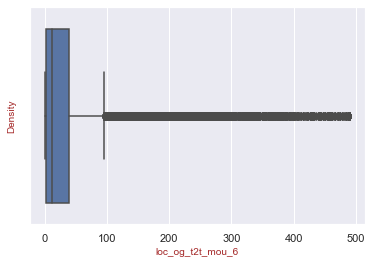

Plot 20


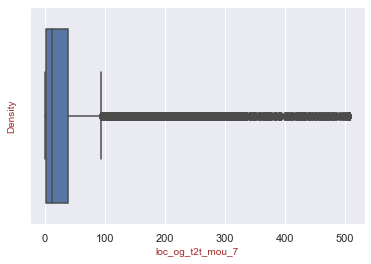

Plot 21


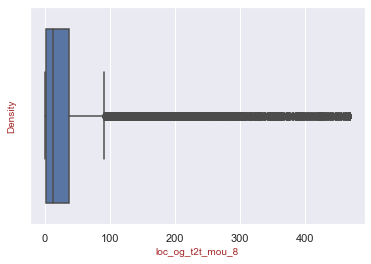

Plot 22


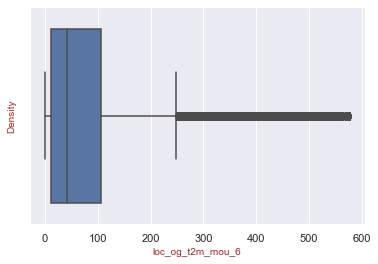

Plot 23


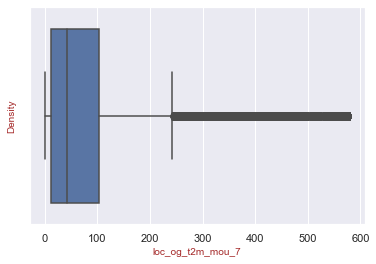

Plot 24


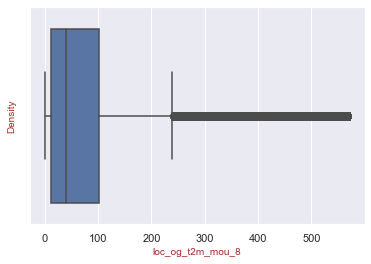

Plot 25


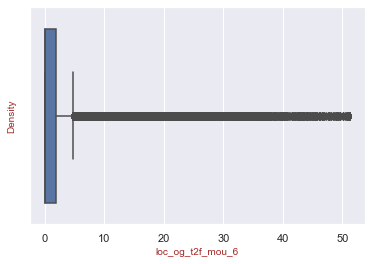

Plot 26


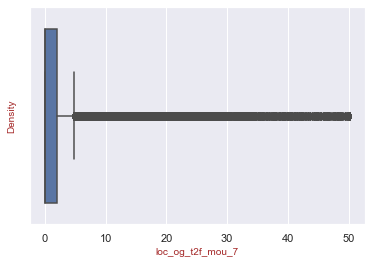

Plot 27


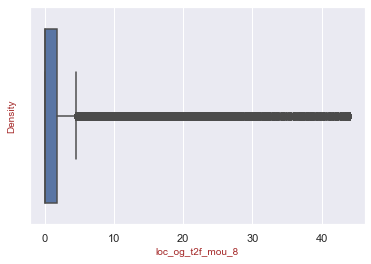

Plot 28


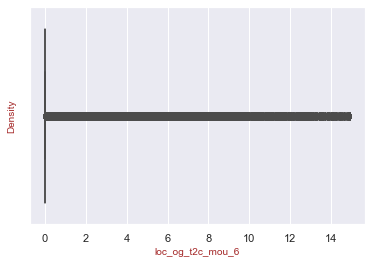

Plot 29


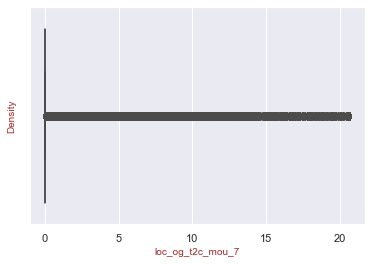

Plot 30


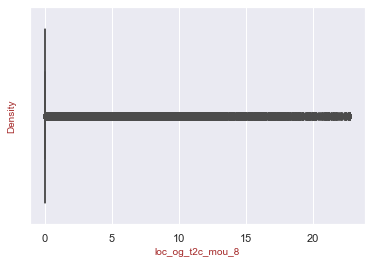

Plot 31


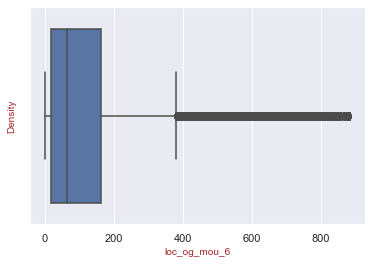

Plot 32


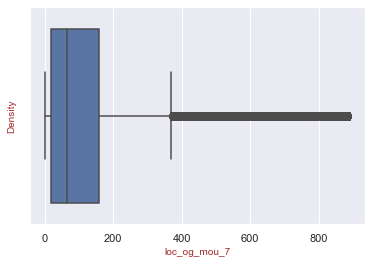

Plot 33


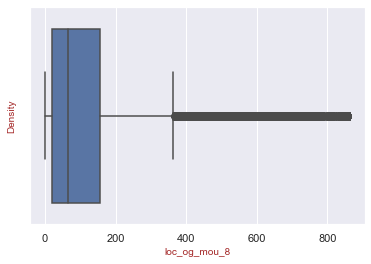

Plot 34


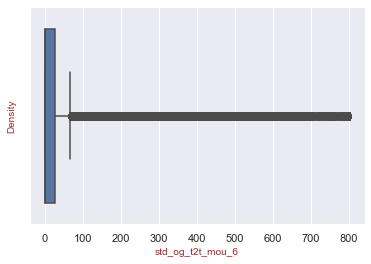

Plot 35


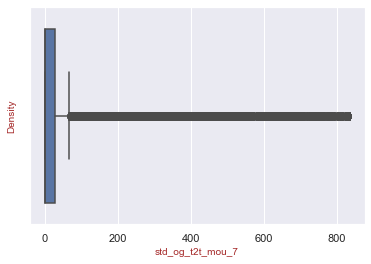

Plot 36


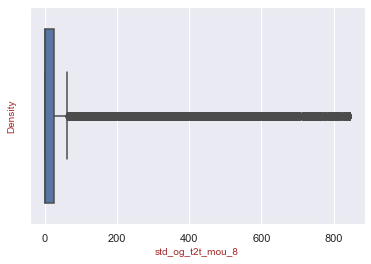

Plot 37


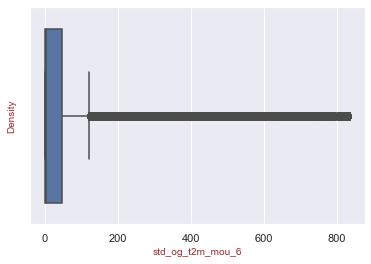

Plot 38


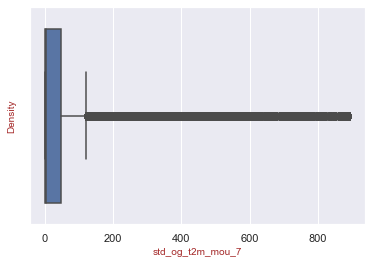

Plot 39


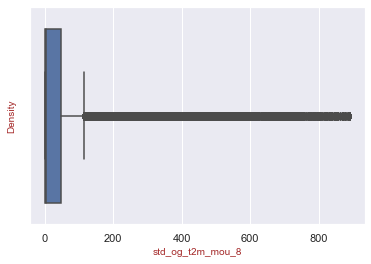

Plot 40


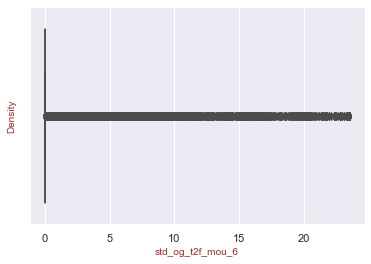

Plot 41


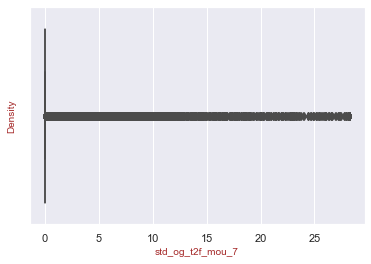

Plot 42


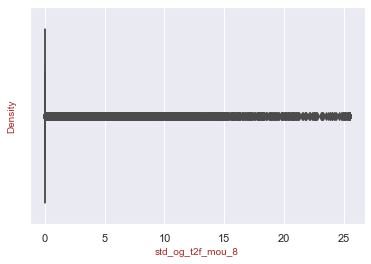

Plot 43


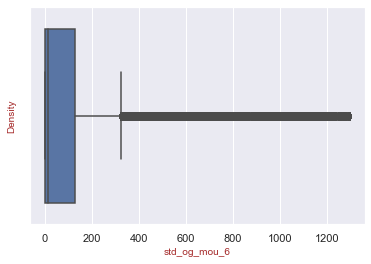

Plot 44


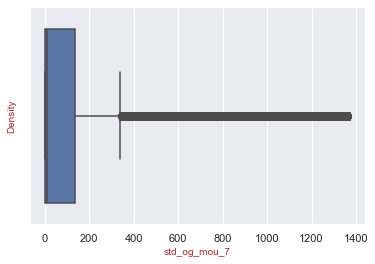

Plot 45


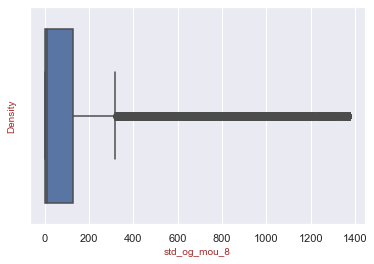

Plot 46


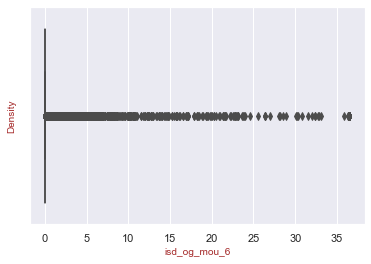

Plot 47


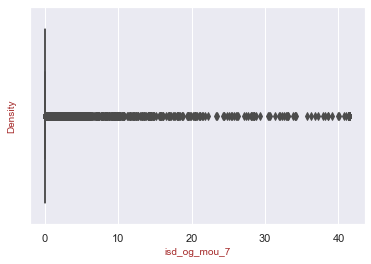

Plot 48


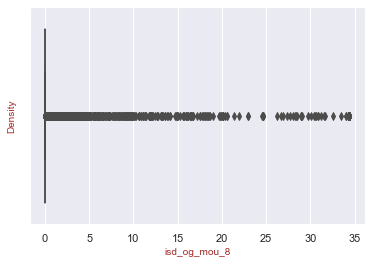

Plot 49


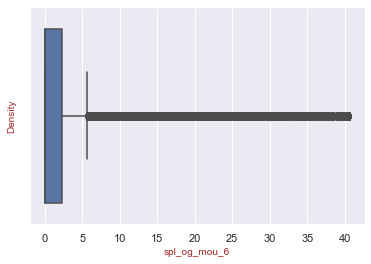

Plot 50


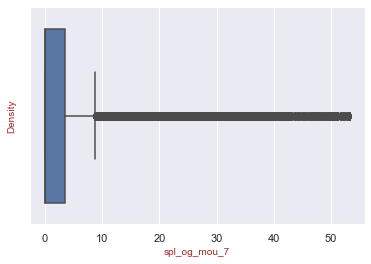

Plot 51


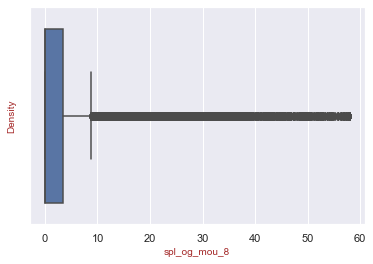

Plot 52


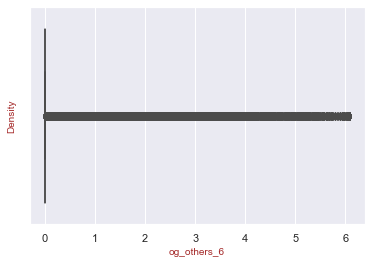

Plot 53


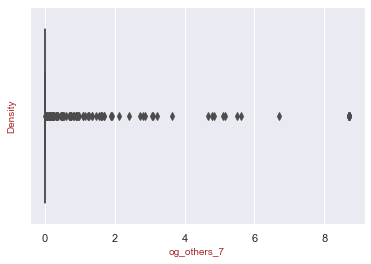

Plot 54


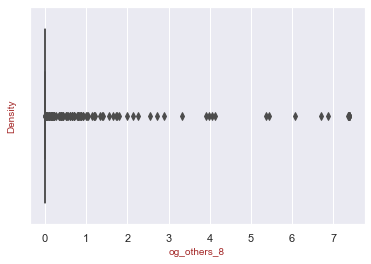

Plot 55


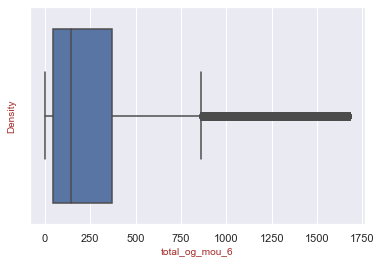

Plot 56


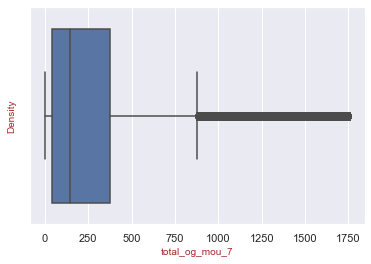

Plot 57


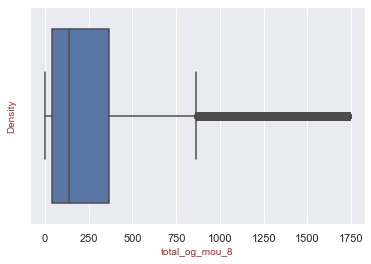

Plot 58


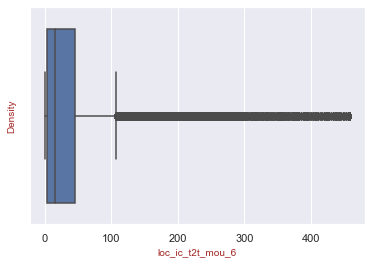

Plot 59


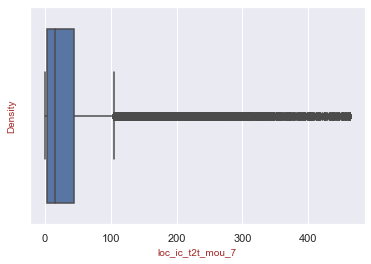

Plot 60


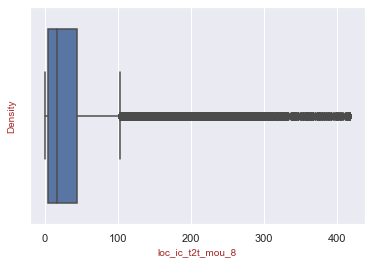

Plot 61


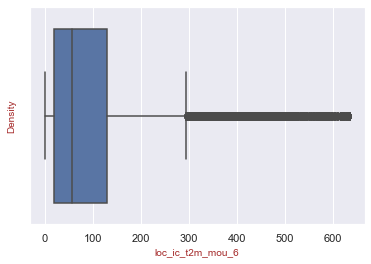

Plot 62


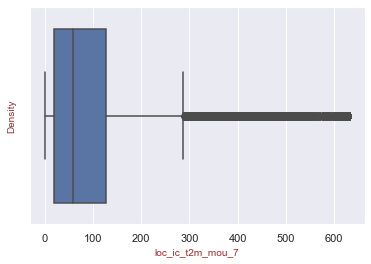

Plot 63


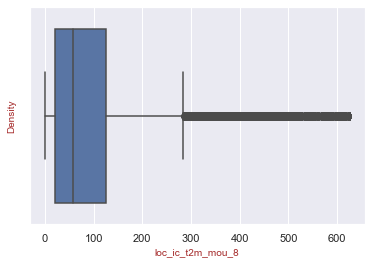

Plot 64


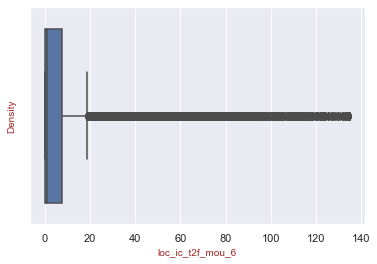

Plot 65


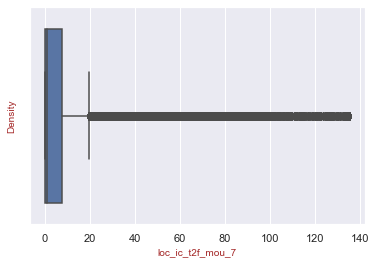

Plot 66


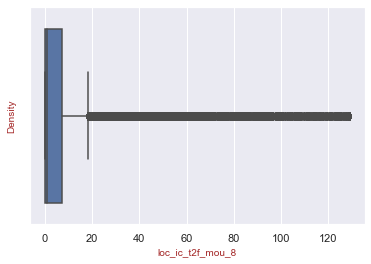

Plot 67


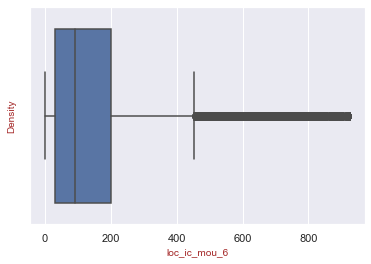

Plot 68


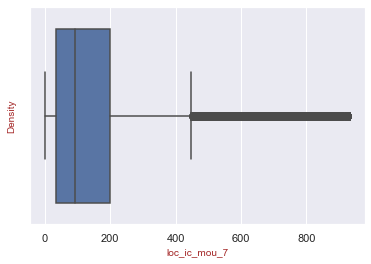

Plot 69


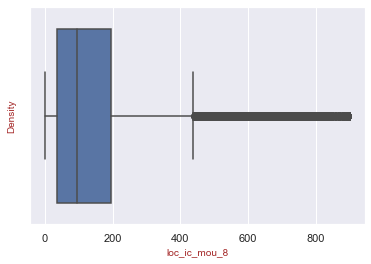

Plot 70


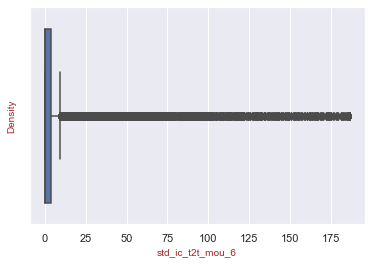

Plot 71


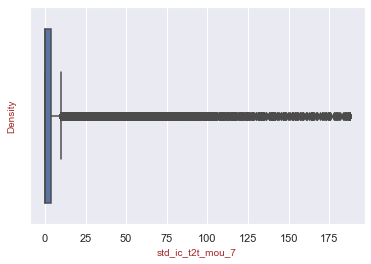

Plot 72


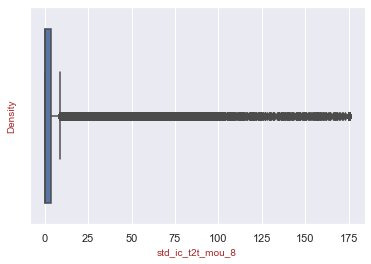

Plot 73


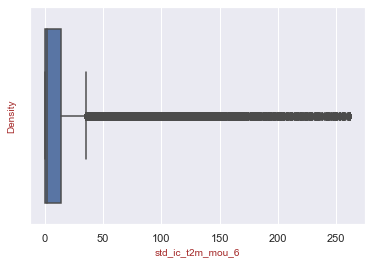

Plot 74


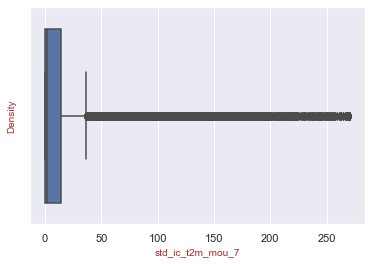

Plot 75


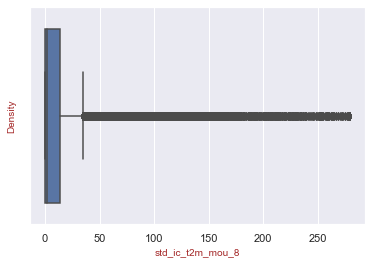

Plot 76


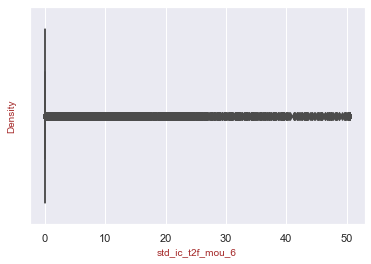

Plot 77


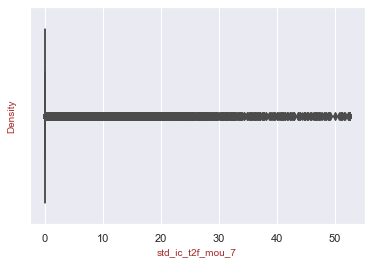

Plot 78


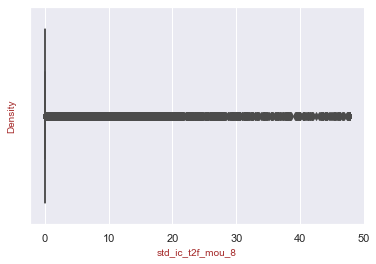

Plot 79


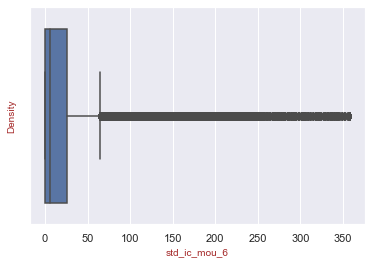

Plot 80


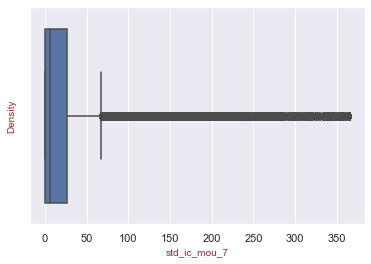

Plot 81


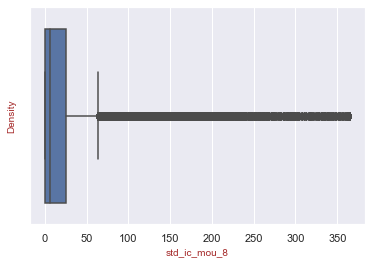

Plot 82


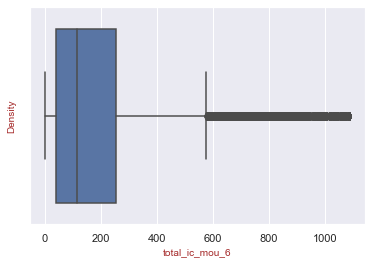

Plot 83


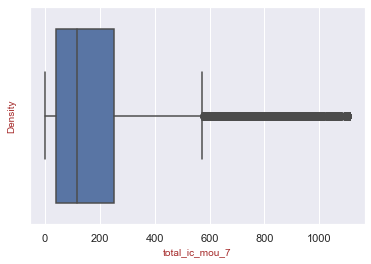

Plot 84


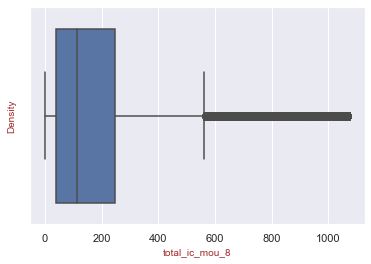

Plot 85


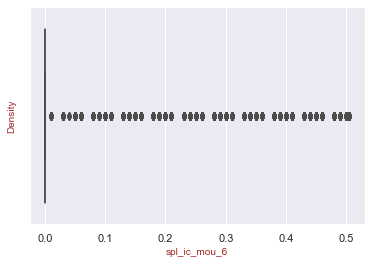

Plot 86


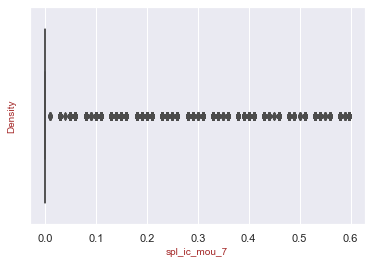

Plot 87


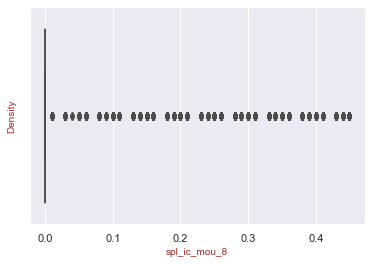

Plot 88


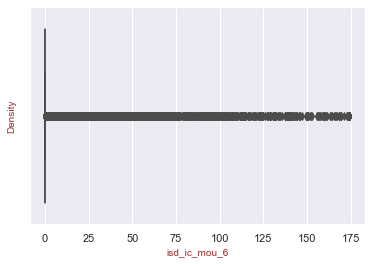

Plot 89


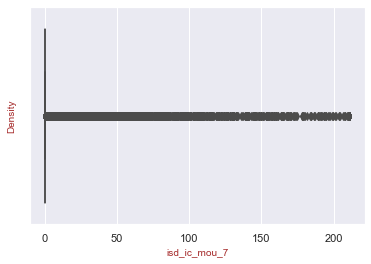

Plot 90


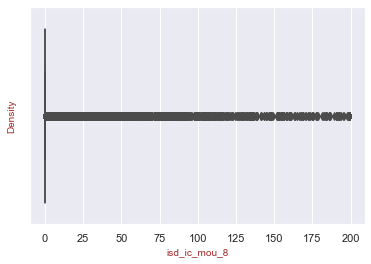

Plot 91


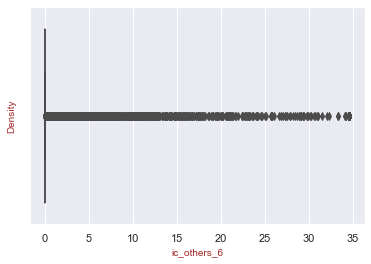

Plot 92


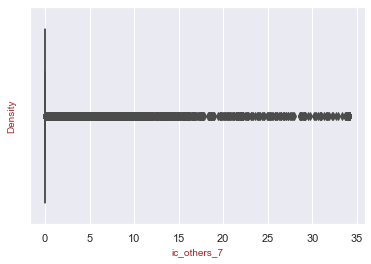

Plot 93


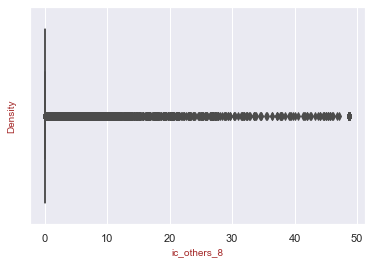

Plot 94


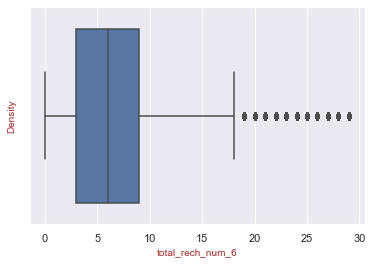

Plot 95


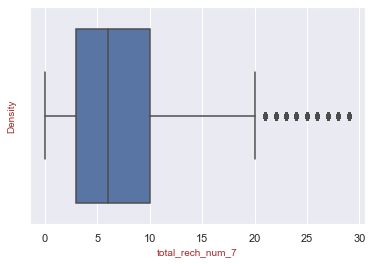

Plot 96


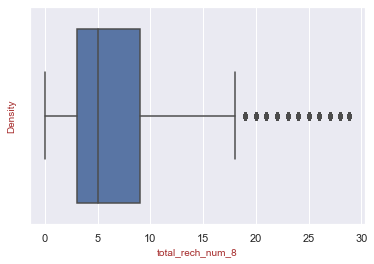

Plot 97


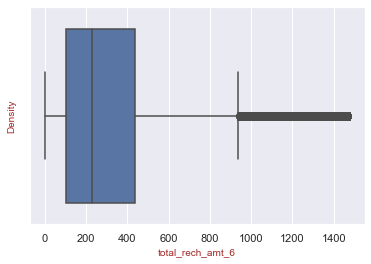

Plot 98


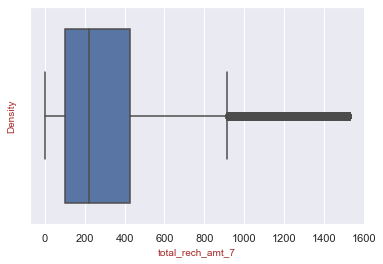

Plot 99


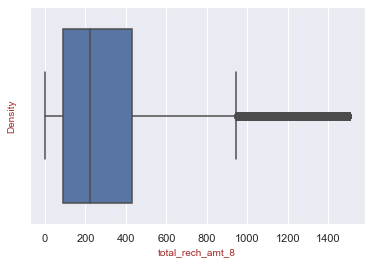

Plot 100


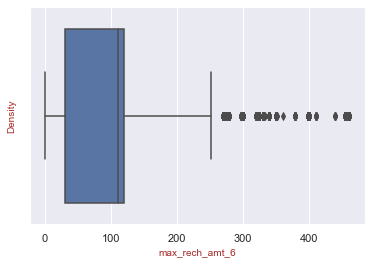

Plot 101


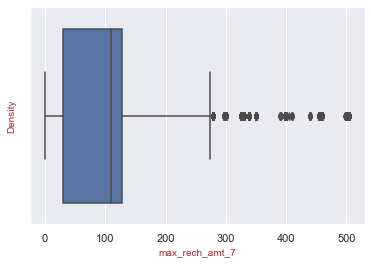

Plot 102


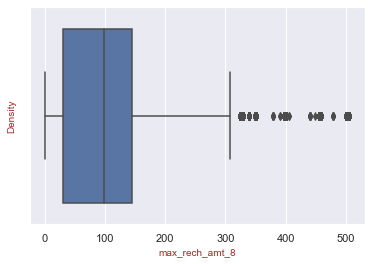

Plot 103


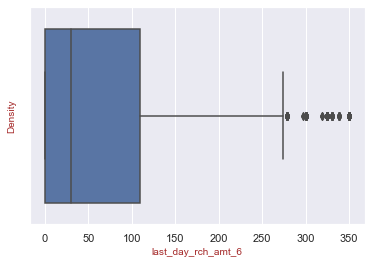

Plot 104


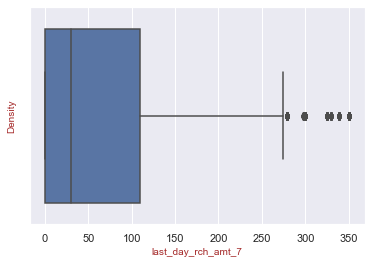

Plot 105


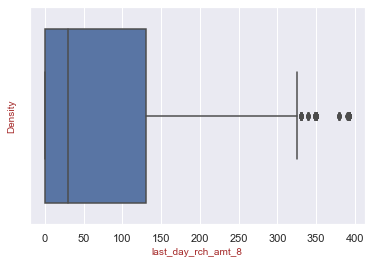

Plot 106


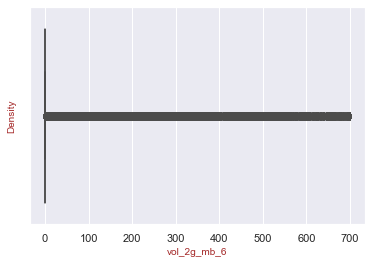

Plot 107


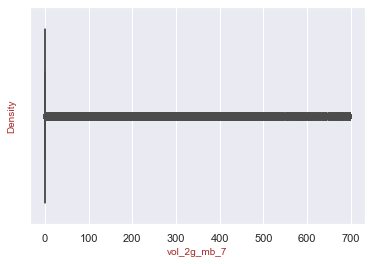

Plot 108


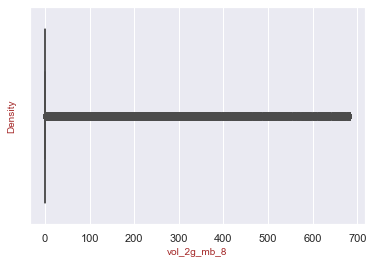

Plot 109


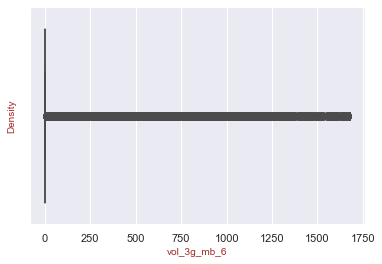

Plot 110


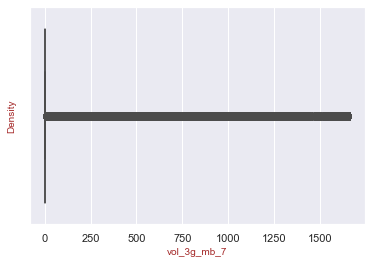

Plot 111


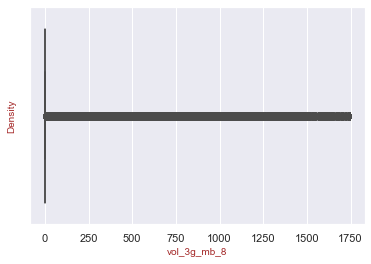

Plot 112


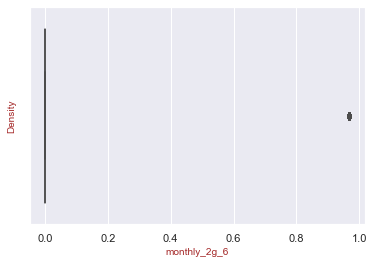

Plot 113


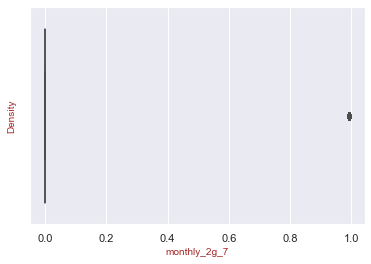

Plot 114


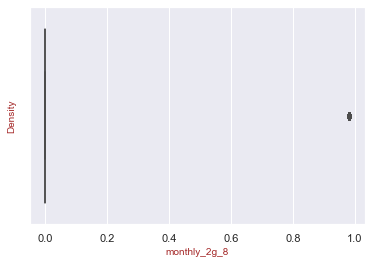

Plot 115


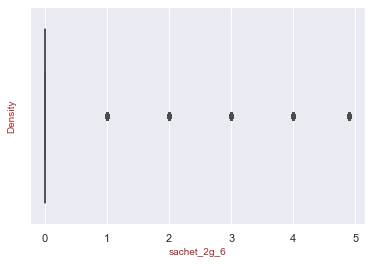

Plot 116


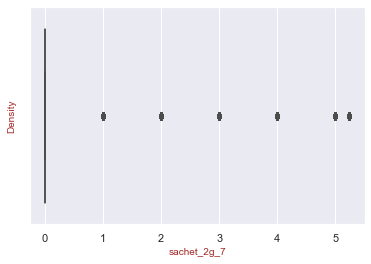

Plot 117


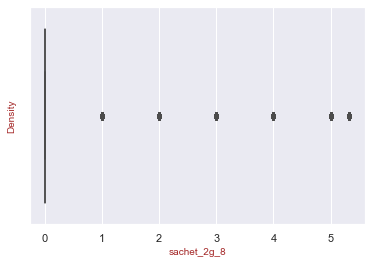

Plot 118


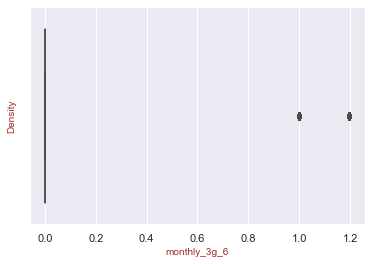

Plot 119


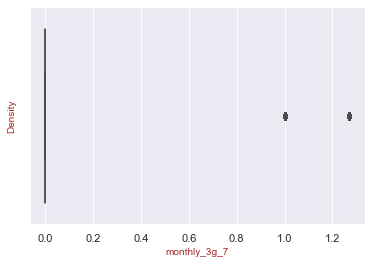

Plot 120


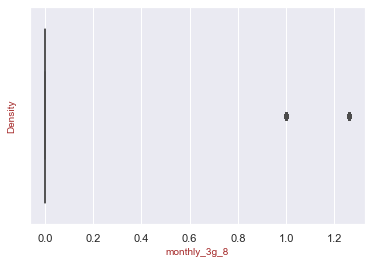

Plot 121


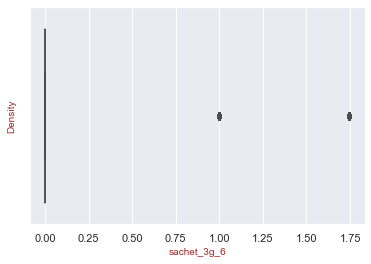

Plot 122


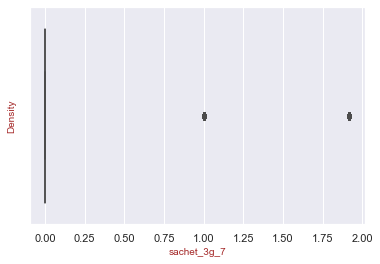

Plot 123


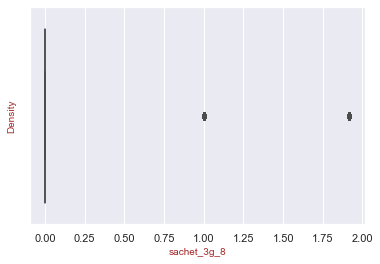

Plot 124


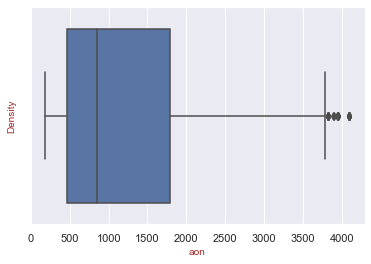

Plot 125


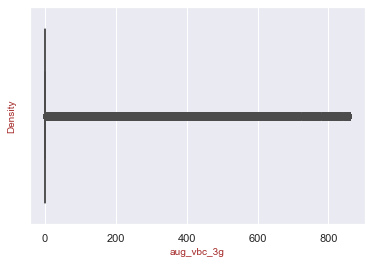

Plot 126


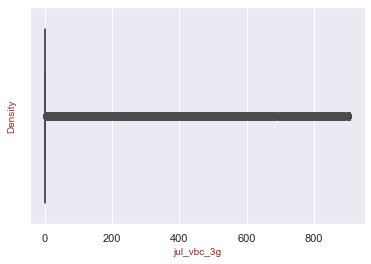

Plot 127


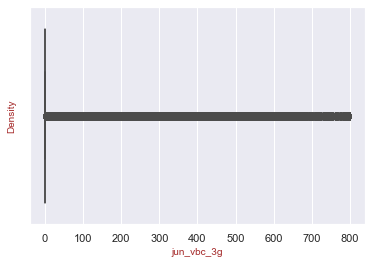

In [369]:
# Plotting box plot of numerical variables to verify there are no outliers
    
n=0
for column in unseen_1.columns:
    n+=1
    print("Plot "+str(n))
    sns.boxplot(unseen_1[column])
    plt.xlabel(column, fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.ylabel("Density", fontdict={"fontsize":10, "fontweight":5, "color":"brown"})
    plt.show()

In [370]:
#droping the high correlated features 
unseen_df = unseen_1.drop(drophighCorrCol, axis=1)
unseen_df.head()

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8   arpu_6  \
0                 21.0                 26.0                 24.0   91.882   
1                 19.0                 16.0                 24.0  414.168   
2                 29.0                 27.0                 28.0  329.844   
3                 25.0                 30.0                 24.0   43.550   
4                 29.0                 29.0                 30.0  306.854   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          22.81         103.38          26.08              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0             18.13              0.00               0.0              0.00   
1            473.61              0.73               0.0              0.00   
2              0.00              0.00               0.0              0.00   
3              2.94              0.00               0.0              6.18   
4              2.39              0.00               0.0              0.00   

   loc_og_t2c_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.03               0.0               0.0               0.0   
1              0.00               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4              0.00               0.0               0.0               0.0   

   isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0           0.0           0.0           0.0          0.00          0.00   
1           0.0           0.0           0.8          0.00          0.00   
2           0.0           0.0           0.0          0.00          0.00   
3           0.0           0.0           0.0          0.00         12.03   
4           0.0           0.0           0.0          0.71          5.39   

   spl_og_mou_8  og_others_6  og_others_7  og_others_8  loc_ic_t2t_mou_6  \
0          0.03          0.0          0.0          0.0             30.33   
1          0.00          0.0          0.0          0.0             19.99   
2          0.00          0.0          0.0          0.0              0.00   
3          1.15          0.0          0.0          0.0             58.11   
4          4.96          2.2          0.0          0.0              0.00   

   loc_ic_t2f_mou_6  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  \
0              0.26              0.00              0.00              0.00   
1              1.49              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              4.26              0.00   
4              0.00             29.71             92.36            107.39   

   std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
0              0.36              1.04               0.0               0.0   
1              0.00             12.51               0.0               0.0   
2              0.00              0.00               0.0               0.0   
3              9.63             11.88               0.0               0.0   
4             13.88             13.96               0.0               0.0   

   std_ic_t2f_mou_8  total_ic_mou_6  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
0              0.00           41.73      0.505057          0.34          0.39   
1              0.00          296.33      0.000000          0.00          0.00   
2              0.00            0.00      0.000000          0.00          0.00   
3              0.00          555.69      0.0000

#### Scaling

In [371]:
unseen_1_cols = unseen_1.columns
unseen_1_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=127)

In [372]:
# Transform on test data
unseen_1 = scaler.transform(unseen_1)

#unseen_df = scaler.transform(unseen_df)

In [373]:
X_test.shape

(21000, 68)

In [374]:
unseen_1.shape

(30000, 127)

In [375]:
unseen_1 = pd.DataFrame(unseen_1)
unseen_1.head()

0         1         2         3         4         5         6    \
0 -0.965693 -0.924383 -0.916949 -0.522706 -0.589248 -0.582884 -0.703251   
1 -0.973310 -0.962186 -0.916949  0.334098  0.574270  0.192594 -0.507061   
2 -0.935225 -0.920603 -0.902092  0.109921  0.365764  1.200770 -0.812001   
3 -0.950459 -0.909262 -0.916949 -0.651197 -0.315165 -0.687646 -0.822006   
4 -0.935225 -0.913043 -0.894663  0.048802  0.291868  0.329838  1.177221   

        7         8          9           10         11        12        13   \
0 -0.755612 -0.740736   8.836947    4.113727   4.498857 -1.005280 -0.981486   
1 -0.662645 -0.755474  78.157028  102.499315  62.758811 -1.005280 -0.981486   
2 -0.810425 -0.807033   1.610038    6.391171   6.150669 -0.933102 -0.657153   
3 -0.835683 -0.844891   5.469522   32.953011   2.748357 -1.005280 -0.981486   
4  1.853478  2.313007   8.967493    2.725571  10.861813 -1.005280 -0.981486   

        14        15        16        17        18        19        20   \
0 -0.970541 -1.101727 -1.086088 -1.074036 -0.488533 -0.498766 -0.491953   
1 -0.970541 -1.101727 -1.086088 -1.074036  0.214027 -0.206661 -0.507769   
2 -0.889925 -0.832010 -0.501045 -0.507449 -0.833776 -0.780430 -0.764972   
3 -0.970541 -1.101727 -1.086088 -1.074036 -0.760093 -0.780430 -0.764972   
4 -0.970541 -1.101727 -1.086088 -1.074036 -0.827532 -0.769570 -0.576218   

        21        22        23        24        25        26        27   \
0 -0.179619 -0.229195 -0.244583 -0.308157 -0.274419 -0.322438 -0.277438   
1  3.257641  4.155823  2.618304 -0.305880 -0.315339 -0.322438 -0.277438   
2 -0.316436 -0.313263 -0.309462 -0.308157 -0.315339 -0.322438 -0.277438   
3 -0.294250  0.447981 -0.150292 -0.308157 -0.315339 -0.315604 -0.277438   
4 -0.298400 -0.292728 -0.224561 -0.308157 -0.315339 -0.322438 -0.277438   

         28        29          30          31          32           33   \
0  -0.284290 -0.161697   43.715927   40.189181   26.151997    28.418887   
1  -0.284290 -0.279820  562.664864  578.958166  357.018432    -0.246311   
2  -0.284290 -0.279820   -0.320757   -0.324057   -0.331356    -0.246311   
3  23.262667 -0.279820    8.136416   89.029788   20.239811    -0.246311   
4  -0.284290 -0.279820    2.587036    2.793043   22.624483  1871.217238   

           34           35          36          37          38        39   \
0    -0.242281     7.888068  165.818393   27.288001   91.904405 -1.281779   
1    -0.242281    -0.251550   -0.198957   84.832089   61.413300 -1.281779   
2    -0.242281    -0.251550   -0.198957   -0.195742   -0.196158 -1.281779   
3     8.624926    -0.251550  146.305528  337.482126   -0.196158 -1.281779   
4  2496.697481  2723.979526  231.032441   75.599269  219.967050 -1.281779   

        40        41        42          43          44        45        46   \
0 -0.317022 -0.307719  0.014675   -2.753666    0.505978 -4.402958 -0.559086   
1 -0.317022 -0.307719 -0.299305   -0.082434   -1.421612 -4.402958 -0.559086   
2 -0.317022 -0.307719 -0.299305   -4.029477   -4.577147 -4.402958 -0.559086   
3 -0.317022 -0.307719 -0.061301   12.006216   -4.577147 -4.402958 -0.559086   
4 -0.317022 -0.307719  2.967102  100.532278  129.156501 -4.402958 -0.559086   

        47        48        49        50        51        52        53   \
0 -0.544446 -0.543923 -0.769281 -0.750944 -0.754268 -0.259108 -0.219168   
1 -0.540681 -0.543923 -0.769281 -0.751069 -0.754268 -0.259108 -0.219168   
2 -0.544446 -0.543923 -0.769281 -0.751069 -0.754268 -0.259108 -0.219168   
3 -0.544446 -0.543923 -0.718424 -0.746291 -0.754268 -0.259108 -0.219168   
4 -0.544446 -0.540526 -0.746494 -0.730463 -0.745000 -0.259108 -0.219168   

         54         55         56        57        58        59        60   \
0   4.208086   1.140085   1.881281  0.844435 -0.020757 -0.213786 -0.368028   
1  26.269017  17.713672  15.032725  0.474294 -0.158202 -0.466316  1.621865   
2  -0.221251  -0.281780  -0.249279 -0.241287 -0.507320 -0.500343 -0.503491   
3   1.964030   5.341086   0.

In [376]:
unseen_1.columns = unseen_1_cols
unseen_1.head()

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8    arpu_6  \
0            -0.965693            -0.924383            -0.916949 -0.522706   
1            -0.973310            -0.962186            -0.916949  0.334098   
2            -0.935225            -0.920603            -0.902092  0.109921   
3            -0.950459            -0.909262            -0.916949 -0.651197   
4            -0.935225            -0.913043            -0.894663  0.048802   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0 -0.589248 -0.582884    -0.703251    -0.755612    -0.740736      8.836947   
1  0.574270  0.192594    -0.507061    -0.662645    -0.755474     78.157028   
2  0.365764  1.200770    -0.812001    -0.810425    -0.807033      1.610038   
3 -0.315165 -0.687646    -0.822006    -0.835683    -0.844891      5.469522   
4  0.291868  0.329838     1.177221     1.853478     2.313007      8.967493   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      4.113727      4.498857      -1.005280      -0.981486      -0.970541   
1    102.499315     62.758811      -1.005280      -0.981486      -0.970541   
2      6.391171      6.150669      -0.933102      -0.657153      -0.889925   
3     32.953011      2.748357      -1.005280      -0.981486      -0.970541   
4      2.725571     10.861813      -1.005280      -0.981486      -0.970541   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0      -1.101727      -1.086088      -1.074036         -0.488533   
1      -1.101727      -1.086088      -1.074036          0.214027   
2      -0.832010      -0.501045      -0.507449         -0.833776   
3      -1.101727      -1.086088      -1.074036         -0.760093   
4      -1.101727      -1.086088      -1.074036         -0.827532   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0         -0.498766         -0.491953         -0.179619         -0.229195   
1         -0.206661         -0.507769          3.257641          4.155823   
2         -0.780430         -0.764972         -0.316436         -0.313263   
3         -0.780430         -0.764972         -0.294250          0.447981   
4         -0.769570         -0.576218         -0.298400         -0.292728   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0         -0.244583         -0.308157         -0.274419         -0.322438   
1          2.618304         -0.305880         -0.315339         -0.322438   
2         -0.309462         -0.308157         -0.315339         -0.322438   
3         -0.150292         -0.308157         -0.315339         -0.315604   
4         -0.224561         -0.308157         -0.315339         -0.322438   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0         -0.277438         -0.284290         -0.161697     43.715927   
1         -0.277438         -0.284290         -0.279820    562.664864   
2         -0.277438         -0.284290         -0.279820     -0.320757   
3         -0.277438         23.262667         -0.279820      8.136416   
4         -0.277438         -0.284290         -0.279820      2.587036   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0     40.189181     26.151997         28.418887         -0.242281   
1    578.958166    357.018432         -0.246311         -0.242281   
2     -0.324057     -0.331356         -0.246311         -0.242281   
3     89.029788     20.239811         -0.246311          8.624926   
4      2.793043     22.624483       1871.217238       2496.697481   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0          7.888068        165.818393         27.288001         91.904405   
1         -0.251550         -0.198957         84.832089         61.413300   
2         -0.251550         -0.198957         -0.195742         -0.196158   
3         -0.251550        146.305528        337.482126         -0.196158   
4       2723.979526   

In [377]:
unseen_1.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 127 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date_of_last_rech_6  float64
 1   date_of_last_rech_7  float64
 2   date_of_last_rech_8  float64
 3   arpu_6               float64
 4   arpu_7               float64
 5   arpu_8               float64
 6   onnet_mou_6          float64
 7   onnet_mou_7          float64
 8   onnet_mou_8          float64
 9   offnet_mou_6         float64
 10  offnet_mou_7         float64
 11  offnet_mou_8         float64
 12  roam_ic_mou_6        float64
 13  roam_ic_mou_7        float64
 14  roam_ic_mou_8        float64
 15  roam_og_mou_6        float64
 16  roam_og_mou_7        float64
 17  roam_og_mou_8        float64
 18  loc_og_t2t_mou_6     float64
 19  loc_og_t2t_mou_7     float64
 20  loc_og_t2t_mou_8     float64
 21  loc_og_t2m_mou_6     float64
 22  loc_og_t2m_mou_7     float64
 23  loc_og_t2m_mou_8     float64
 24  l

In [378]:
# Applying the transformation on the test set

unseen_pca = pca_final.transform(unseen_1)
unseen_pca.shape

(30000, 55)

**As checked for all the models the best accuray for train and test data was given by Tomek links model. So, we will be finalizing it for our future predictions.**

#### Making prediction

In [379]:
# Predicting the y_test

#unseen_pred = pca_dt_best.predict(unseen_pca)

#unseen_pred = rf_us.predict(unseen_3)

unseen_pred = rf_us.predict(unseen_pca)

***Now we have created our churn probability on the test dataset. We will go ahead and read the sample dataset to compare the accuracy for churn_probability.***

In [380]:
# Read the sample dataset

sample = pd.read_csv("sample.csv")
sample.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [381]:
# Checking the shape of dataset

sample.shape

(30000, 2)

In [382]:
# Print the clasification report

print(classification_report(sample["churn_probability"], unseen_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30000
           1       0.00      0.00      0.00         0

    accuracy                           1.00     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       1.00      1.00      1.00     30000



In [383]:
# Checking the accuracy score 

metrics.accuracy_score(sample["churn_probability"], unseen_pred)

0.9996666666666667

***As we can see the accuracy of prediction made by the model with the prediction of sample dataset is 99%.***

In [384]:
# Converting the array to dataframe
sample_2 = pd.DataFrame(unseen_pred)

# Adding column name
sample_2.columns = ["churn_probability"]

sample_2.head()

churn_probability
0                  0
1                  0
2                  0
3                  0
4                  0

In [385]:
sample_2.churn_probability.value_counts()

0    29990
1       10
Name: churn_probability, dtype: int64

In [386]:
sample.churn_probability.value_counts()

0    30000
Name: churn_probability, dtype: int64

In [387]:
# Create the submission dataset with id and churn_probability of test dataset

Submission_1 = pd.concat([sample_1, sample_2], axis = 1)
Submission_1.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [388]:
# Write the data froom Submission to Submission.csv file

Submission_1.to_csv("Submission.csv", index=False)

## Thank You